### Evolution of weights (competing conventions)
 * Enforced Sub Populations (ESP)
 * Cooperative synapse neuroevolution (COSYNE)
 
### Evolution of topology
 * Weight Agnostic Neural Network
 
### Evolution of topology and weight  (TWEANNs)
 * NEAT 
 
### Evolution of  learning rules

### Compositional patterns producing networks  (CPPNs)

### HyperNEAT

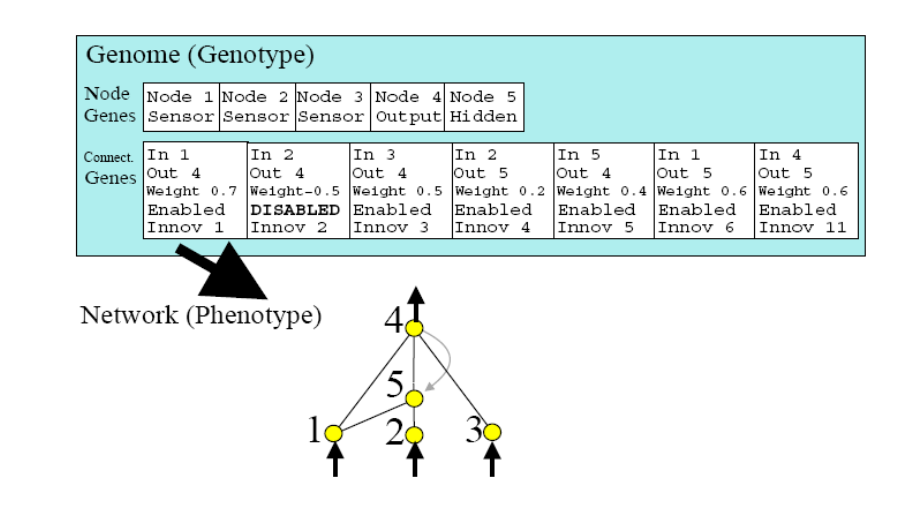

In [2]:
Image(filename='Genotype.png')

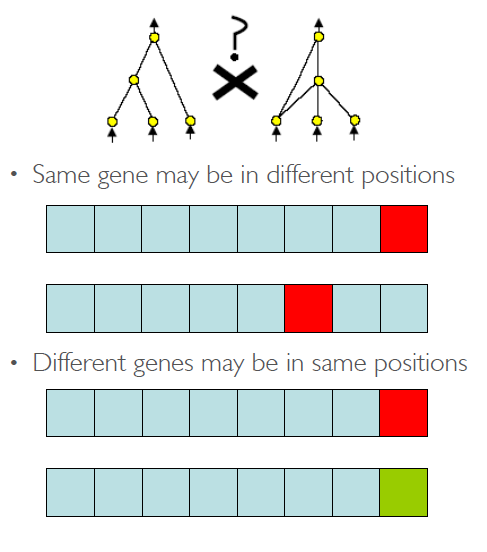

In [3]:
Image(filename='crossover_problem.png')

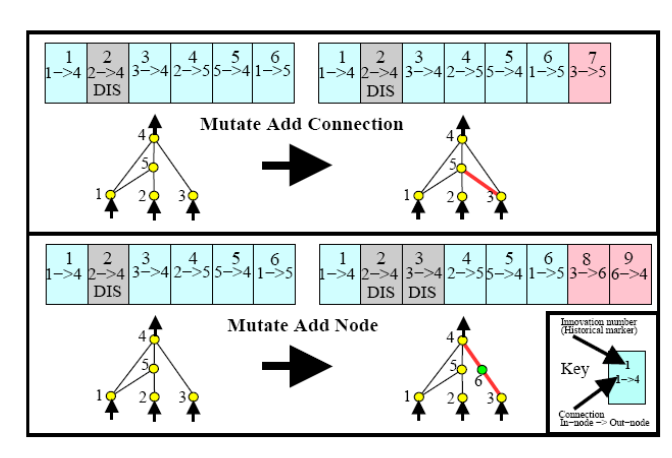

In [4]:
Image(filename='historical_marking.png') ### & mutation

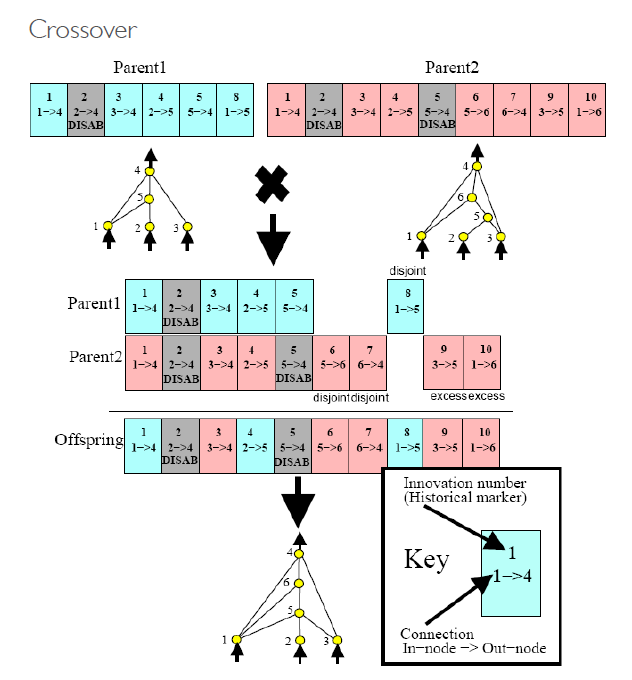

In [5]:
Image(filename='crossover.png')

In [ ]:
###

<img src="neat_anim.gif" width="750" align="center">

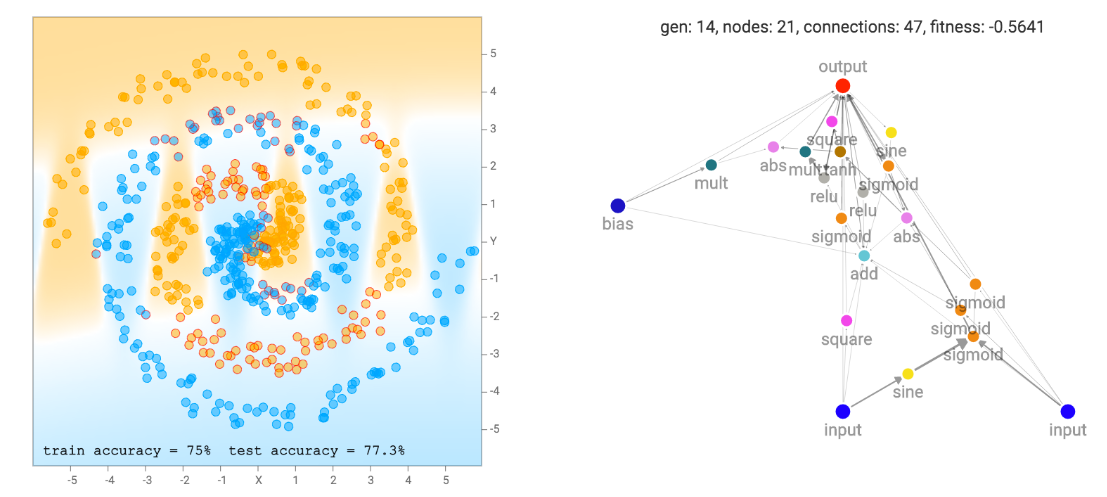

In [7]:
Image(filename='neat.png')

# Introduction

## Goal
The goal of this lab is to familiarize yourself with the most important techniques for neuro-evolution. You will first explore the basic neuro-evolution techniques and then move on to more advanced algorithms such as Neural Evolution of Augmenting Topologies (NEAT).

This lab continues the use of the *inspyred* framework for the Python programming language seen in the previous labs. If you did not participate in the previous labs, you may want to look that over first and then start this lab's exercises. Furthermore, in this lab we will use another Python library, *neat-python*, that contains a complete implementation of **NEAT** ([link here](https://neat-python.readthedocs.io)).


Note that, unless otherwise specified, in this module's exercises we will use real-valued genotypes and that the aim of the algorithms will be to *minimize* the training error function of the evolved Neural Networks, i.e., lower values correspond to a better fitness!

In [1]:
#installing NEAT library
!pip3 install neat-python #pip

ERROR: Invalid requirement: '#pip'

[notice] A new release of pip is available: 23.0 -> 23.1.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [1]:
from IPython.display import Image

## Exercise 1
In the first two exercises you will investigate **running an EA to evolve the weights of an Artificial Neural Network (ANN).** While there are other ways to learn the weights of an ANN (gradient based methods, such as backpropagation and alike), using evolution is an effective means in many circumstances. In this first exercise we will evolve the weights of a simple Feed Forward Neural Network (FFNN), while in the next one we will evolve the weights of more complex, recurrent neural nets. In both cases, **we will assume a fixed topology with one input layer with as many nodes as the inputs, one output layer with a single node, and one (optional) hidden layer with a predefined number of nodes. Weights range in $[-8,8]$ (with real-valued encoding). All nodes of these Neural Networks use the logistic activation function (sigmoid):
$f(x) = \frac{1}{1+e^{-x}}$.**

We begin by evolving the weights of a minimal Neural Network to solve the ``Or`` problem. That means we will use a Neural Network that has two inputs, and one output, which should produce the logical ``Or`` function of the two input values, see the truth table shown in table below.

| **Input 1** | **Input 2** | **Output** |
|:-----------:|:-----------:|:----------:|
| 0           | 0           | 0          |
| 0           | 1           | 1          |
| 1           | 0           | 1          |
| 1           | 1           | 1          |


Run the code below to evolve the weights for this ``Or`` network. **The fitness here is the sum of squared errors between the network's output and the target output across each of the four input patterns.** **If you see the best fitness approach zero (e.g. go under 0.1) then you have found a network able to solve this problem.** This most likely looks similar to what shown in the Figure below. 

![A graphical representation of the evolved Neural Network for the ``Or`` problem"](img/ann_or.png)

Here the Neural Network is depicted with its weights and biases shown by the corresponding color. If you were able to solve the ``Or`` problem, look at the weights of the Neural Network (note that, in the terminal, weights appear ordered by layer and, for each layer, by node, the bias weight being the last one) and think about / compute how it behaves when given different input patterns. Try to plug manually different couples of Input 1 and Input 2 into the network, and calculate the corresponding Output. It is important to think about this now, because it will be difficult to keep track of what our Neural Networks are doing once we start using more complex topologies.

If you were not able to solve the ``Or`` problem, try modifying some of the EA parameters (see the comments in the script), until you are able to do so.

Once you are able to solve ``Or``, try solving the ``And`` problem instead (change in the script ``problem_class=Or`` to ``problem_class=And``).

- **Do the same EA parameters that you used for ``Or`` work for ``And`` as well? If not, modify them until you are able to solve ``And``.**


**Now that we can solve ``Or`` and ``And``, we will try something a little more challenging. Change the parameter ``problem_class`` to be ``Xor``, so that we are now trying to solve the ``Exclusive Or`` (``Xor``) function, see the truth table shown in the Table below.**

| **Input 1** | **Input 2** | **Output**           |
|:-----------:|:-----------:|:--------------------:|
| 0           | 0           | 0                    |
| 0           | 1           | 1                    |
| 1           | 0           | 1                    |
| 1           | 1           |<span style="color:red">0</span>|


This function has one small, but crucial difference from ``Or`` (highlighted in red), as can be seen by comparing their truth tables.

Try running the code again after changing ``problem_class`` to ``Xor``.
- **Can you solve it? If you are unable to solve it, why is that?**

In this case, it is worth considering an additional parameter that can be tuned, that is the number of hidden nodes of the Neural Network (parameter ``args["num_hidden_units"]``. Try changing this parameter from 0 to 1 (this will add to the topology a hidden layer with one node).

- **Does this allow you to solve the problem? What if you change this value to 2 or more?**
- **How many hidden nodes are required to solve this problem? Can you provide an explanation for why that is the case?**

When you find a network that does compute ``Xor``, once again see if you can understand how the network does so. Try to plug manually different couples of Input 1 and Input 2 into the network, and calculate the corresponding Output.

## "Or" Problem

#### WITH problem's bounder to restrict values and zero hidden layers

Best Individual [ 8.          8.         -3.81384914]
Best Fitness 0.0009146104775206161


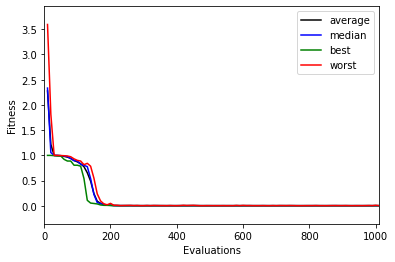

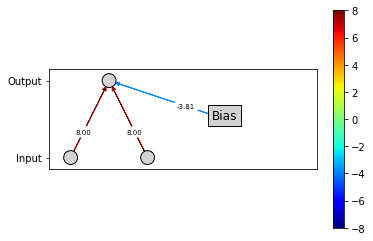

In [5]:
from pylab import *
from random import Random
from utils.utils_08.ga import run_ga
import sys

from utils.utils_08.ann_benchmarks import Or, And, Xor
from utils.utils_08.ann_plotter import ANNPlotter

args = {}

"""   
-------------------------------------------------------------------------
Edit this part to do the exercises
"""

# problem
problem_class = Or #And, Xor

# parameters for the GA
args["num_hidden_units"] = 0 # Number of hidden units of the neural network
args["gaussian_stdev"] = 1.0 # Standard deviation of the Gaussian mutations
args["crossover_rate"]  = 0.8 # Crossover fraction
args["tournament_size"] = 2 # Tournament size
args["pop_size"] = 10 # Population size

args["num_elites"] = 3 # number of elite individuals to maintain in each gen
args["mutation_rate"] = 0.5 # fraction of loci to perform mutation on

# by default will use the problem's defined init_range
# uncomment the following line to use a specific range instead
#args["pop_init_range"] = [-500, 500] # Range for the initial population

args["use_bounder"] = True # use the problem's bounder to restrict values
# comment out the previously line to run unbounded

args["max_generations"] = 100 # Number of generations of the GA
display = True # Plot initial and final populations

"""
-------------------------------------------------------------------------
"""

args["fig_title"] = 'GA'


rng = Random(236677)

best_individual, best_fitness, final_pop = run_ga(rng, display=display,
                                              problem_class=problem_class,**args)
print("Best Individual", best_individual)
print("Best Fitness", best_fitness)

if display :
    net = problem_class(args["num_hidden_units"]).net
    net.set_params(best_individual)

    ann_plotter = ANNPlotter(net)
    ann_plotter.draw()

    ioff()
    show()

#### WITHOUT problem's bounder to restrict values and zero hidden layers

Best Individual [ 34.94939295  34.48739489 -17.65183399]
Best Fitness 3.791919496863094e-15


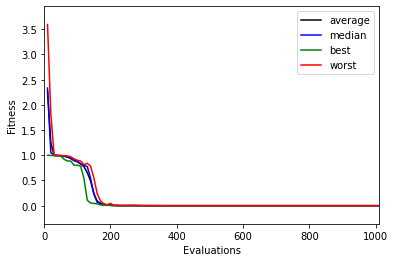

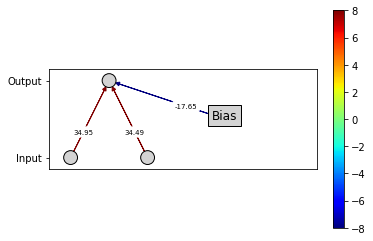

In [6]:
"""   
-------------------------------------------------------------------------
Edit this part to do the exercises
"""

# problem
problem_class = Or #And, Xor

# parameters for the GA
args["num_hidden_units"] = 0 # Number of hidden units of the neural network
args["gaussian_stdev"] = 1.0 # Standard deviation of the Gaussian mutations
args["crossover_rate"]  = 0.8 # Crossover fraction
args["tournament_size"] = 2 # Tournament size
args["pop_size"] = 10 # Population size

args["num_elites"] = 3 # number of elite individuals to maintain in each gen
args["mutation_rate"] = 0.5 # fraction of loci to perform mutation on

# by default will use the problem's defined init_range
# uncomment the following line to use a specific range instead
#args["pop_init_range"] = [-500, 500] # Range for the initial population

args["use_bounder"] = False # use the problem's bounder to restrict values
# comment out the previously line to run unbounded

args["max_generations"] = 100 # Number of generations of the GA
display = True # Plot initial and final populations

"""
-------------------------------------------------------------------------
"""

args["fig_title"] = 'GA'


rng = Random(236677)

best_individual, best_fitness, final_pop = run_ga(rng, display=display,
                                              problem_class=problem_class,**args)
print("Best Individual", best_individual)
print("Best Fitness", best_fitness)

if display :
    net = problem_class(args["num_hidden_units"]).net
    net.set_params(best_individual)

    ann_plotter = ANNPlotter(net)
    ann_plotter.draw()

    ioff()
    show()

#### Trying with different hidden units



 NUMBER OF HIDDEN LAYERS: 1
Best Individual [ 13.76866626  11.49326924  -6.06261916  43.28227724 -21.14688727]
Best Fitness 7.316926373798727e-19


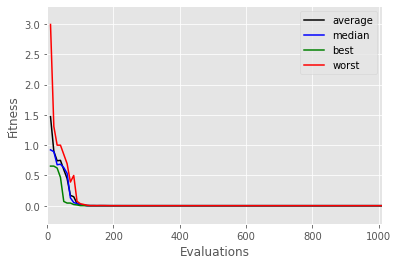

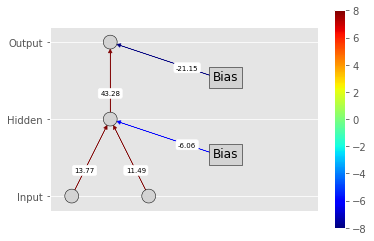



 NUMBER OF HIDDEN LAYERS: 2
Best Individual [-14.80642427  -3.17138087 -10.80993883   8.49006519   8.13603491
  -7.13215137 -45.26384818  11.18167993  22.08893303]
Best Fitness 8.357899707022941e-20


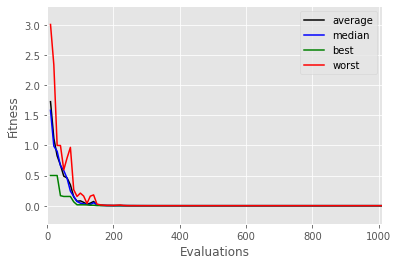

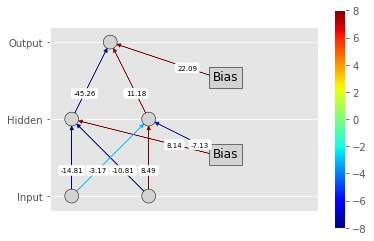



 NUMBER OF HIDDEN LAYERS: 3
Best Individual [-5.51620810e+00  1.14834649e+01 -1.24754179e+01 -4.49178877e+00
  1.23499318e+01 -1.40925209e+01  1.74187342e-02 -6.99648220e+00
  5.70762999e+00 -4.66640559e+00  2.41832318e+01 -3.68348620e+01
  7.59855288e+00]
Best Fitness 1.573847460425228e-27


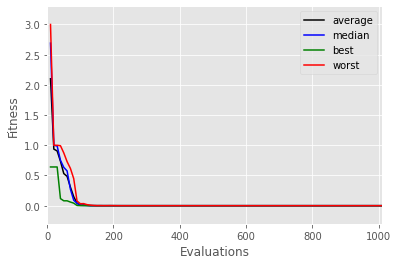

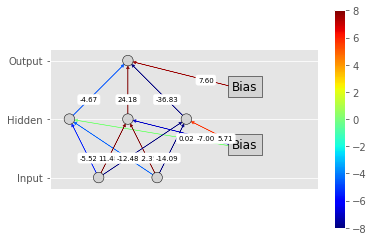



 NUMBER OF HIDDEN LAYERS: 4
Best Individual [-12.40030381 -10.64610391 -11.9636444    7.45425963   5.44531715
 -14.5069557  -12.49584152   7.36434354  -8.86020604   6.47602654
   4.02138163  -3.70709432 -12.57244223 -28.39762301 -15.64825684
  29.61179892   8.14217767]
Best Fitness 6.073278609633465e-31


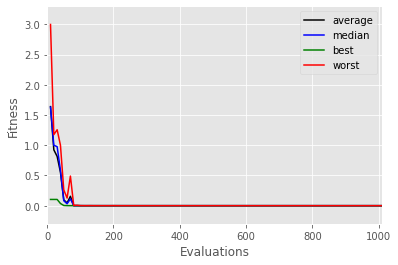

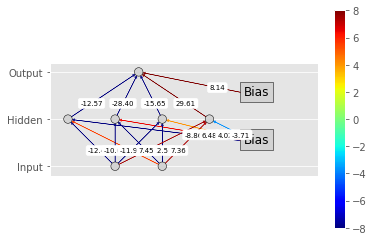



 NUMBER OF HIDDEN LAYERS: 5
Best Individual [ 10.92533996 -10.31169685  -4.23729702  11.89946075   9.19891875
   3.83283951 -11.19641907  -8.96946466  13.72701397   9.11803625
  -3.26644228   5.16901244   3.57044556  -5.94183774  -5.28236461
  16.69608296 -40.60092269 -17.70084525  28.02633093  10.55966628
  -4.34333904]
Best Fitness 7.087571088447986e-54


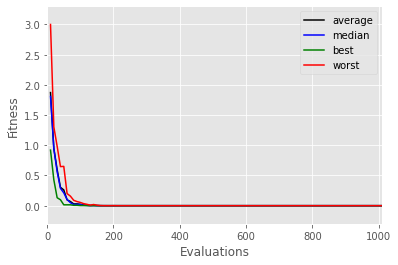

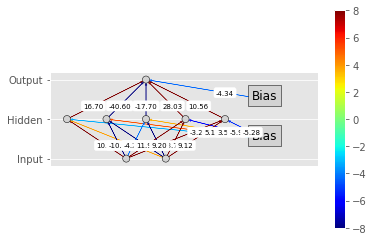



 NUMBER OF HIDDEN LAYERS: 6
Best Individual [  6.58420047 -15.74908363   7.25515313  14.34566398  -0.42869691
 -14.22226144   6.26932213  -3.19449607  13.58144178  13.94651699
  -3.27652764 -14.31675197  -2.39987311   5.75018317  -5.94943679
  -9.97709703   1.88398661   4.45429874  23.26527535 -14.39281896
  16.92196792  31.20254255  -9.92617078 -10.14315376 -16.95691688]
Best Fitness 2.1717549885418988e-42


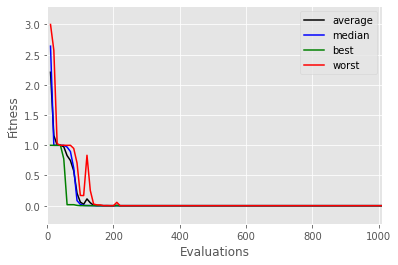

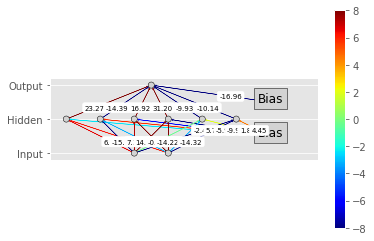



 NUMBER OF HIDDEN LAYERS: 7
Best Individual [-12.10957699  11.0990568   12.42841272   1.42532037  12.32217147
  -4.89161965  -6.02610574 -11.68002937 -10.47208948   8.02291788
  -3.87043252  13.48722667  11.21154333  -0.9043858    4.85292598
  -4.02439576  -4.29023819  10.77516005  -8.80890334  -3.64502012
  -5.04953958 -26.55743155  11.17220939  29.77129932  -5.08251113
  18.34629709  16.62552659   0.63471333 -14.82951486]
Best Fitness 5.120570242930422e-40


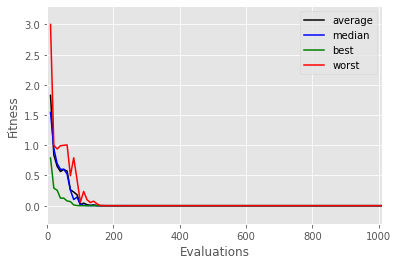

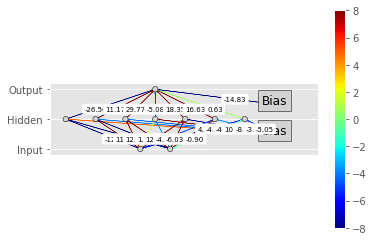



 NUMBER OF HIDDEN LAYERS: 8
Best Individual [-13.59099164   9.41727534 -14.08479846   8.20651934  -3.87159489
   0.7892164   12.00787804   8.042371   -11.81820816  -5.43075977
   2.51542453   6.87469789  16.10402355   4.88928635   5.60431205
   6.74488007   6.31346918   1.67107105   4.75006877  -4.26044799
  -6.56346524  -3.24470646  -3.71767459  -6.253152   -32.12761308
  -4.89974751 -18.47767929  13.22268965  20.96042726  15.4846673
  19.09339423  16.00840282   1.05992952]
Best Fitness 4.802195605106167e-46


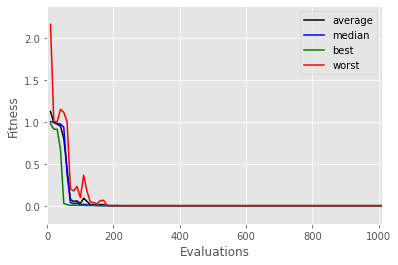

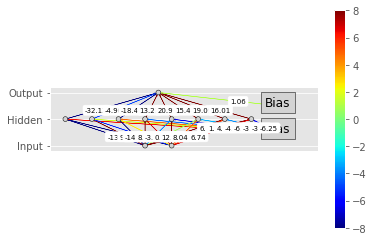



 NUMBER OF HIDDEN LAYERS: 9
Best Individual [ 14.56679877  -4.10122361  -7.93668656  -1.24364719   9.65535812
  12.04041699   8.37895811   8.8492819   -8.45898826   7.60441652
  -9.14908833 -14.81048847  -2.29344271  12.01302301  -2.09322628
   6.18783381  13.29736657  -6.09982401  -6.57211615   2.18011958
   4.79898952  -0.41755285  -3.58090856 -12.04265896  -2.75849439
   7.82144494   3.39983259  11.48011386  -2.82297646 -31.49344689
  -4.82382103  23.15836598  -4.18356629  15.60315605  -4.92193602
 -19.18834885  -1.82169594]
Best Fitness 2.4235408103392495e-52


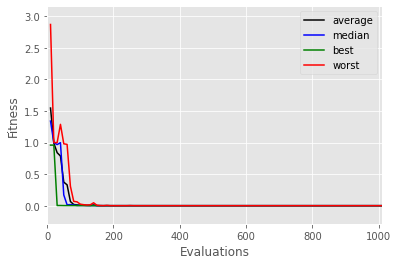

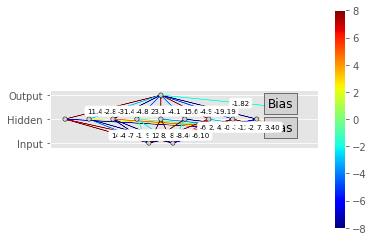



 NUMBER OF HIDDEN LAYERS: 10
Best Individual [  7.40679662   6.25823553  -8.26780937  10.8714601  -13.03054272
   5.83282593   2.61171594 -15.95453339   1.54307463 -13.83082032
   9.14788607 -10.51998856 -10.75439624  10.14763522  12.80332213
  -4.34724485   6.52238509  -4.12097971  -9.85102363   2.57966841
  -6.03431814  -4.63601122  -4.63366001  -7.91822508  -9.85831206
  -3.29117344  -3.28564507   1.12391267   1.42001283  10.37635653
  19.51458434   7.98552316  -2.67187493  15.25145513   1.55659474
   9.829254    25.65557792 -11.38753281  -3.94580543 -10.52677844
 -12.6046951 ]
Best Fitness 8.084665699464337e-30


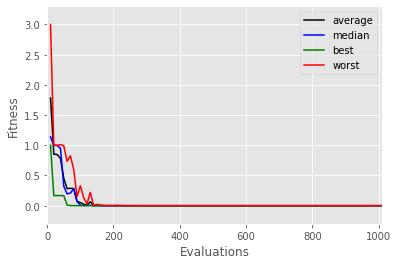

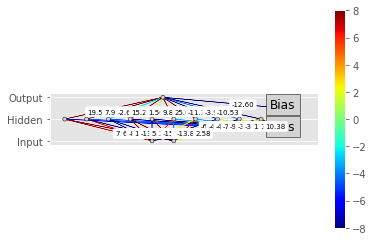

In [31]:
"""   
-------------------------------------------------------------------------
Edit this part to do the exercises
"""

# problem
problem_class = Or #And, Xor

# parameters for the GA
args["num_hidden_units"] = 0 # Number of hidden units of the neural network
args["gaussian_stdev"] = 1.0 # Standard deviation of the Gaussian mutations
args["crossover_rate"]  = 0.8 # Crossover fraction
args["tournament_size"] = 2 # Tournament size
args["pop_size"] = 10 # Population size

args["num_elites"] = 3 # number of elite individuals to maintain in each gen
args["mutation_rate"] = 0.5 # fraction of loci to perform mutation on

# by default will use the problem's defined init_range
# uncomment the following line to use a specific range instead
#args["pop_init_range"] = [-500, 500] # Range for the initial population

args["use_bounder"] = False # use the problem's bounder to restrict values
# comment out the previously line to run unbounded

args["max_generations"] = 100 # Number of generations of the GA
display = True # Plot initial and final populations

"""
-------------------------------------------------------------------------
"""

args["fig_title"] = 'GA'
rng = Random(236677)
best_fitnesses = []
for i in range(1,11,1):
    print("\n\n NUMBER OF HIDDEN LAYERS: {}".format(i))
    args["num_hidden_units"] = i
    
    best_individual, best_fitness, final_pop = run_ga(rng, display=display,
                                                  problem_class=problem_class,**args)
    print("Best Individual", best_individual)
    print("Best Fitness", best_fitness)
    best_fitnesses.append(best_fitness)

    if display :
        net = problem_class(args["num_hidden_units"]).net
        net.set_params(best_individual)

        ann_plotter = ANNPlotter(net)
        ann_plotter.draw()

        ioff()
        show()

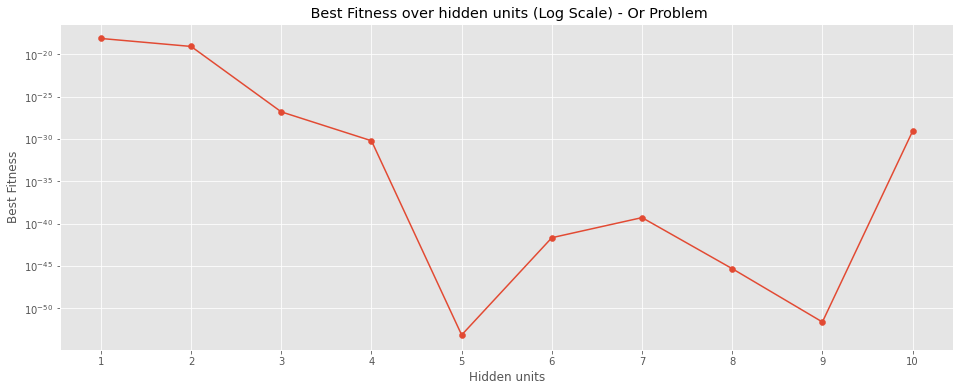

In [32]:
import matplotlib.pyplot as plt

plt.figure(figsize=(16, 6))
x = [i for i in range(1, 11)]  # x-axis values from 1 to 10
plt.semilogy(x, best_fitnesses)  # Plotting on a log scale
plt.scatter(x, best_fitnesses)  # Overlay scatter plot

plt.xlabel('Hidden units')
plt.ylabel('Best Fitness')
plt.title(' Best Fitness over hidden units (Log Scale) - Or Problem')
plt.xticks(x)
plt.show()


## "And" Problem

#### WITH problem's bounder to restrict values and zero hidden layers

Best Individual [ 5.33870868  5.34997902 -8.        ]
Best Fitness 0.012668702412904525


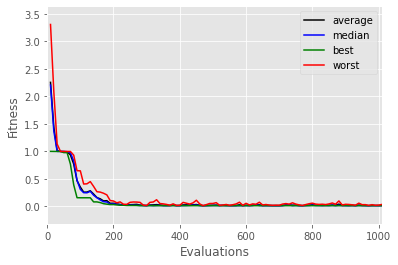

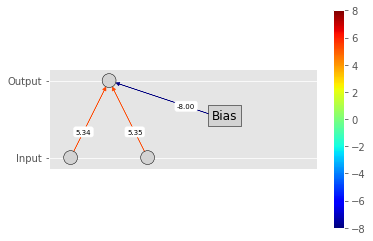

In [27]:
args = {}

"""   
-------------------------------------------------------------------------
Edit this part to do the exercises
"""

# problem
problem_class = And

# parameters for the GA
args["num_hidden_units"] = 0 # Number of hidden units of the neural network
args["gaussian_stdev"] = 1.0 # Standard deviation of the Gaussian mutations
args["crossover_rate"]  = 0.8 # Crossover fraction
args["tournament_size"] = 2 # Tournament size
args["pop_size"] = 10 # Population size

args["num_elites"] = 3 # number of elite individuals to maintain in each gen
args["mutation_rate"] = 0.5 # fraction of loci to perform mutation on

# by default will use the problem's defined init_range
# uncomment the following line to use a specific range instead
#args["pop_init_range"] = [-500, 500] # Range for the initial population

args["use_bounder"] = True # use the problem's bounder to restrict values
# comment out the previously line to run unbounded

args["max_generations"] = 100 # Number of generations of the GA
display = True # Plot initial and final populations

"""
-------------------------------------------------------------------------
"""

args["fig_title"] = 'GA'


rng = Random(236677)

best_individual, best_fitness, final_pop = run_ga(rng, display=display,
                                              problem_class=problem_class,**args)
print("Best Individual", best_individual)
print("Best Fitness", best_fitness)

if display :
    net = problem_class(args["num_hidden_units"]).net
    net.set_params(best_individual)

    ann_plotter = ANNPlotter(net)
    ann_plotter.draw()

    ioff()
    show()

#### WITHOUT problem's bounder to restrict values and zero hidden layers

Best Individual [ 14.33611408  14.49883987 -21.15295334]
Best Fitness 3.0656641370850463e-06


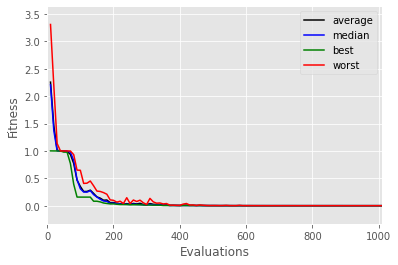

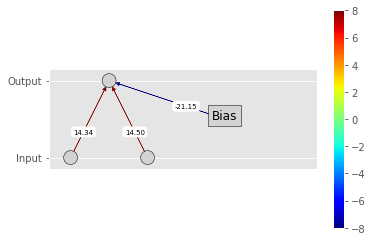

In [28]:
args = {}

"""   
-------------------------------------------------------------------------
Edit this part to do the exercises
"""

# problem
problem_class = And

# parameters for the GA
args["num_hidden_units"] = 0 # Number of hidden units of the neural network
args["gaussian_stdev"] = 1.0 # Standard deviation of the Gaussian mutations
args["crossover_rate"]  = 0.8 # Crossover fraction
args["tournament_size"] = 2 # Tournament size
args["pop_size"] = 10 # Population size

args["num_elites"] = 3 # number of elite individuals to maintain in each gen
args["mutation_rate"] = 0.5 # fraction of loci to perform mutation on

# by default will use the problem's defined init_range
# uncomment the following line to use a specific range instead
#args["pop_init_range"] = [-500, 500] # Range for the initial population

args["use_bounder"] = False # use the problem's bounder to restrict values
# comment out the previously line to run unbounded

args["max_generations"] = 100 # Number of generations of the GA
display = True # Plot initial and final populations

"""
-------------------------------------------------------------------------
"""

args["fig_title"] = 'GA'


rng = Random(236677)

best_individual, best_fitness, final_pop = run_ga(rng, display=display,
                                              problem_class=problem_class,**args)
print("Best Individual", best_individual)
print("Best Fitness", best_fitness)

if display :
    net = problem_class(args["num_hidden_units"]).net
    net.set_params(best_individual)

    ann_plotter = ANNPlotter(net)
    ann_plotter.draw()

    ioff()
    show()

#### Trying with different hidden units



 NUMBER OF HIDDEN LAYERS: 1
Best Individual [ 11.2418832    9.2384645  -15.08843199  35.53389419 -17.50612453]
Best Fitness 4.44152174802025e-15


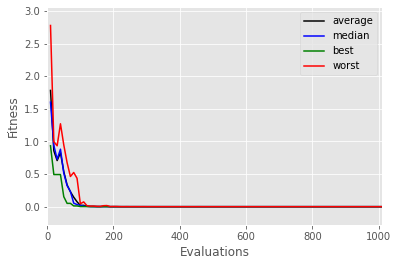

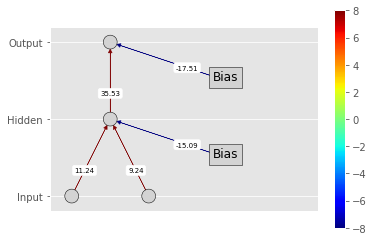



 NUMBER OF HIDDEN LAYERS: 2
Best Individual [-10.33475129  11.61511443  -6.7910469    8.86142092  13.56198574
 -16.96304945 -15.7743894   30.45374011  -7.02745244]
Best Fitness 1.6414469766654333e-19


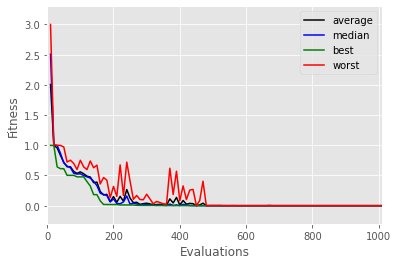

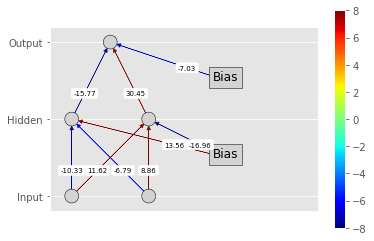



 NUMBER OF HIDDEN LAYERS: 3
Best Individual [  5.53429173  -1.84771272  -8.98173679   9.21304582 -12.7679745
   5.2378175   -9.38612297  -4.56639801  -1.69782567  26.37830728
   4.50038988 -16.3376534  -13.40846787]
Best Fitness 1.486937262364143e-11


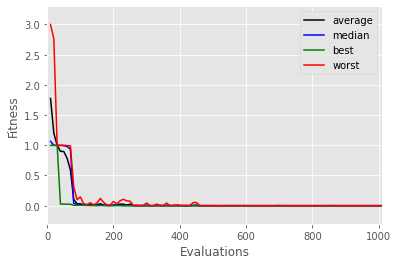

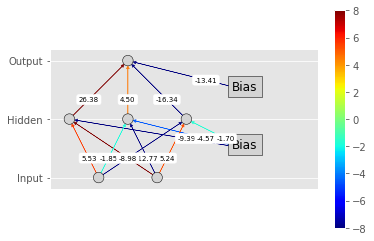



 NUMBER OF HIDDEN LAYERS: 4
Best Individual [-14.52418718  11.63754425   0.65489685  -9.11021722   6.85811988
  -1.76962108  -9.36244568  -9.2453748    2.38825939   2.05596584
   6.26289223  12.22148398  -7.70323824   9.7682382   -9.29954553
 -40.39779026  14.37860515]
Best Fitness 8.097134275052778e-21


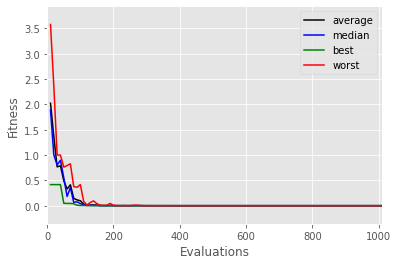

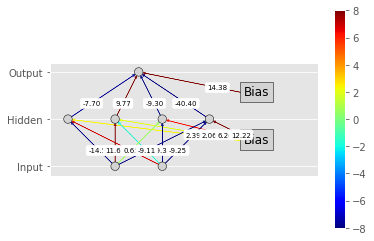



 NUMBER OF HIDDEN LAYERS: 5
Best Individual [  5.33044702   3.73584377  -0.60303986 -14.94096209  10.79451494
   7.19093466 -13.68064554  13.72701344  -2.59464832 -10.55963737
  10.99231667   3.26196208  -2.10886156   7.00438505  -5.46493743
  -0.20873433 -15.50104273  12.11905606 -40.38551061 -14.29470362
   8.07744383]
Best Fitness 1.0804441106500093e-17


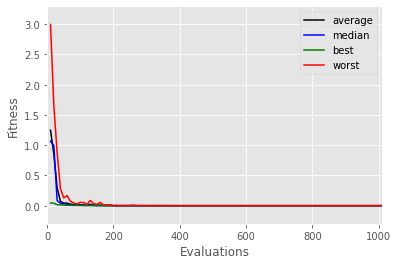

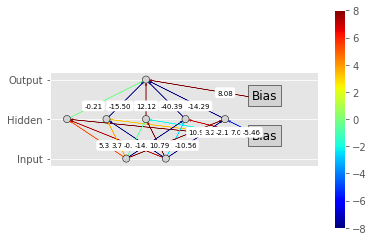



 NUMBER OF HIDDEN LAYERS: 6
Best Individual [ -5.28126815  -9.19936233   6.05962979  11.77447365   2.56040847
  -7.01001191  -4.05856498  -3.6355461  -11.65133757  -1.83303913
 -14.85707469  -0.8700086    6.89006863   8.58933419  -1.37538668
  -1.06270957   1.40034316  -2.57275075 -16.32012835 -12.94094693
 -17.76243359  18.61077727 -10.43534066   3.18096722   4.41443528]
Best Fitness 2.2839811935929793e-19


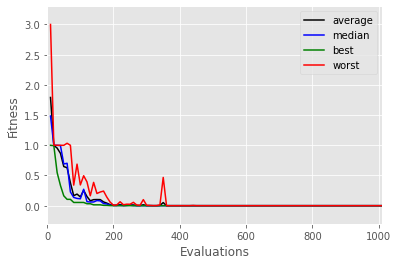

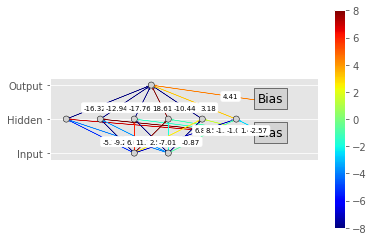



 NUMBER OF HIDDEN LAYERS: 7
Best Individual [  5.99076064  -7.09180978  -5.79155997   2.78036246   1.27536391
   6.48666827   7.27530109 -11.03121835  -4.59662115   3.06155057
   7.06500235   8.59396575   0.59148284  -5.21911402  -4.63387606
   7.5982327    0.91074148  -9.21806728  -3.83498681   5.39661914
   1.4195493  -12.87485803 -19.62156627  -7.18710371   6.36822645
   9.565591    -2.4311468    7.29537669  -0.0211912 ]
Best Fitness 3.75700588762581e-15


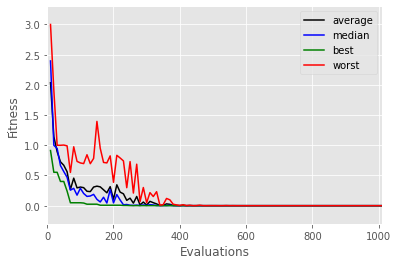

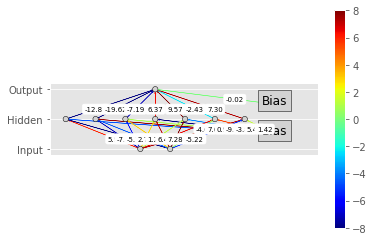



 NUMBER OF HIDDEN LAYERS: 8
Best Individual [ -0.44634028   4.41605606   5.66170761  -1.75607892   2.12462876
   7.9670423   -6.42367941  14.19731542  -6.45529895   4.89105866
   6.17754043  -3.58304762  -7.79221607   5.61913379  -5.20475515
  -2.16459631 -11.19528131  -7.27963911  -8.51169884   3.94373795
   2.5211953   -0.54792189   9.25002041  -3.23471498  -1.56431477
  12.36519767   8.61929714  -9.45949329  -6.51533784  -5.09047315
 -24.540096     8.50234902   8.36353935]
Best Fitness 5.779726662059003e-22


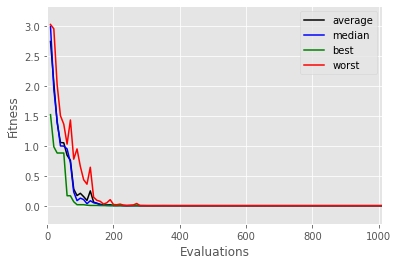

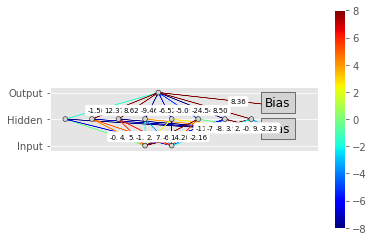



 NUMBER OF HIDDEN LAYERS: 9
Best Individual [ -3.22527516   8.85383397   4.45843088  11.77310448   1.33992953
  -1.65369231  -5.30345745 -11.93955903  -4.75382928  -3.73083592
   6.64856461 -10.88090302  12.25127034   6.26530549   5.34101399
  -6.12074695   7.41281733  10.27327817   1.80385631 -11.09160249
   3.04236045   3.16507843 -14.39867546   6.77481115  -8.85522672
   0.14810038  -1.10904125  -1.26810179  24.54985127 -17.85028818
  -3.07390743   8.44055362  -9.3337422   -1.13111081 -20.14530555
   6.85063173   2.88261041]
Best Fitness 1.14596211012604e-18


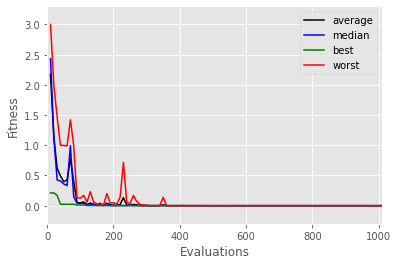

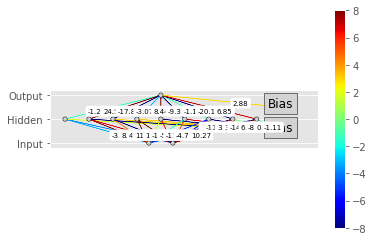



 NUMBER OF HIDDEN LAYERS: 10
Best Individual [ -9.22134209  -4.53692429   4.96621925   9.26199993  -3.66039059
  -2.21409357   3.84278508  -6.67237508  -4.59705894  -6.81062665
  -7.15437002  -5.50209196   6.66008394   8.34833867   9.27521018
  -5.4885387    7.63741231   4.82835335   3.82209999  -5.82144362
  12.51086962   6.84245877  -8.67486244 -12.59205677  -2.93817169
   8.65530251  10.81241374  -2.88222684  -7.49554689   5.75129757
 -14.15968033 -17.73616397  18.90676232  -0.17109273   7.07790955
   3.8625956  -10.10360918 -12.24660627 -12.5570479   -5.76180612
   9.92918977]
Best Fitness 3.2903625489318214e-23


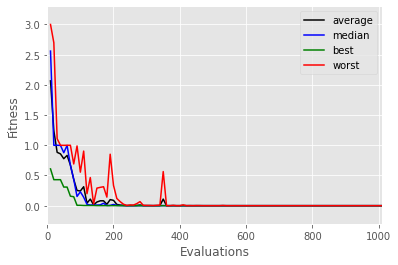

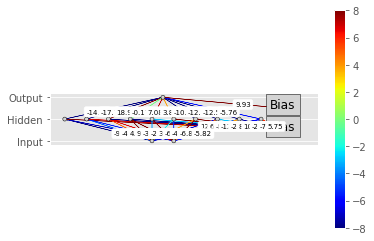

In [33]:
"""   
-------------------------------------------------------------------------
Edit this part to do the exercises
"""

# problem
problem_class = And

# parameters for the GA
args["num_hidden_units"] = 0 # Number of hidden units of the neural network
args["gaussian_stdev"] = 1.0 # Standard deviation of the Gaussian mutations
args["crossover_rate"]  = 0.8 # Crossover fraction
args["tournament_size"] = 2 # Tournament size
args["pop_size"] = 10 # Population size

args["num_elites"] = 3 # number of elite individuals to maintain in each gen
args["mutation_rate"] = 0.5 # fraction of loci to perform mutation on

# by default will use the problem's defined init_range
# uncomment the following line to use a specific range instead
#args["pop_init_range"] = [-500, 500] # Range for the initial population

args["use_bounder"] = False # use the problem's bounder to restrict values
# comment out the previously line to run unbounded

args["max_generations"] = 100 # Number of generations of the GA
display = True # Plot initial and final populations

"""
-------------------------------------------------------------------------
"""

args["fig_title"] = 'GA'
rng = Random(236677)
best_fitnesses = []
for i in range(1,11,1):
    print("\n\n NUMBER OF HIDDEN LAYERS: {}".format(i))
    args["num_hidden_units"] = i
    
    best_individual, best_fitness, final_pop = run_ga(rng, display=display,
                                                  problem_class=problem_class,**args)
    print("Best Individual", best_individual)
    print("Best Fitness", best_fitness)
    best_fitnesses.append(best_fitness)

    if display :
        net = problem_class(args["num_hidden_units"]).net
        net.set_params(best_individual)

        ann_plotter = ANNPlotter(net)
        ann_plotter.draw()

        ioff()
        show()

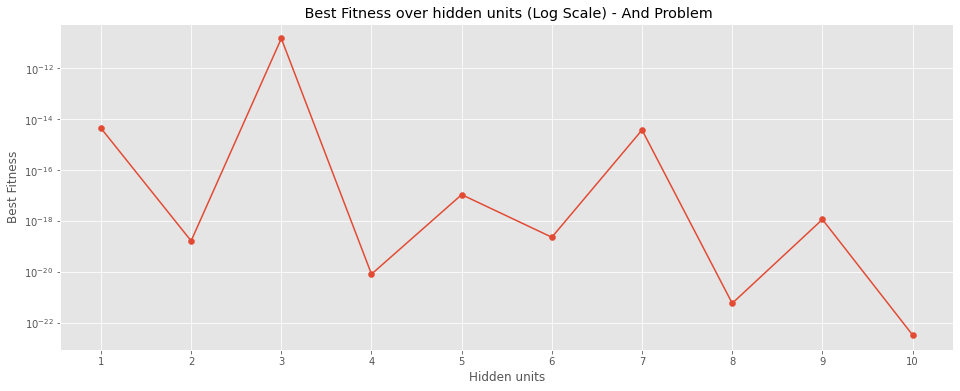

In [34]:
plt.figure(figsize=(16, 6))
x = [i for i in range(1, 11)]  # x-axis values from 1 to 10
plt.semilogy(x, best_fitnesses)  # Plotting on a log scale
plt.scatter(x, best_fitnesses)  # Overlay scatter plot

plt.xlabel('Hidden units')
plt.ylabel('Best Fitness')
plt.title(' Best Fitness over hidden units (Log Scale) - And Problem')
plt.xticks(x)
plt.show()


## "XOr" Problem

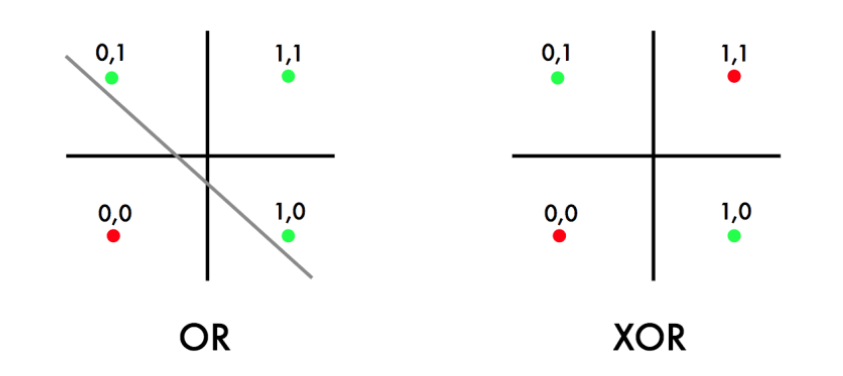

In [40]:
from IPython import display
display.Image("Xor.png")

#### WITH problem's bounder to restrict values and zero hidden layers

Best Individual [-5.33154724 -5.31234112  8.        ]
Best Fitness 1.0119992607301664


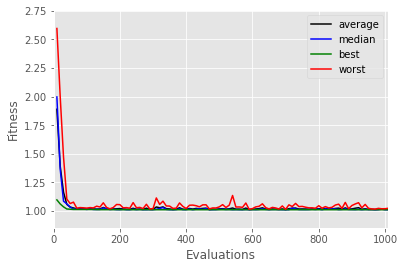

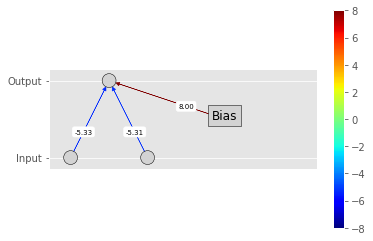

In [38]:
args = {}

"""   
-------------------------------------------------------------------------
Edit this part to do the exercises
"""

# problem
problem_class = Xor

# parameters for the GA
args["num_hidden_units"] = 0 # Number of hidden units of the neural network
args["gaussian_stdev"] = 1.0 # Standard deviation of the Gaussian mutations
args["crossover_rate"]  = 0.8 # Crossover fraction
args["tournament_size"] = 2 # Tournament size
args["pop_size"] = 10 # Population size

args["num_elites"] = 3 # number of elite individuals to maintain in each gen
args["mutation_rate"] = 0.5 # fraction of loci to perform mutation on

# by default will use the problem's defined init_range
# uncomment the following line to use a specific range instead
#args["pop_init_range"] = [-500, 500] # Range for the initial population

args["use_bounder"] = True # use the problem's bounder to restrict values
# comment out the previously line to run unbounded

args["max_generations"] = 100 # Number of generations of the GA
display = True # Plot initial and final populations

"""
-------------------------------------------------------------------------
"""

args["fig_title"] = 'GA'


rng = Random(236677)

best_individual, best_fitness, final_pop = run_ga(rng, display=display,
                                              problem_class=problem_class,**args)
print("Best Individual", best_individual)
print("Best Fitness", best_fitness)

if display :
    net = problem_class(args["num_hidden_units"]).net
    net.set_params(best_individual)

    ann_plotter = ANNPlotter(net)
    ann_plotter.draw()

    ioff()
    show()

#### WITHOUT problem's bounder to restrict values and zero hidden layers

Best Individual [-18.13823398 -17.42033317  26.98697718]
Best Fitness 1.0000000613663265


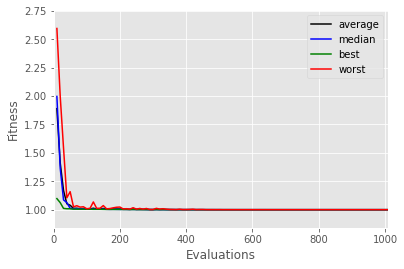

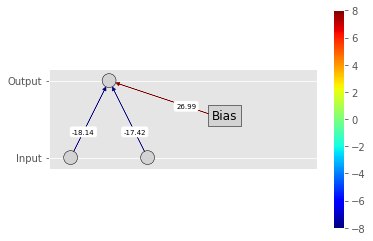

In [41]:
args = {}

"""   
-------------------------------------------------------------------------
Edit this part to do the exercises
"""

# problem
problem_class = Xor

# parameters for the GA
args["num_hidden_units"] = 0 # Number of hidden units of the neural network
args["gaussian_stdev"] = 1.0 # Standard deviation of the Gaussian mutations
args["crossover_rate"]  = 0.8 # Crossover fraction
args["tournament_size"] = 2 # Tournament size
args["pop_size"] = 10 # Population size

args["num_elites"] = 3 # number of elite individuals to maintain in each gen
args["mutation_rate"] = 0.5 # fraction of loci to perform mutation on

# by default will use the problem's defined init_range
# uncomment the following line to use a specific range instead
#args["pop_init_range"] = [-500, 500] # Range for the initial population

args["use_bounder"] = False # use the problem's bounder to restrict values
# comment out the previously line to run unbounded

args["max_generations"] = 100 # Number of generations of the GA
display = True # Plot initial and final populations

"""
-------------------------------------------------------------------------
"""

args["fig_title"] = 'GA'


rng = Random(236677)

best_individual, best_fitness, final_pop = run_ga(rng, display=display,
                                              problem_class=problem_class,**args)
print("Best Individual", best_individual)
print("Best Fitness", best_fitness)

if display :
    net = problem_class(args["num_hidden_units"]).net
    net.set_params(best_individual)

    ann_plotter = ANNPlotter(net)
    ann_plotter.draw()

    ioff()
    show()

#### Trying with different hidden units



 NUMBER OF HIDDEN LAYERS: 1
Best Individual [  8.2569728    7.64043082 -16.35196648 -15.80167425   0.69321439]
Best Fitness 0.6677864020284832


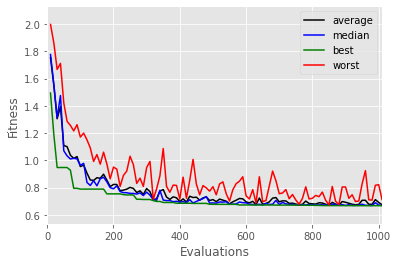

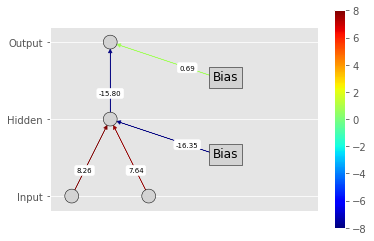



 NUMBER OF HIDDEN LAYERS: 2
Best Individual [-2.06823270e+01 -2.12275179e+01 -6.73708139e+00  9.41460078e+00
  3.05801794e+00 -7.35690064e+00 -7.54629395e+00  9.24945860e+00
  6.63463865e-03]
Best Fitness 0.5000062243776008


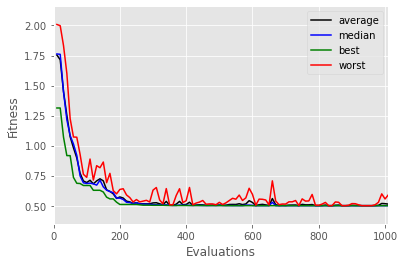

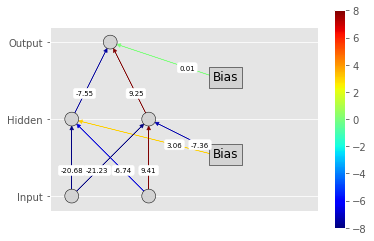



 NUMBER OF HIDDEN LAYERS: 3
Best Individual [  5.17201227  -8.14074009  11.07220372   7.88733265  -2.6793801
  -8.09686829  -3.80918882   7.51714611  -6.44343381   7.1167169
   8.67198959   7.66724651 -12.16879215]
Best Fitness 0.0025353157283216597


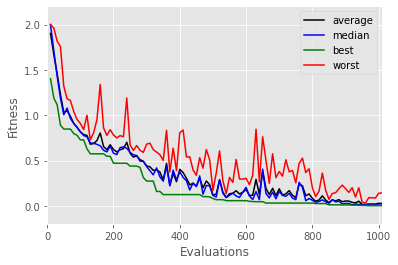

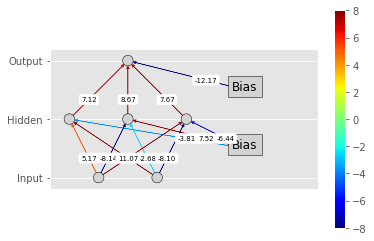



 NUMBER OF HIDDEN LAYERS: 4
Best Individual [  7.20182477  15.40889362  12.61751417   4.34448881 -11.5550451
 -10.58921214 -13.61093909  -4.31179719  -3.9351595    4.82205464
  -5.65661805   2.14876952   8.55661106 -21.60408167  21.50850338
  -5.72650444  12.89004165]
Best Fitness 2.691333541339448e-11


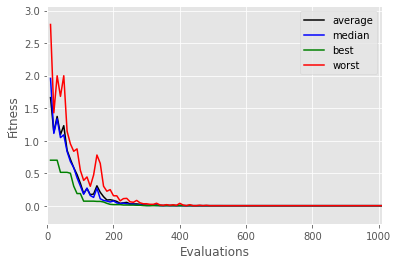

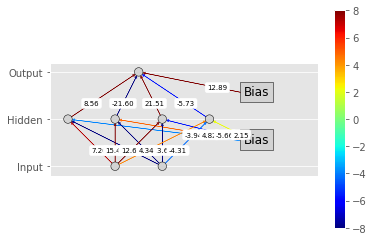



 NUMBER OF HIDDEN LAYERS: 5
Best Individual [  6.27758314   6.20353322  -3.93403635   6.89482055   7.09655443
  -0.25048359 -11.1411375    5.39041321 -10.65736166   7.90195892
  10.8845532    7.76647224  -3.01169017  -2.5684332   11.41989691
   7.33380397 -16.40704466  10.9626199   22.91075864  -3.29138056
  -0.68828943]
Best Fitness 6.642326763799303e-09


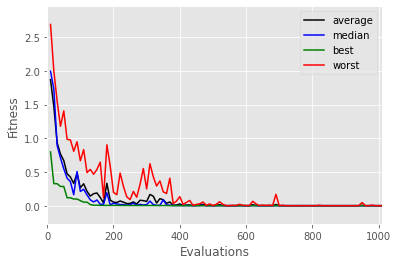

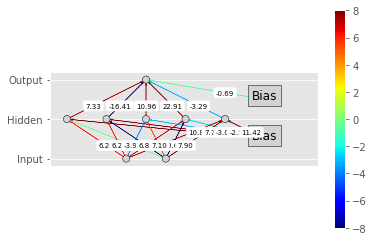



 NUMBER OF HIDDEN LAYERS: 6
Best Individual [ 11.18690442  -4.83620149  13.30089421   7.8094107   13.69445878
   5.91973415  -8.93623612  -6.33800308   4.60125202  15.99855132
  -8.35067947  -7.1537847   -6.93605045   7.84712038  12.02371645
  -6.43410364   5.16755461  -4.16073427  14.84430671  12.61472443
   0.47014175  11.42891346 -24.92565713   8.99363894  -3.84849731]
Best Fitness 1.2125001862499932e-13


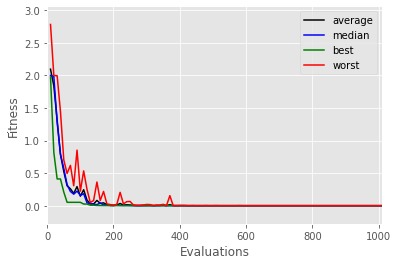

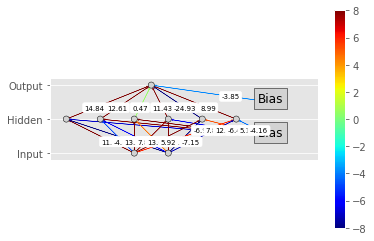



 NUMBER OF HIDDEN LAYERS: 7
Best Individual [ 10.6183015    7.25441469   7.11388685   1.3162099    3.63315865
  -2.4500568   -1.9596911  -10.2532223   -8.38028628  -9.03768866
   4.13065866  -1.86752979  -3.74805701   2.63781536   5.47799796
  -5.25365377  -4.67965801   0.6992375    3.77277372  -9.48534447
   5.62844599 -28.04586774  13.92478715  16.54087415  10.76798861
   3.53339195  -4.2878097    0.53463825  -0.14881895]
Best Fitness 1.0942468761366245e-11


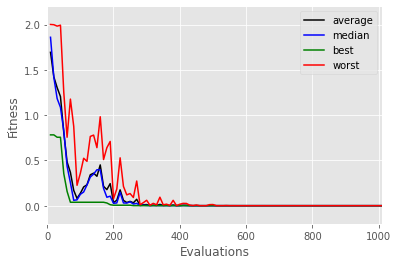

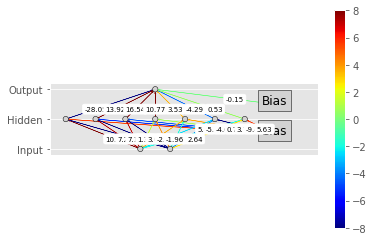



 NUMBER OF HIDDEN LAYERS: 8
Best Individual [ 12.7898111    5.31309358  -6.07418383   6.14359918   3.60592443
  -9.41679734  -0.33379001   2.84222061   9.21939611   5.71788058
   6.5024228   -6.76871977   4.83645638   3.37921406   2.91911802
  -7.73471293   0.14204992  -2.2652891   -5.01934009  -2.8534535
   3.34267185  -1.78956932  12.24384611  -1.27181091   7.6265088
   3.77773703  19.87746732  15.32026605  -1.86731795   9.16098195
  -7.28274557  13.22345951 -14.55552028]
Best Fitness 2.1233949175276567e-10


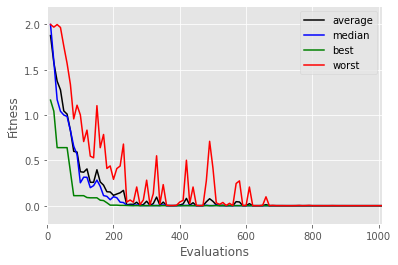

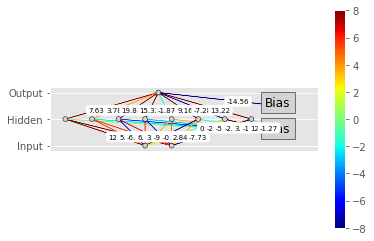



 NUMBER OF HIDDEN LAYERS: 9
Best Individual [ -4.8066047    9.0226291    0.033675     9.69448621   3.28314255
  10.97323935  -8.49786901   2.65381653  -3.03306855 -10.56015482
  10.95537585  -8.96105807  10.25005786   6.45523177 -13.48824214
   0.2055901    2.75714932   6.294495    16.54910455  -3.44737764
 -10.21728958 -13.20670846   2.6873424    7.01417907  -3.5933794
   7.7306855   -0.1970415   -3.00057545  29.41442963 -13.92271088
 -24.05626086   1.48800913  -6.88785445   1.99638916   5.86398462
  -6.71966358 -11.17702539]
Best Fitness 1.1069415376990563e-12


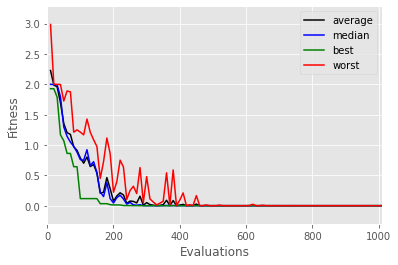

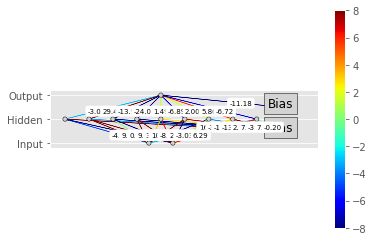



 NUMBER OF HIDDEN LAYERS: 10
Best Individual [ -7.72438217  -0.78435791  -7.6678824    8.98275419   5.59409841
   8.11042774  -1.63954171  -0.34736177   2.97017511  -7.04738135
   4.96756275   2.1835771    6.17090674  -7.38202754   9.12578508
  -6.87389944  -5.27134424  -0.49522161   3.81133503  -9.33356397
   3.07187544   3.27483312   9.77122459  -5.57248171  -2.2877225
   2.02385578  12.20029561  -1.42457352 -13.31545701  13.07720803
  -4.64755119   0.28313231   5.09739724   5.28528011   6.99329275
  -9.29746638  -3.57828963   1.45160921  -0.58975737   8.52586917
  -6.14853696]
Best Fitness 6.138497189461069e-06


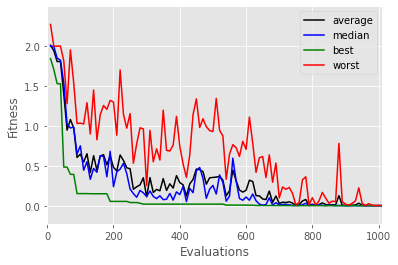

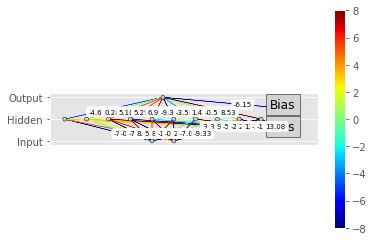

In [42]:
"""   
-------------------------------------------------------------------------
Edit this part to do the exercises
"""

# problem
problem_class = Xor

# parameters for the GA
args["num_hidden_units"] = 0 # Number of hidden units of the neural network
args["gaussian_stdev"] = 1.0 # Standard deviation of the Gaussian mutations
args["crossover_rate"]  = 0.8 # Crossover fraction
args["tournament_size"] = 2 # Tournament size
args["pop_size"] = 10 # Population size

args["num_elites"] = 3 # number of elite individuals to maintain in each gen
args["mutation_rate"] = 0.5 # fraction of loci to perform mutation on

# by default will use the problem's defined init_range
# uncomment the following line to use a specific range instead
#args["pop_init_range"] = [-500, 500] # Range for the initial population

args["use_bounder"] = False # use the problem's bounder to restrict values
# comment out the previously line to run unbounded

args["max_generations"] = 100 # Number of generations of the GA
display = True # Plot initial and final populations

"""
-------------------------------------------------------------------------
"""

args["fig_title"] = 'GA'
rng = Random(236677)
best_fitnesses = []
for i in range(1,11,1):
    print("\n\n NUMBER OF HIDDEN LAYERS: {}".format(i))
    args["num_hidden_units"] = i
    
    best_individual, best_fitness, final_pop = run_ga(rng, display=display,
                                                  problem_class=problem_class,**args)
    print("Best Individual", best_individual)
    print("Best Fitness", best_fitness)
    best_fitnesses.append(best_fitness)

    if display :
        net = problem_class(args["num_hidden_units"]).net
        net.set_params(best_individual)

        ann_plotter = ANNPlotter(net)
        ann_plotter.draw()

        ioff()
        show()

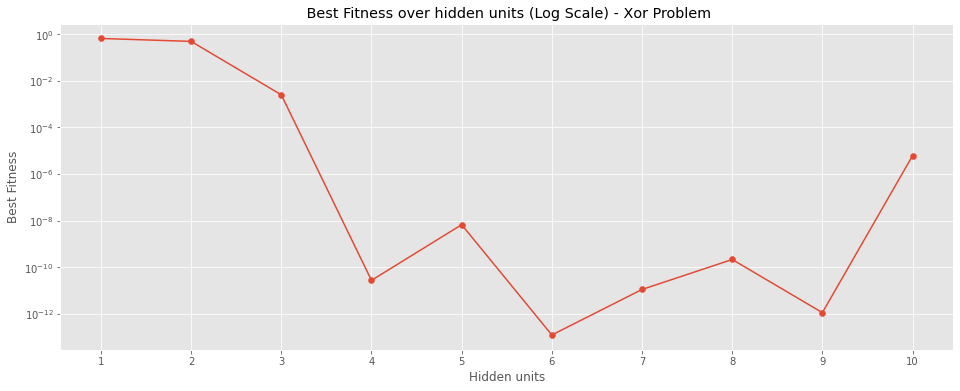

In [43]:
plt.figure(figsize=(16, 6))
x = [i for i in range(1, 11)]  # x-axis values from 1 to 10
plt.semilogy(x, best_fitnesses)  # Plotting on a log scale
plt.scatter(x, best_fitnesses)  # Overlay scatter plot

plt.xlabel('Hidden units')
plt.ylabel('Best Fitness')
plt.title(' Best Fitness over hidden units (Log Scale) - Xor Problem')
plt.xticks(x)
plt.show()


## Exercise 2
So far we have used Neural Networks for solving tasks where the output depends *statically* on the input vector, i.e., the input-output dependency does not change over time. However, there are many tasks such as time-series forecast and some robotic applications where the input-output dependence is *dynamic*, i.e., **the output of the system at time $t$ depends on the inputs at the same step, but also on the inputs at the previous time step(s).**
First, we start with a modified version of the ``Or`` problem, that is called ``Temporal Or``. While the basic ``Or`` problem involved evolving a Neural Network that would give a single output when provided two simultaneous inputs, **in ``Temporal Or``, there is only a single input node and the input values are provided in sequence. Therefore the network will have to remember the first input when seeing the second, in order to output the correct value.**

Run the jupyter block code to solve ``Temporal Or``.
- **Can you solve it? If you are unable to solve it, why is that?**

In this case, notice that there is one new parameter that you can modify in the script: ``recurrent``. This parameter is a Boolean flag, that says whether the network is recurrent (in this case an Elman network, [link here](https://en.wikipedia.org/wiki/Recurrent\_neural\_network\#Elman\_networks\_and\_Jordan\_networks)) or not (in which case it is a FFNN).
- **If you set ``recurrent`` to be ``True``, can you now evolve a successful network?**
- **Why might recurrence be important for solving a temporal problem such as this?**
  
Once you have been able to evolve a network capable of solving ``Temporal Or``, you can change in the script the parameter ``problem_class`` to ``TemporalAnd``, to attempt solving a temporal version of ``And``, and repeat.
- **Do the same EA parameters that solved ``Temporal Or`` also work for ``Temporal And``?**
- **Why, or why not?**

Finally, change in the script the parameter ``problem_class`` to ``TemporalXor``, to attempt solving a temporal version of ``Xor``. Run the code again.
- **Are you able to find a successful network?**
- **If not, think back to what you just saw in the previous exercise. What combination of recurrence and no. of hidden nodes is needed to solve ``Temporal Xor`` and why is that?**

## Temporal "Or"

#### recurrent off

Best Individual [-0.93627021  7.63950959  8.         -6.73337011 -2.31578263  5.82036945
 -3.69357087 -1.56080346 -3.24879278 -3.51871228 -4.68862381 -5.85693282
 -2.76436472  3.21309731  5.25797678  0.37719995 -2.85711037  0.91212709
 -0.674901  ]
Best Fitness 0.5000001985898522


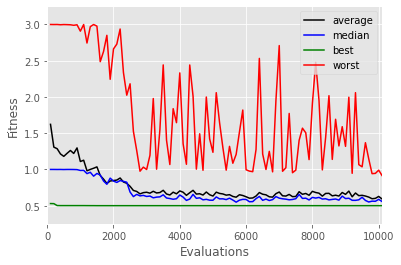

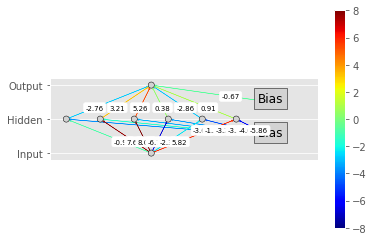

In [44]:
from utils.utils_08.ann_benchmarks import TemporalOr, TemporalAnd, TemporalXor
from utils.utils_08.ann_plotter import ANNPlotter

args = {}

"""   
-------------------------------------------------------------------------
Edit this part to do the exercises
"""

# problem
problem_class = TemporalOr

# parameters for the GA
args["num_hidden_units"] = 6 # Number of hidden units of the neural network
args["recurrent"] = False # Number of hidden units of the neural network
args["gaussian_stdev"] = 1.0 # Standard deviation of the Gaussian mutations
args["crossover_rate"]  = 0.8 # Crossover fraction
args["tournament_size"] = 2 # Tournament size
args["pop_size"] = 100 # Population size

args["num_elites"] = 1 # number of elite individuals to maintain in each gen
args["mutation_rate"] = 0.5 # fraction of loci to perform mutation on

# by default will use the problem's defined init_range
# uncomment the following line to use a specific range instead
#args["pop_init_range"] = [-500, 500] # Range for the initial population

args["use_bounder"] = True # use the problem's bounder to restrict values
# comment out the previously line to run unbounded

args["max_generations"] = 100 # Number of generations of the GA
display = True # Plot initial and final populations

"""
-------------------------------------------------------------------------
"""

args["fig_title"] = 'GA'

rng = Random()

best_individual, best_fitness, final_pop = run_ga(rng, display=display,
                                                  problem_class=problem_class,**args)
print("Best Individual", best_individual)
print("Best Fitness", best_fitness)

if display :
    net = problem_class(args["num_hidden_units"], args["recurrent"]).net
    net.set_params(best_individual)

    ann_plotter = ANNPlotter(net)
    ann_plotter.draw()

    ioff()
    show()

#### Trying different hidden units using recurrent on

NUMBER OF HIDDEN UNITS: 0
Best Individual [ 42.91082007  41.69700281 -20.86402971]
Best Fitness 1.6284790666995197e-18


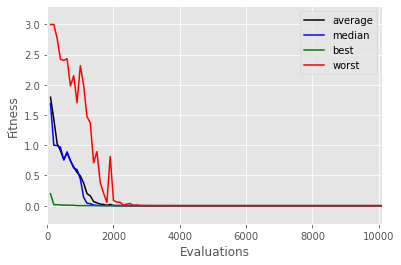

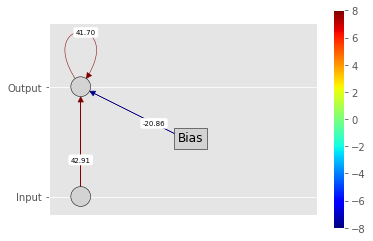

NUMBER OF HIDDEN UNITS: 1
Best Individual [-17.48393862  19.53552991  -2.2767297  -37.17790203  19.74550598]
Best Fitness 8.218364023509202e-15


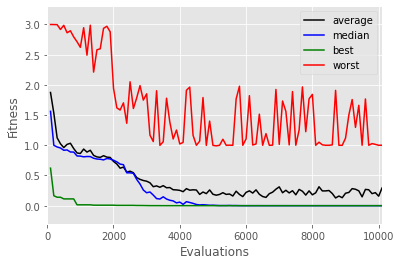

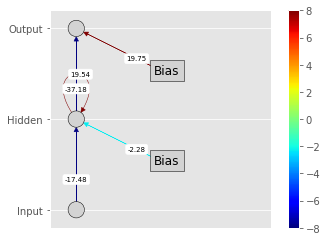

NUMBER OF HIDDEN UNITS: 2
Best Individual [-11.76139737  10.12818688 -11.88269124   3.09109769 -14.46119395
  16.71969216   6.40369967  -6.61213018 -48.99341419  42.59555858
  -4.5300662 ]
Best Fitness 5.065323563552313e-47


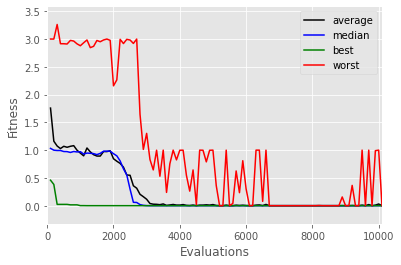

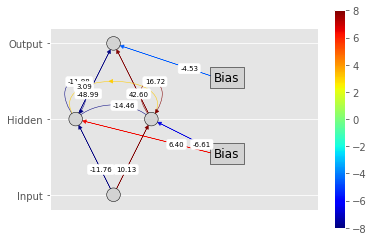

NUMBER OF HIDDEN UNITS: 3
Best Individual [ 14.49276718   0.94110962 -11.58671301   7.11306146  12.35203113
  18.06806272   6.73293819  -2.43048246  -6.07355412  -0.71820954
  -2.18696279 -21.16668957  -7.5719331   -5.48569543   4.64309439
  46.19778596   2.35372515 -25.83470195 -11.11901139]
Best Fitness 4.57704856818786e-31


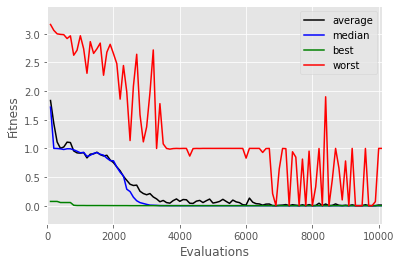

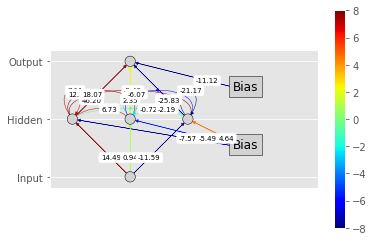

NUMBER OF HIDDEN UNITS: 4
Best Individual [ 16.58568893 -11.13642301  -7.63058077   9.92513918   7.88613867
 -13.27328726  -3.80431029  11.81549246  -4.55381678 -13.61807825
 -13.16904798   1.51457188 -11.38844424   3.68767487 -11.74620613
  -5.97106174   5.01715168  -2.26390654   5.80307933   1.52546719
  -3.57790478   3.1146966   -4.64602423  -6.55150969  28.82205368
 -28.1831821    8.90820232  28.59110707 -16.76216193]
Best Fitness 7.033502910582548e-38


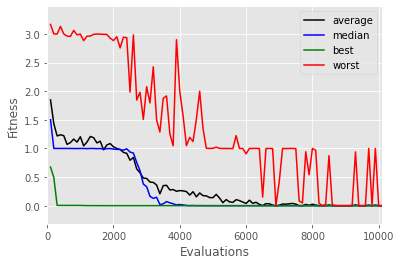

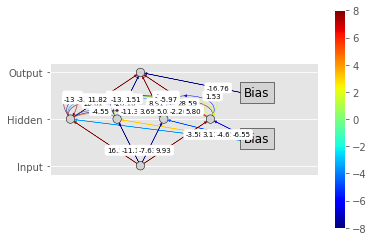

NUMBER OF HIDDEN UNITS: 5
Best Individual [ -3.24971565   9.96319851 -12.08763014  14.21821946  10.80080073
  -2.38538042  -9.96018957   1.41178569  -0.63163897   3.44234711
   7.42562956 -12.12419654  -0.31510456  -7.50230052  -6.11347149
  -5.77042669 -10.52044859 -18.49362277 -14.51511778  -0.75725827
 -11.09424311  -2.57246537 -14.23914879   8.0041375    3.09884133
  -4.27499949  -7.68069907  -9.73437231   4.26005559  11.58217611
   1.09161878 -15.48480876   5.82185173  -8.0848179   -7.07242579
 -11.87639144   3.23929075 -41.69493727  20.03329527  27.82749414
  -6.62251701]
Best Fitness 3.162022859922812e-50


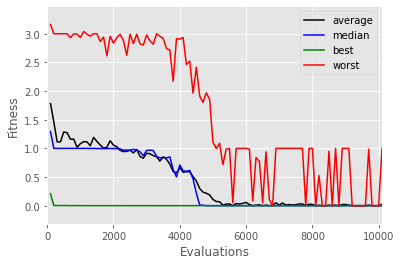

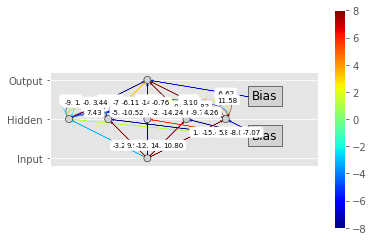

NUMBER OF HIDDEN UNITS: 6
Best Individual [  9.19859024 -15.49767162  14.78523317  15.88859476   4.60063588
  17.67672141  -0.40603292  -7.51095739  10.7279096    4.54435916
   0.39762049   8.96869914   9.72293421   4.38943973   1.21805536
  -3.36024739  -9.45286599  -3.00360867   1.55028582 -12.34765594
   1.65699522   0.34019809   8.1659736    3.11629563  13.03284473
 -12.45536341   1.73647958  12.19197795  -4.38586989   8.31597762
 -11.23795885 -11.60792744  -5.06955136   3.14324541  -0.85570348
   4.85108702   4.66366571   2.75401101  -1.14255464   6.17416728
 -12.33151375  13.5240323  -15.40498994   8.91241224 -10.69590686
  -7.54693855 -26.17581569  -8.07255934  21.30061533 -27.00622432
  23.9062937   17.85866453  -2.76547451   7.97880864 -21.75461733]
Best Fitness 5.1488562911657e-43


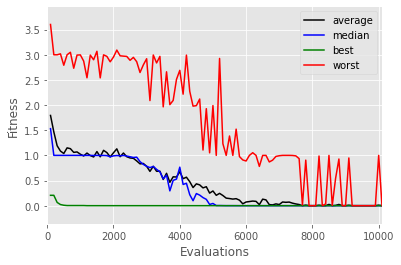

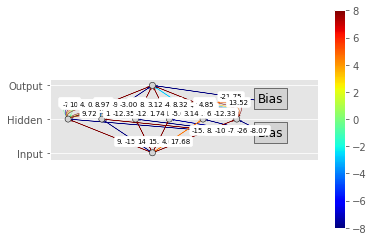

NUMBER OF HIDDEN UNITS: 7
Best Individual [ 14.50821972   9.29405044  -9.82280408  13.937173   -23.21676837
  -9.76444949  22.90401907  14.76987077   4.93884475  -1.8253983
   2.90022685 -13.80898035 -12.88219032 -12.56911317  -6.03907991
  11.41558576  -2.30639724   8.12315163 -21.40743727  -5.3179113
   0.05579922  -3.51087832  -1.82677655  -9.78723535   8.57963617
  -2.89883669   1.30965971  -4.93126286   4.43588051  13.53452822
   5.02687949  15.63114441  -5.77215875  -7.41197582 -16.3446542
  -3.98070298  -4.90978507   2.60937881   4.0232872   -5.11448575
 -11.76750779  -7.51133586  -4.72224765 -11.70133157 -15.67185287
 -16.21374171 -15.89311665  -7.00805637  -1.78340248  -1.73297033
  16.00859822   4.87598824  -5.63715309 -15.22677831  -0.9310383
  -0.34353581  -4.92923297  -6.81926989   1.56621362  -6.48553628
   4.53618319   6.94447766 -22.0161383   14.42386766  27.24027775
  -2.64737759   4.71399959 -27.00815373 -42.04311966   4.57556219
  -2.26263908]
Best Fitness 3.64206178

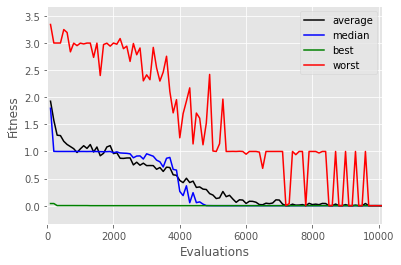

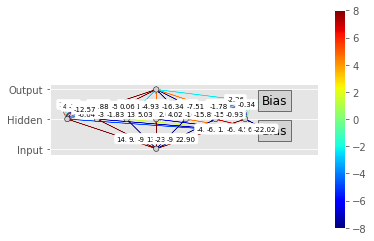

NUMBER OF HIDDEN UNITS: 8
Best Individual [ 18.41427068 -15.04791471  -2.82934569  16.38544686 -15.44832979
 -17.24991916  17.00962104  -5.24418931  -1.43862772  -5.78728425
   2.09820521   8.76565677  -4.90418065  -4.23626253  -3.80572206
 -12.38271438  -0.75589164   2.10382688  -2.61529564 -18.46593562
  -5.39229645   9.71046743  -5.4420033    1.87146977   2.58813803
   2.98221806  -1.61894056 -10.48651969   6.20527346 -10.07160699
   6.57319634  -4.54972659  16.85963162  -3.50745588  -2.24530988
  -1.46174228  -6.5135257   -3.62688871   5.48999829  -8.37730382
  -1.38866617   3.05821162  -6.604538    -2.15789342   4.1736442
  -2.71693325   2.64700184  -5.10061805   0.04782384  -0.87948724
   6.13383574  -9.38166822  10.73830398   4.84190932  -1.3214966
   8.32660346   0.07449398   0.34823572   4.85758266  20.81418644
   7.04314945  -5.53252598  17.62807773   4.63245306   3.86272955
 -15.36553237  -3.35909633   1.75777614  -1.70752728   0.64996912
  -9.6192681    4.72828161 -11.96912

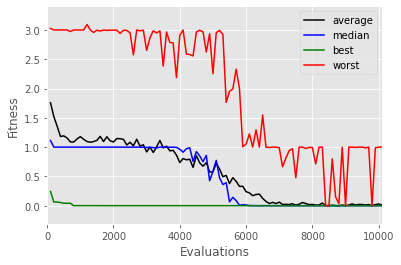

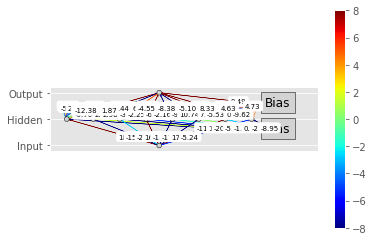

NUMBER OF HIDDEN UNITS: 9
Best Individual [  4.94444754  -2.50191002   5.30476674 -17.60220102  14.99981175
  17.80080407 -19.1673216   24.72651751   1.53793493  -9.07652001
 -12.53550425   0.31967522   5.68728277   1.49201182   9.12067831
   2.8583849  -13.96228278   9.98337824  -1.24568212  -8.71589756
  -4.65952732  -9.54548524  -6.00539373   0.41847823  11.9677781
 -10.41811999  -2.31188379 -10.32073705   1.42454517   3.63011919
 -12.30468839  -9.77963532  -7.49522606   7.35986402  -3.66969726
  12.39057422  -4.95231753   2.03711002   5.235864     0.77205573
  -0.45702115   3.56306218  -3.62543423   1.30329714  -5.0251183
  -6.99997792  10.39905373 -16.71040974 -18.03812346  13.84228717
   7.32397649 -14.63194198  -4.61613309   4.69601835 -16.23058784
   5.82274987  -8.83861957   0.90417496   1.15732739   1.33871435
 -16.76297997  -1.03174915  -9.79414392  -4.2756259   -4.73196697
  -6.17092108  15.085341    -5.08831352   1.29234221   0.98756471
  -3.33633252  -5.0736953   18.56889

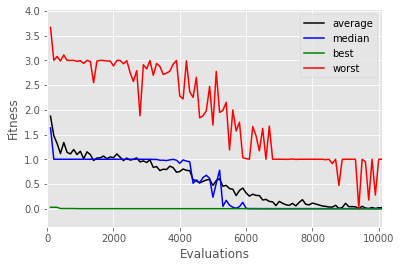

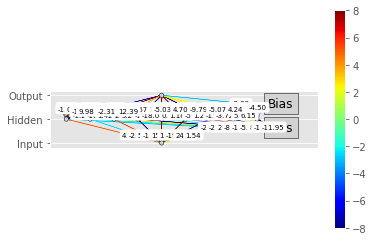

NUMBER OF HIDDEN UNITS: 10
Best Individual [-15.64433111  -6.18361923   8.18889382   0.57935627 -14.43717091
  13.60429061 -17.94531094   1.16991001  11.55340855  17.53063292
  -2.48947861  -4.69941353 -11.5338551   -8.60422995  -2.80753633
  16.52768492  -3.93533549  -5.25031789  -9.69074111   5.93848214
   3.47031316   8.07040899  12.65281797  -1.04197327   1.8011282
 -12.2526954   -6.93772482  10.87339716 -12.58725493  -0.45556344
 -12.67711787  -4.19741234   1.82616217 -11.63747863   7.58839307
   1.68354354  10.56621027  -5.61501913   2.38560585   3.57454385
  -5.05712755   8.1419237    6.35056218   3.1396112   -1.19254045
   0.51117564  13.30915293 -15.02373746   9.50839696   3.35659147
   2.5649349   -9.24682616  -7.10352472   0.53274697  -2.29651788
  -8.84482527   8.03760203  -1.81536017  -8.44863301  -7.13810175
  -6.96248763  -5.83439423 -10.07865484   1.56488123  -4.19906521
   6.06978161  -3.48021009 -13.50571668   9.57554397  -4.77907252
  11.84638846  -9.7666221   -5.458

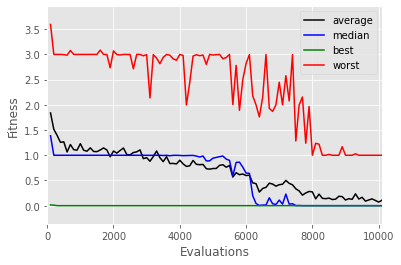

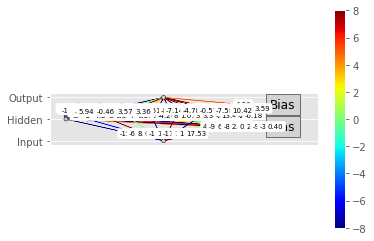

In [45]:
args = {}

"""   
-------------------------------------------------------------------------
Edit this part to do the exercises
"""

# problem
problem_class = TemporalOr

# parameters for the GA
args["num_hidden_units"] = 6 # Number of hidden units of the neural network
args["recurrent"] = True # Number of hidden units of the neural network
args["gaussian_stdev"] = 1.0 # Standard deviation of the Gaussian mutations
args["crossover_rate"]  = 0.8 # Crossover fraction
args["tournament_size"] = 2 # Tournament size
args["pop_size"] = 100 # Population size

args["num_elites"] = 1 # number of elite individuals to maintain in each gen
args["mutation_rate"] = 0.5 # fraction of loci to perform mutation on

# by default will use the problem's defined init_range
# uncomment the following line to use a specific range instead
#args["pop_init_range"] = [-500, 500] # Range for the initial population

args["use_bounder"] = False # use the problem's bounder to restrict values
# comment out the previously line to run unbounded

args["max_generations"] = 100 # Number of generations of the GA
display = True # Plot initial and final populations

"""
-------------------------------------------------------------------------
"""

args["fig_title"] = 'GA'

rng = Random()
best_fitnesses = []
for i in range(0,11,1):
    print("NUMBER OF HIDDEN UNITS: {}".format(i))
    args["num_hidden_units"] = i
    best_individual, best_fitness, final_pop = run_ga(rng, display=display,                                                  problem_class=problem_class,**args)
    print("Best Individual", best_individual)
    print("Best Fitness", best_fitness)
    best_fitnesses.append(best_fitness)

    if display :
        net = problem_class(args["num_hidden_units"], args["recurrent"]).net
        net.set_params(best_individual)

        ann_plotter = ANNPlotter(net)
        ann_plotter.draw()

        ioff()
        show()

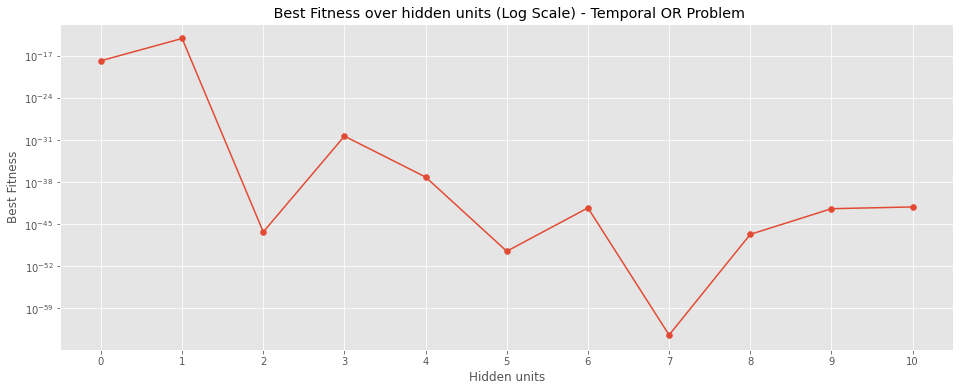

In [48]:
plt.figure(figsize=(16, 6))
x = [i for i in range(0, 11)]  # x-axis values from 1 to 10
plt.semilogy(x, best_fitnesses)  # Plotting on a log scale
plt.scatter(x, best_fitnesses)  # Overlay scatter plot

plt.xlabel('Hidden units')
plt.ylabel('Best Fitness')
plt.title(' Best Fitness over hidden units (Log Scale) - Temporal OR Problem')
plt.xticks(x)
plt.show()

## Temporal "And"

#### Trying different hidden units

NUMBER OF HIDDEN UNITS: 0
Best Individual [  8.33655317  35.0147919  -10.25070087]
Best Fitness 0.021470079234849077


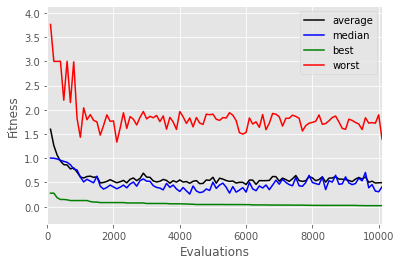

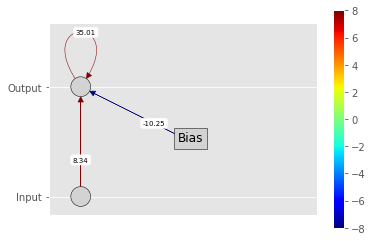

NUMBER OF HIDDEN UNITS: 1
Best Individual [-17.03846992  26.55002144   5.2370358  -51.46388876  23.79935299]
Best Fitness 2.1339781830183427e-21


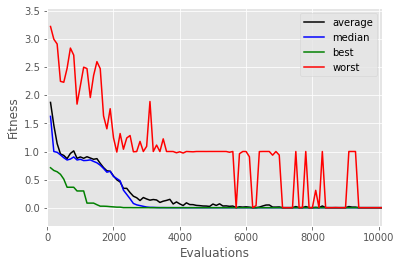

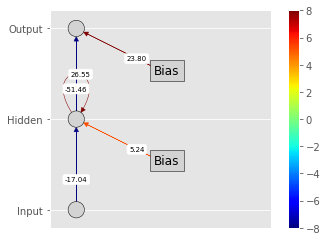

NUMBER OF HIDDEN UNITS: 2
Best Individual [-12.47271835 -10.22467372  10.61881767  17.90133238  13.12682942
   3.89913271   4.29411247   3.44391816 -37.81449725 -27.85600031
  32.06425231]
Best Fitness 2.644424363747668e-28


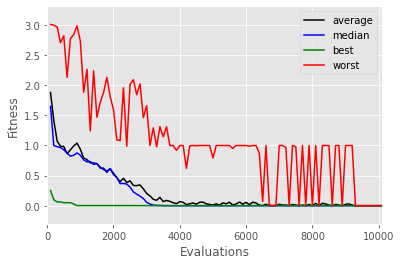

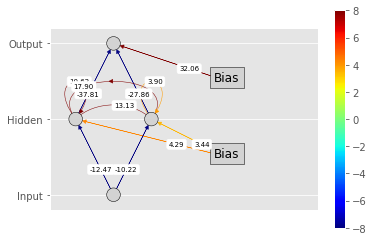

NUMBER OF HIDDEN UNITS: 3
Best Individual [-14.19225614  12.0556999    2.40479826  18.1084436  -15.84337038
  -5.51803502   2.28443727  -1.10118227 -11.58641817 -19.23465256
   1.93738437  -3.53068572   1.97197714  -4.14251615  -7.4862957
 -37.1306475   36.13663915  -2.10085687  -0.90954184]
Best Fitness 2.0302995357312872e-31


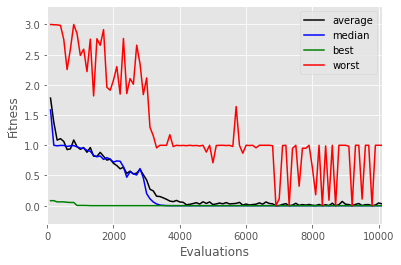

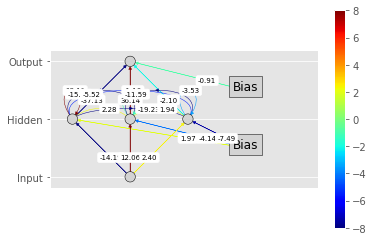

NUMBER OF HIDDEN UNITS: 4
Best Individual [ -5.49533514 -14.86877135   8.2261272   -9.887692    -3.5027907
  -7.47501195   9.38445823  -5.7458458   -2.53025      8.61624216
 -13.18461936  11.96623033  -1.5271204    6.64896936  -5.27587672
   2.67468743  -2.07433015  17.0556779   -8.46138439   4.67438704
  -4.31489283  -1.62393657  -0.29064574   3.89016427  -9.78764368
 -25.81247465  39.3295073  -35.3294786    4.14250195]
Best Fitness 1.2119169687248278e-49


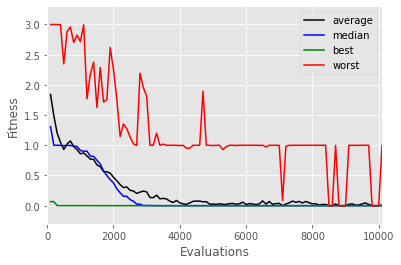

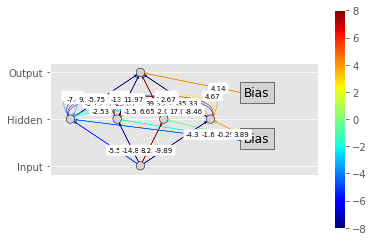

NUMBER OF HIDDEN UNITS: 5
Best Individual [-16.2000819    6.41091639 -18.1033783   -5.93308648   9.99895903
  11.99054704   2.36690068  14.91410278   2.15526692 -18.99782458
  -0.96574609  -1.52478631  -1.46487096 -13.31579273  -4.35385195
   4.61406595  -8.1281285    4.37780669  15.73424114  -1.93969862
   6.90021704  -5.34629708   5.51214747  -2.36489182   5.59707181
  -5.50674712 -13.34978378  -4.35291502   4.62501249  -8.97176835
  10.52021372  -3.14304429   3.49101144   0.29866207  -6.03752989
 -17.69738662  11.48522853 -21.70028799  -8.26454963  31.69657826
  -2.00314912]
Best Fitness 8.981752634842975e-40


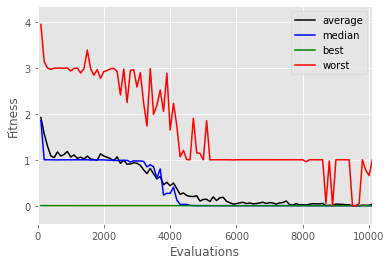

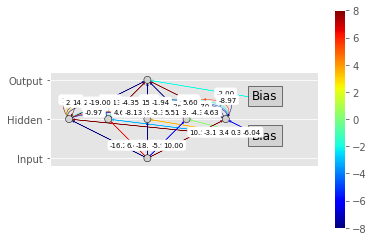

NUMBER OF HIDDEN UNITS: 6
Best Individual [ 11.2633689   12.05337351 -12.85032983 -13.56282048 -15.05330454
  -4.17974293  -2.36449061  -9.82451197  -8.47579833  -9.71045887
 -20.15120771 -13.6536292  -10.5363068   -3.92724384 -21.81124119
  -1.28628241 -10.03692088   1.87736857  -4.51143541 -13.40984336
   5.30594983  -5.38532412  12.85251126  -1.16863818  -7.86865667
  -4.48851067  12.98461991   9.60006491   4.27605322 -12.03036898
   0.4295404  -12.76410695   8.02508899  19.47486513  10.53701666
  -4.08337789  -6.45509903   1.03202213  -6.67951101   4.43016495
  -3.58972551   7.02878726  -5.3419254   -5.60273765   6.42657889
   4.34864876   5.62986601 -11.00630139  30.02919155  26.80504039
 -35.15821891 -24.74409042 -18.61646607 -11.53164465  -7.22943651]
Best Fitness 2.014752585789353e-74


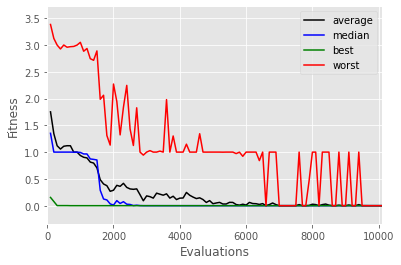

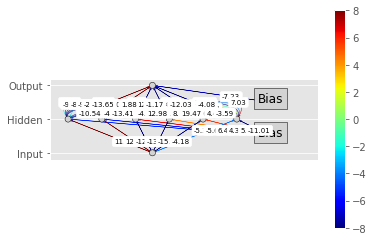

NUMBER OF HIDDEN UNITS: 7
Best Individual [-13.81489553  12.75314075 -10.22066065 -14.02052711 -20.45648497
  13.05052071  -5.81175292   0.06144521  10.34496826  10.86472639
  -2.36157713   9.90485171   0.36050813   7.0542417   -2.12119462
  -9.41449944  -8.57059093   1.90782184  -7.91304097  -3.79136708
  -9.92679296  -9.16276112  -2.15387846   0.97095396   3.98496853
   3.3891033  -10.19621041  22.48364356  -5.09815945  -3.49573665
  11.1980496   -3.01780638  -1.47233744  -2.08129824  -1.10033363
 -13.80022543  -6.43010695  15.37130293   6.11332687  19.34160854
  -9.74578707   3.19373129   8.27610781  -3.76414354  -3.4385233
  -0.47954285 -11.68743176 -16.52987563   3.3661643    4.48674074
 -12.72060272   7.37033102  10.45780727   4.71544055  -4.57213363
 -13.65085898   7.18810227  -6.04226499   2.16609308   7.34312437
   2.09812531  -3.88993341  -0.96181266  -8.2017677   13.82932409
 -15.4327539   -6.48746842 -18.95072316  20.25767976 -12.82665947
   4.45000152]
Best Fitness 4.21744

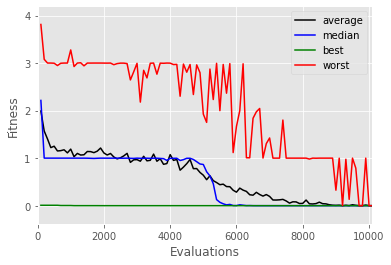

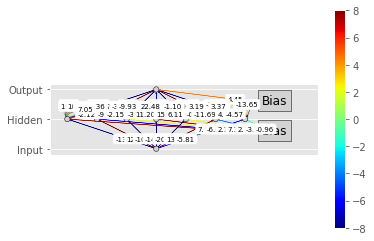

NUMBER OF HIDDEN UNITS: 8
Best Individual [ -6.50782453 -15.25032171   8.99117512 -11.91363247  -4.54074237
 -17.06138416 -10.16656844 -14.94462789   3.26202428   5.14796292
  -3.32928569  -0.63405514 -10.65892813   2.95613857 -12.34026331
   2.23728659   9.95677723   3.95177546 -14.95343318   0.25155073
  -4.50780475  16.88944102  13.81053811   4.22735815  -4.4831498
  -1.94328481 -11.61644673  -8.77224718 -11.10253136  -3.69446741
  -4.45422495   2.53922707  -1.17483606  11.65978585   5.00349314
  -0.46185226  -0.81774487   7.55476223   6.37320579  -7.84997996
  -6.80821082  -0.80747567  -4.85771826   0.75077154  -3.68772605
   5.50872324  -4.85828209   5.75345203   3.73280933  14.10768925
   2.43029175   1.98272083   7.60758991   2.06300064  -6.9444603
   1.72445089  -9.21830754  -6.14933159  -3.27341025  10.57876999
  13.07609885   5.44083649   9.01819497  15.20616457   7.43978404
   7.33237758 -11.18163742   8.4071308   -3.1142862  -16.89760989
  25.20286573   1.27508854   0.59135

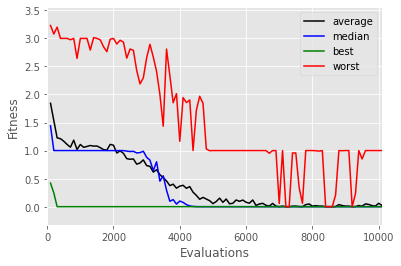

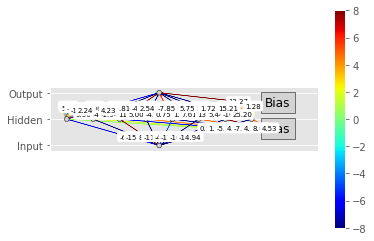

NUMBER OF HIDDEN UNITS: 9
Best Individual [-14.63095024  -6.44118418  11.08109414 -13.99035353   1.57399757
  -4.2803558   -9.19909017  -1.56443224 -11.59652422  21.4327645
   5.31976003 -18.77716709  -7.78083942   2.10770792  -3.92304428
  -2.63834326   3.01041433   1.26506315  -8.09445376   1.02032086
   0.78864288  -6.63753552   5.21404642  -7.77879999  13.68634424
  -4.03184184  -8.20736922  -0.86436114  -3.0740737  -12.9922127
  -0.10260111  -1.03937941 -10.94194901   3.9056668   -0.59365441
  -3.59172126   2.29681072   2.25104562  10.51707854   2.08743884
  -7.55325047   3.29209329  -6.6651659   11.6974048    4.68571192
   1.44486714   2.2081132    2.20348461   2.75490804  10.1756707
   9.82145055   4.26867704 -11.51607375 -16.69861925   4.9594138
  13.13770513   4.20268613   0.35061174  -6.8930512    8.21317359
 -19.02552648  20.05848657 -16.63765952  -9.92890533 -12.8488208
  -3.35133487  13.12572629   3.81341054   4.66681768   8.10230079
  13.09415389  -9.29508059  -9.95477839

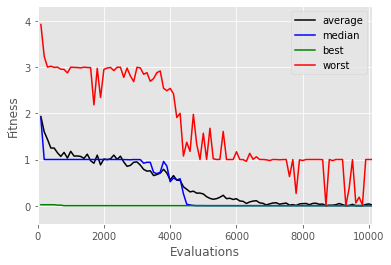

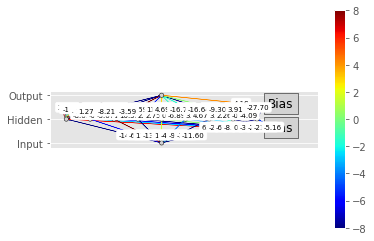

NUMBER OF HIDDEN UNITS: 10
Best Individual [ 11.61653027 -16.12573236  -8.81456251   6.05673271  -8.17924815
  -7.02268214 -14.13586232  10.67841125  -5.29004648 -18.92062865
  -0.40230817  -1.36540308  -4.54856235   7.68614489  -2.81918298
   5.8728954    6.4355398  -11.48928043  -2.69592658   0.20254374
   0.66665733  15.99189186  -2.50792714 -11.26489581  -2.70581309
  -5.25965089   5.13386993   6.3453415  -11.66846102  -7.29442279
  -5.60843725   1.66134089  -6.0516682    5.45329058  11.40436438
 -16.03595776   9.84681679 -12.26855028   1.90079752   9.009115
   3.97600635  -3.05288083   0.94341813   2.73490745  -6.85833328
  -6.94881245 -18.82190247   0.57747157 -12.43060832  -5.84365086
   0.26629911  -8.92776439   5.85816962 -15.01504425   7.81518531
   1.97353729   7.46995635   8.77778206   1.5313132   -0.93093724
 -11.84706761  -0.87181419  -4.79709278 -11.82549938  -2.04255116
 -14.22569103 -11.55139968   0.83830352   1.41923788  -7.17138608
 -14.19823433   0.24132647   8.4003

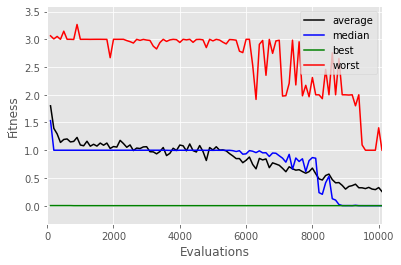

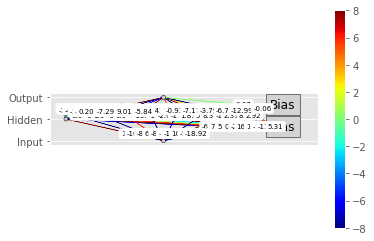

In [49]:
args = {}

"""   
-------------------------------------------------------------------------
Edit this part to do the exercises
"""

# problem
problem_class = TemporalAnd

# parameters for the GA
args["num_hidden_units"] = 6 # Number of hidden units of the neural network
args["recurrent"] = True # Number of hidden units of the neural network
args["gaussian_stdev"] = 1.0 # Standard deviation of the Gaussian mutations
args["crossover_rate"]  = 0.8 # Crossover fraction
args["tournament_size"] = 2 # Tournament size
args["pop_size"] = 100 # Population size

args["num_elites"] = 1 # number of elite individuals to maintain in each gen
args["mutation_rate"] = 0.5 # fraction of loci to perform mutation on

# by default will use the problem's defined init_range
# uncomment the following line to use a specific range instead
#args["pop_init_range"] = [-500, 500] # Range for the initial population

args["use_bounder"] = False # use the problem's bounder to restrict values
# comment out the previously line to run unbounded

args["max_generations"] = 100 # Number of generations of the GA
display = True # Plot initial and final populations

"""
-------------------------------------------------------------------------
"""

args["fig_title"] = 'GA'

rng = Random()
best_fitnesses = []
for i in range(0,11,1):
    print("NUMBER OF HIDDEN UNITS: {}".format(i))
    args["num_hidden_units"] = i
    best_individual, best_fitness, final_pop = run_ga(rng, display=display,                                                  problem_class=problem_class,**args)
    print("Best Individual", best_individual)
    print("Best Fitness", best_fitness)
    best_fitnesses.append(best_fitness)

    if display :
        net = problem_class(args["num_hidden_units"], args["recurrent"]).net
        net.set_params(best_individual)

        ann_plotter = ANNPlotter(net)
        ann_plotter.draw()

        ioff()
        show()

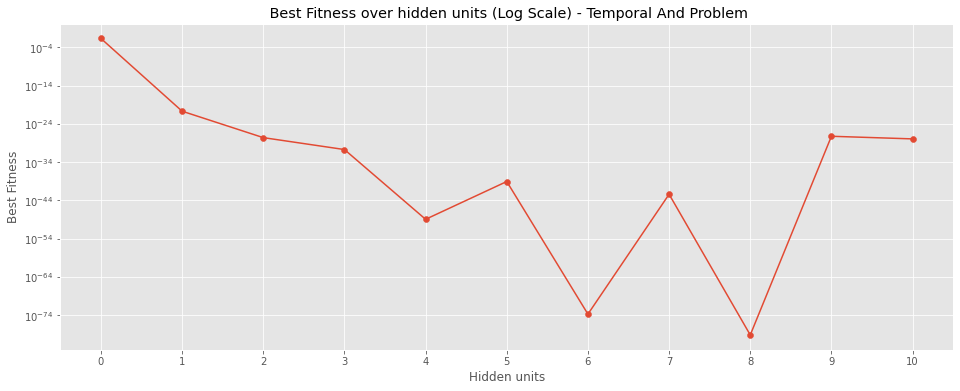

In [50]:
plt.figure(figsize=(16, 6))
x = [i for i in range(0, 11)]  # x-axis values from 1 to 10
plt.semilogy(x, best_fitnesses)  # Plotting on a log scale
plt.scatter(x, best_fitnesses)  # Overlay scatter plot

plt.xlabel('Hidden units')
plt.ylabel('Best Fitness')
plt.title(' Best Fitness over hidden units (Log Scale) - Temporal And Problem')
plt.xticks(x)
plt.show()

NUMBER OF HIDDEN UNITS: 0
Best Individual [ 37.51706891 -39.76676474 -18.65753099]
Best Fitness 1.0


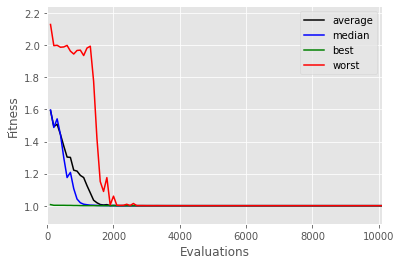

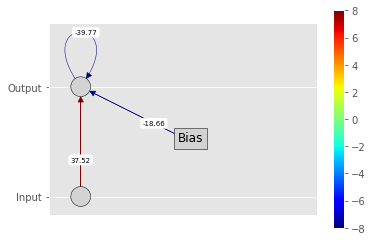

NUMBER OF HIDDEN UNITS: 1
Best Individual [21.61388369 18.98133757 -4.66561063  6.72916111 -6.0359653 ]
Best Fitness 0.6666739463634991


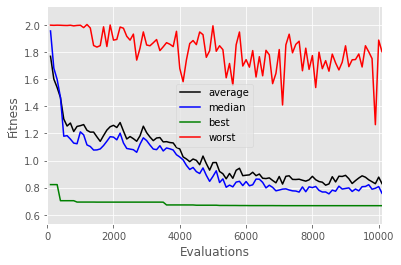

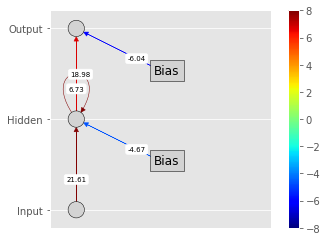

NUMBER OF HIDDEN UNITS: 2
Best Individual [-15.42657036  10.9500821    5.02348981 -10.17677252  -9.83985562
   0.57323232  -0.5150909   -8.24496746  -8.57791999  -8.63295311
   3.93036689]
Best Fitness 0.0010761853031095868


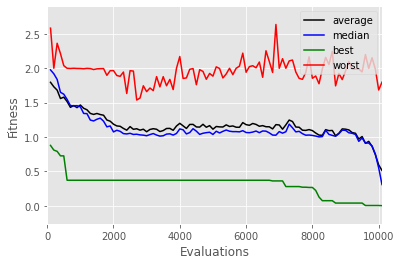

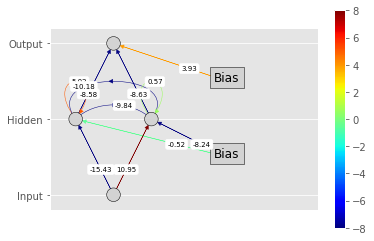

NUMBER OF HIDDEN UNITS: 3
Best Individual [-10.81019674   1.06019076  -7.83532703  10.10835156   1.55634288
   0.32247803  -2.39961016  11.02748447  -0.72315887   2.68320347
   4.0787374    9.61748008   7.38924617   1.27705203  -1.42548877
   8.39460141   4.89554529  -8.99185061  -7.26418133]
Best Fitness 0.011774141247555275


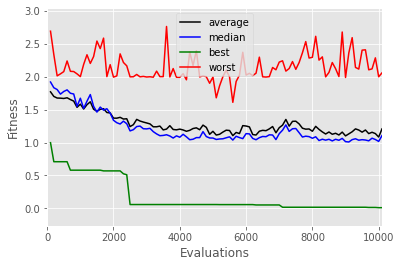

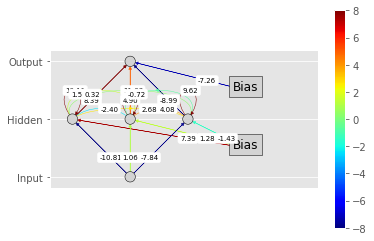

NUMBER OF HIDDEN UNITS: 4
Best Individual [-15.10362157   3.39371896 -14.44113627  -4.53544218  11.18021048
  -6.73802386  10.38406842   7.09281722  -5.14130938   6.00841657
 -12.06078899 -11.25877852  11.33415172   5.02986793   2.54867673
   8.5698444    1.53717435  10.41630581   4.65714045  -0.74619522
   7.22447075  -7.67106305  -4.01120871 -13.09059883  22.49656841
  -2.03761513 -23.46230362  -7.58657901 -10.37086339]
Best Fitness 1.226036395668212e-09


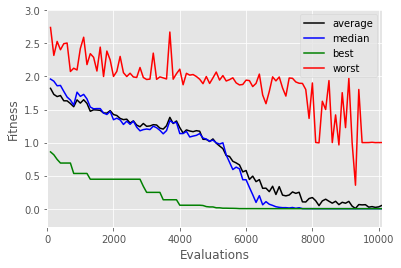

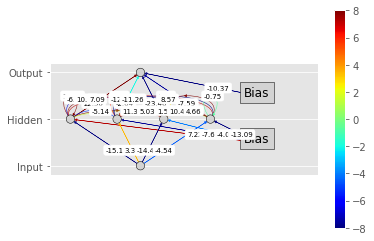

NUMBER OF HIDDEN UNITS: 5
Best Individual [ 11.04099165   7.84273851  -6.19698622  -5.07678697  -6.27939088
   6.37897323  -5.98867538  -0.3547273    8.41089155  -7.4082722
  -5.46821201   7.71700438   3.65269339   6.25700119  -4.68212344
  -7.3913191   -2.41368982   4.39615663   2.3739924    5.71114959
  -2.37162379  -5.10139636  -5.38791187   9.32187024  -3.62052905
   1.69432557   0.85748706   1.07426876  12.68841582 -11.58740447
 -14.4692163   -4.93272845 -13.65149512   4.61423977   3.90353314
  -1.9577291   -4.89263177   1.99655159   0.15736687  -7.17232224
   2.50825241]
Best Fitness 0.06944601304547064


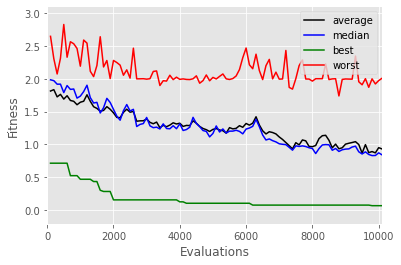

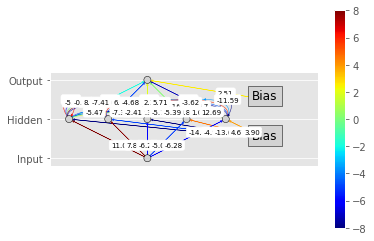

NUMBER OF HIDDEN UNITS: 6
Best Individual [-11.99172049  -6.66238209 -17.33417254 -14.35899648 -14.45274591
  -5.82812052  14.00380674  11.02622057  -4.45883669 -15.57324658
   5.76376399   7.47812918  13.53216927   5.51241727   4.68671667
  -6.3283645    2.40041976   2.51320735  18.29395525  -4.60977327
   2.04898822  -5.89725258  -6.4837742   -6.86601635  -4.50069672
  -8.57373484   1.25819751  -2.64201599  -8.19145706  11.16649655
  -8.23822496  -4.62832577   0.09123182  -1.97701796 -10.22723994
   4.47144354  -4.06364823  11.50187821  13.86663934   0.41633077
   6.11046957  -1.85956905   3.33886426  -5.47553315  -6.13674208
   8.26388113  -4.61688548  -1.06849144  10.73576299   7.17188285
 -14.49477843  11.3749863  -13.50352967   2.25238482  -8.58158189]
Best Fitness 3.86107102911983e-08


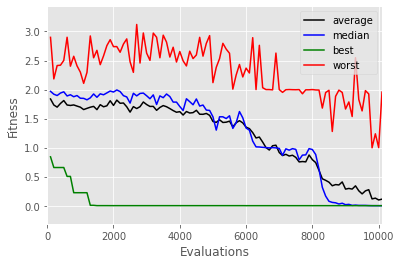

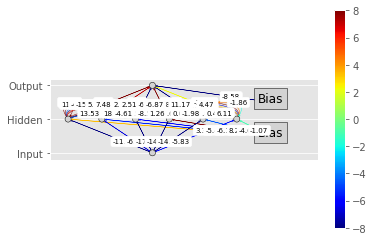

NUMBER OF HIDDEN UNITS: 7
Best Individual [ -4.79354183   1.99155149  10.15268736  -3.18321928   5.71740411
 -13.19135396  -4.32523033  -3.43211312   4.67191139   2.70053613
  -3.66501335  -4.40625577  -2.61232549  -4.03370463  15.09649295
  -5.13779134  -5.02559441  -8.69749386  -0.17822144   3.74222604
   6.43629225   2.98159853  -4.36666069 -15.39996779  -5.16837384
   3.86012271   1.93599455   6.74327741   2.81450793  -7.37447071
  -4.25162774  -9.1631069    3.40176775  -5.13214724  -2.70880315
  -8.27142375  -7.60928248   3.91731696  -7.79739073  -9.27849019
   4.32311178  -6.84481893 -11.84928936   0.31363862  -7.14208226
  10.26178664  -4.59306548  -0.32500687   6.01779414  -7.08172159
   1.06550736   6.93629962   6.16040336   4.42584601  -2.42657632
 -10.91389429   9.02790038  11.8096113  -12.07461608   0.76813145
   7.22035388  -4.20520528   6.46749014   2.21954418  -4.42395819
   1.1944358    1.11912043   2.1831864    5.82181336 -10.01699755
   6.0564243 ]
Best Fitness 0.0062

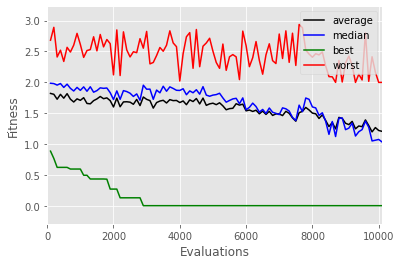

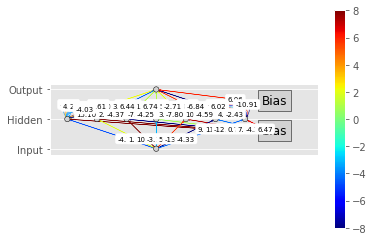

NUMBER OF HIDDEN UNITS: 8
Best Individual [ -2.38370294   7.64193356   0.78036509  -4.52594086   8.08989083
   7.67373804  -6.26282013   6.91449596   1.45807155  -4.53377372
   2.24109657   4.24253311  -2.75549302  -4.73189022   7.51490056
   1.40183906  -3.78215394  12.56555803  -8.22902683  -5.97693567
  -4.14012765 -11.69716774  -3.85658421  -5.59467034  -2.85410649
  -2.97496224  -1.93320355   1.35198829   1.03017239   4.36745565
   9.69520682  -2.19940339   5.41107341  -5.39674898  -0.06991253
   3.67471307  -9.55745804   3.04034941 -17.87330761   6.90596813
   1.41578816  -1.95845698   1.87300601  -3.50321699  10.90433702
  -9.88152227  -7.37932431   5.87497513  -9.40371756  -0.25730272
  -0.50329758   7.36198454  -8.59376678   1.79179043   6.74454081
   6.87065016   6.52398169  15.35828427  -4.78651487   3.70682533
  -7.12702065   5.35466482   3.60302186  12.98406308   8.94362495
  -4.19505647  -5.52925396  -1.77024619  -2.72161897  -0.6365141
  -0.11184452   1.25140202   5.8281

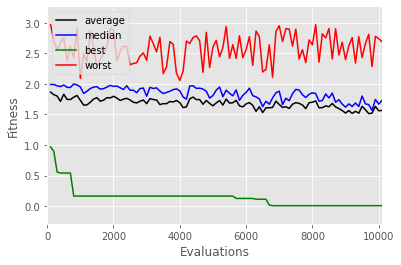

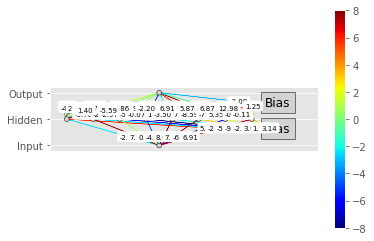

NUMBER OF HIDDEN UNITS: 9
Best Individual [-22.6801653    7.58030712  11.75103449  14.02645142 -11.51940061
   0.74756336  -2.3347628   10.53750236  -9.6578214    5.74266369
  -1.41837111  -9.60776153  -3.90138942   0.18154904   4.77808194
  -6.94753269  -9.58692079  -9.7744699   -5.61819851  -6.616265
   7.81035545   6.83042569  -1.91607704  13.07184439  -7.60036931
  -3.99081003   2.0631746    5.48720782  -4.63117227   6.15992214
   1.70433837   2.68021975  -4.35395695   7.02931665   2.80081366
  10.05124893 -12.35585192  -7.38127277   0.34336332   9.12311751
   3.58219434   5.83707111  -3.14913453 -11.00555666  -8.94852203
   6.24166794   2.81417046   0.96810705  -7.60229562   4.32167482
   3.27178066  -2.30776813 -14.64614529  -7.0185004  -11.28259692
  -4.37819932  -0.09243485   4.88896987  -2.91833282  -4.19447897
   2.37967766  -2.79772065  -2.50240826  -1.77933778   3.68220938
   0.0902575   -7.33733979 -14.88333249   6.83320333   2.01087914
  -4.76048251  -1.67056879  -4.64164

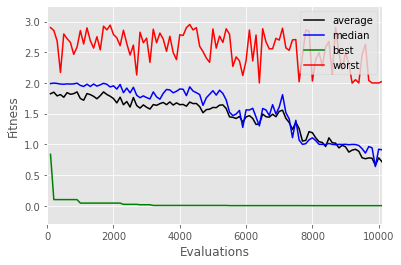

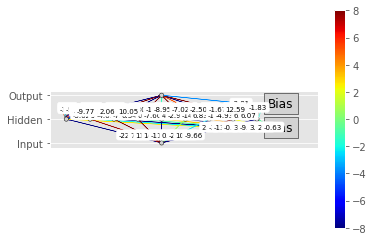

NUMBER OF HIDDEN UNITS: 10
Best Individual [  4.2536185   -7.3153347    6.16389175  -6.79400893  -8.83606226
   1.96590321 -21.82569608  -3.94698674  -0.49913623  -0.64545905
   6.05196459  -8.1445396    3.59580286   5.38063013   4.44948431
  -3.42446817   5.22256413  -4.33548575  -0.79257157  -6.12566983
  -1.24397762   1.11925256  -7.67773122   7.99935149   2.34656505
  11.16929855  -0.09082755   2.70264509  -7.15720706  -2.81471407
   6.13345661  -7.77053199   9.72839341   5.50416793   3.66851407
   1.96602204   7.15101441 -11.065074     6.31163916   5.81187358
   3.01364837  10.99538803  -2.03386116  -4.66424322   0.33895898
  -0.38946612  -1.97802809 -13.79201111  -0.50336284 -19.06686297
 -10.19648122  -7.17493894 -10.60169119  -2.69290199   6.96062879
  -3.32619775  -3.98846616  -5.76197124  -1.5041016  -10.46661351
   0.98632148  -0.57246293   6.81515246  -7.19837565   4.57570414
   2.79472875  -3.77810527  -4.19563801   0.68265637  11.52427351
  -9.6843223   -0.08610114  -6.52

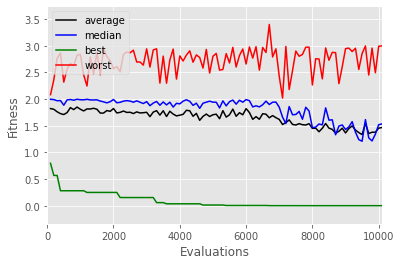

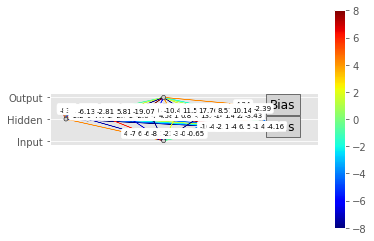

In [51]:
args = {}

"""   
-------------------------------------------------------------------------
Edit this part to do the exercises
"""

# problem
problem_class = TemporalXor

# parameters for the GA
args["num_hidden_units"] = 6 # Number of hidden units of the neural network
args["recurrent"] = True # Number of hidden units of the neural network
args["gaussian_stdev"] = 1.0 # Standard deviation of the Gaussian mutations
args["crossover_rate"]  = 0.8 # Crossover fraction
args["tournament_size"] = 2 # Tournament size
args["pop_size"] = 100 # Population size

args["num_elites"] = 1 # number of elite individuals to maintain in each gen
args["mutation_rate"] = 0.5 # fraction of loci to perform mutation on

# by default will use the problem's defined init_range
# uncomment the following line to use a specific range instead
#args["pop_init_range"] = [-500, 500] # Range for the initial population

args["use_bounder"] = False # use the problem's bounder to restrict values
# comment out the previously line to run unbounded

args["max_generations"] = 100 # Number of generations of the GA
display = True # Plot initial and final populations

"""
-------------------------------------------------------------------------
"""

args["fig_title"] = 'GA'

rng = Random()
best_fitnesses = []
for i in range(0,11,1):
    print("NUMBER OF HIDDEN UNITS: {}".format(i))
    args["num_hidden_units"] = i
    best_individual, best_fitness, final_pop = run_ga(rng, display=display,                                                  problem_class=problem_class,**args)
    print("Best Individual", best_individual)
    print("Best Fitness", best_fitness)
    best_fitnesses.append(best_fitness)

    if display :
        net = problem_class(args["num_hidden_units"], args["recurrent"]).net
        net.set_params(best_individual)

        ann_plotter = ANNPlotter(net)
        ann_plotter.draw()

        ioff()
        show()

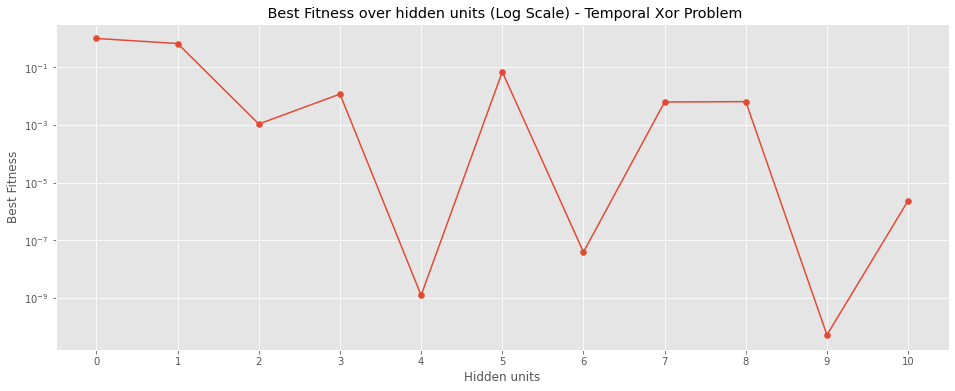

In [52]:
plt.figure(figsize=(16, 6))
x = [i for i in range(0, 11)]  # x-axis values from 1 to 10
plt.semilogy(x, best_fitnesses)  # Plotting on a log scale
plt.scatter(x, best_fitnesses)  # Overlay scatter plot

plt.xlabel('Hidden units')
plt.ylabel('Best Fitness')
plt.title(' Best Fitness over hidden units (Log Scale) - Temporal Xor Problem')
plt.xticks(x)
plt.show()

## Exercise 3

In this exercise we will use the Python implementation of **Neural Evolution of Augmenting Topologies (NEAT)** provided by *neat-python*, to solve the ``Xor`` problem we have seen in the first exercise. The main difference is that in this case we won't fix the network topology *a priori* and evolve its weights, but rather we will evolve the weights *and* the network topology itself. 

**NOTE**: In this case NEAT is configured to *maximize* the number of correct outputs in the $4$ input cases of the ``Xor`` truth table, **therefore the optimal fitness value is $4$.**

See the jupyter block code and try to understand its main steps. The *neat-python* library allows to configure all the algorithmic details of NEAT by means of an external configuration file. In this exercise two different configuration files **(inside folder utils/utils_08)** will be used, namely:
-  **``config-feedforward-2input-xor-noelitism.txt``**
-  **``config-feedforward-2input-xor-elitism.txt``**

Spend some time on one of the two files to get an idea about the main configurations that can be changed in NEAT ([see link](https://neat-python.readthedocs.io)). As you will see, in this case the two configuration files are pretty much the same, except for two parameters, namely ``species_elitism`` and ``elitism``. These represent respectively the no. of elite species (remember from the lecture that NEAT uses a **speciation** mechanism to allow mating only of *similar* networks) and elite individuals (i.e., networks) that are kept in the population. More specifically,**``config-feedforward-2input-xor-noelitism.txt``** sets both parameters to zero, while **``config-feedforward-2input-xor-elitism.txt``** sets them to two, meaning that two elite species and two elite networks are kept.

The script can be configured either to run a single instance of NEAT (by setting ``num_runs=1``) on one of the two configurations, or multiple runs (by setting ``num_runs`` to values bigger than one) on one or both configurations. In the first case, you can choose one of the two configuration files (with/without elitism) and observe how a single run of each configuration performs. The script will log on the console the runtime details of the evolutionary process (to disable this feature, simply comment the line ``p.add_reporter(neat.StdOutReporter(True)``). At the end of the run, you should obtain two figures similar to those shown below. In the second case, the script will execute multiple runs (e.g. $10$) of both configurations, and then produce a boxplot comparing the best fitness obtained by each configuration at the end of the computational budget. By default, the stop condition is set to $100$ generations, see the parameter ``num_generations`` in the code. However, the algorithm has an additional stop criterion, i.e., it stops when it obtains a Neural Network whose fitness is higher than the parameter ``fitness_threshold`` in the corresponding configuration file (in this case, by default this parameter is set to $3.9$, sufficiently close to the optimal value of $4$ to be approximated by a sigmoid function).

Fitness trend for the ``Xor`` problem solved by NEAT |  Corresponding species evolution, where each stacked plot represents one species and its size over evolutionary time. Species can go extinct if their size goes to zero
- | - 
![alt](img/trend.png) | ![alt](img/species.png)

- **First, run a single instance of each of the two configurations** (with/without elitism, simply change ``config_files[0]`` to ``config_files[1]``). **What do you observe? Is the algorithm without elitism able to converge to the optimal fitness value? What about the algorithm with elitism? What is the effect of elitism on convergence? What about the number of species and their dynamics?**
- **Change the parameter ``num_runs`` to $10$ or more. Does the boxplot confirm -in statistical terms- what you observed on a single run?** (**NOTE**: it takes 1-2 minutes to execute 10 runs for both configurations.)

In [54]:
!pip install graphviz


[notice] A new release of pip is available: 23.0 -> 23.1.2
[notice] To update, run: python.exe -m pip install --upgrade pip


#### single instance of no-elitism, 100 generations


 ****** Running generation 0 ****** 

Population's average fitness: 2.20975 stdev: 0.36419
Best fitness: 2.99826 - size: (1, 2) - species 1 - id 39
Average adjusted fitness: 0.538
Mean genetic distance 1.768, standard deviation 0.481
Population of 150 members in 1 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
     1    0   150      3.0    0.538     0
Total extinctions: 0
Generation time: 0.032 sec

 ****** Running generation 1 ****** 

Population's average fitness: 2.32804 stdev: 0.33247
Best fitness: 2.99905 - size: (1, 2) - species 1 - id 263
Average adjusted fitness: 0.590
Mean genetic distance 1.768, standard deviation 0.498
Population of 150 members in 2 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
     1    1    69      3.0    0.590     0
     2    0    81       --       --     0
Total extinctions: 0
Generation time: 0.040 sec (0.036 average)

 ****** Running generation 2 ****** 

Popu

Population's average fitness: 2.37391 stdev: 0.37724
Best fitness: 2.99995 - size: (4, 4) - species 2 - id 2952
Average adjusted fitness: 0.566
Mean genetic distance 1.821, standard deviation 0.489
Population of 150 members in 3 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
     1   19    42      3.0    0.562    15
     2   18    83      3.0    0.646    12
     3    2    25      3.0    0.489     0
Total extinctions: 0
Generation time: 0.068 sec (0.067 average)

 ****** Running generation 20 ****** 

Population's average fitness: 2.35376 stdev: 0.40567
Best fitness: 3.00000 - size: (2, 2) - species 2 - id 3119
Average adjusted fitness: 0.622
Mean genetic distance 1.732, standard deviation 0.542
Population of 150 members in 3 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
     1   20    28      3.0    0.628    16
     2   19    93      3.0    0.664    13
     3    3    29      3.0    0.574     1


Population's average fitness: 2.54786 stdev: 0.53268
Best fitness: 3.00000 - size: (5, 9) - species 5 - id 5694
Average adjusted fitness: 0.769
Mean genetic distance 2.312, standard deviation 0.493
Population of 150 members in 3 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
     3   20    58      3.0    0.718    11
     4    6    14      3.0    0.791     0
     5    2    78      3.0    0.797     0
Total extinctions: 0
Generation time: 0.096 sec (0.069 average)

 ****** Running generation 38 ****** 

Population's average fitness: 2.61901 stdev: 0.48811
Best fitness: 3.00000 - size: (5, 10) - species 5 - id 5833
Average adjusted fitness: 0.767
Mean genetic distance 2.505, standard deviation 0.521
Population of 150 members in 4 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
     3   21    40      3.0    0.813    12
     4    7    36      3.0    0.654     1
     5    3    54      3.0    0.835     0

Mean genetic distance 2.913, standard deviation 0.909
Population of 150 members in 9 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
     4   19    13      3.0    0.777     8
     5   15    22      3.0    0.749     8
     6   12    18      3.0    0.833     9
     7    8    20      3.0    0.848     6
     8    7    18      3.0    0.879     3
     9    7    17      3.0    0.668     4
    10    4    11      3.0    0.688     3
    11    3    18      3.0    0.877     1
    12    2    13      3.0    0.650     0
Total extinctions: 0
Generation time: 0.127 sec (0.127 average)

 ****** Running generation 51 ****** 

Population's average fitness: 2.61319 stdev: 0.51522
Best fitness: 3.00000 - size: (6, 5) - species 7 - id 7693
Average adjusted fitness: 0.797
Mean genetic distance 2.968, standard deviation 0.838
Population of 151 members in 10 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
     4   20    25

Mean genetic distance 2.821, standard deviation 0.667
Population of 150 members in 10 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
     4   29    17      3.0    0.863    18
     5   25    13      3.0    0.799    18
     6   22    13      3.0    0.733    19
     7   18    26      3.0    0.865    16
     8   17    28      3.0    0.682    13
     9   17    15      3.0    0.713    14
    10   14    11      3.0    0.875    13
    11   13    13      3.0    0.909    11
    12   12    12      3.0    0.721     3
    13    9     2      1.4    0.193     2
Total extinctions: 0
Generation time: 0.167 sec (0.149 average)

 ****** Running generation 61 ****** 

Population's average fitness: 2.54880 stdev: 0.54613
Best fitness: 3.00000 - size: (7, 8) - species 8 - id 9184

Species 6 with 13 members is stagnated: removing it
Average adjusted fitness: 0.746
Mean genetic distance 2.964, standard deviation 0.662
Population of 152 members in 10 species:
   ID

Mean genetic distance 2.955, standard deviation 0.788
Population of 150 members in 7 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
     8   29     7      3.0    0.554    11
    12   24    10      3.0    0.629    15
    13   21    32      2.8    0.694    14
    14   11    28      3.0    0.631     9
    15    9    46      3.0    0.846     0
    16    2    18      2.0    0.491     1
    17    0     9       --       --     0
Total extinctions: 0
Generation time: 0.118 sec (0.137 average)

 ****** Running generation 73 ****** 

Population's average fitness: 2.45157 stdev: 0.45608
Best fitness: 3.00000 - size: (8, 9) - species 14 - id 11045
Average adjusted fitness: 0.510
Mean genetic distance 3.040, standard deviation 0.752
Population of 150 members in 7 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
     8   30    11      2.4    0.292    12
    12   25    12      3.0    0.448    16
    13   22    3

Mean genetic distance 2.814, standard deviation 0.822
Population of 149 members in 6 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
    15   21    41      3.0    0.706     1
    16   14    24      3.0    0.618    11
    17   12    28      3.0    0.722    11
    18    9    30      3.0    0.723     1
    19    6    23      3.0    0.629     0
    20    0     3       --       --     0
Total extinctions: 0
Generation time: 0.136 sec (0.142 average)

 ****** Running generation 85 ****** 

Population's average fitness: 2.57811 stdev: 0.46711
Best fitness: 3.00000 - size: (7, 7) - species 15 - id 12865
Average adjusted fitness: 0.550
Mean genetic distance 2.875, standard deviation 0.836
Population of 150 members in 6 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
    15   22    34      3.0    0.732     0
    16   15    22      3.0    0.386    12
    17   13    17      3.0    0.396    12
    18   10    3

Mean genetic distance 3.313, standard deviation 0.875
Population of 149 members in 5 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
    15   34    26      3.0    0.751    12
    18   22    33      3.0    0.771    10
    19   19    27      3.0    0.750     0
    20   13    32      3.0    0.787     1
    21    9    31      3.0    0.825     8
Total extinctions: 0
Generation time: 0.140 sec (0.147 average)

 ****** Running generation 98 ****** 

Population's average fitness: 2.63807 stdev: 0.50120
Best fitness: 3.00000 - size: (8, 10) - species 19 - id 14736
Average adjusted fitness: 0.819
Mean genetic distance 3.243, standard deviation 0.863
Population of 150 members in 5 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
    15   35    24      3.0    0.772    13
    18   23    35      3.0    0.819    11
    19   20    29      3.0    0.871     1
    20   14    30      3.0    0.779     0
    21   10    

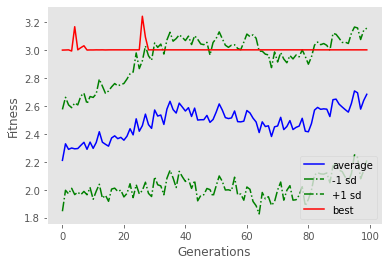

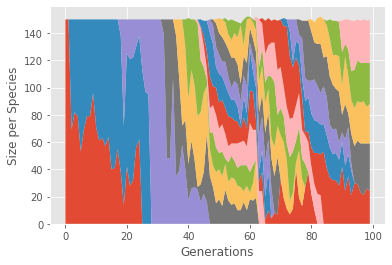

In [55]:
import os
import neat
from utils.utils_08 import visualize
from IPython.display import Image

from pylab import *

# 2-input XOR inputs and expected outputs.
inputs = [(0.0, 0.0), (0.0, 1.0), (1.0, 0.0), (1.0, 1.0)]
outputs = [   (0.0,),     (1.0,),     (1.0,),     (0.0,)]

num_generations = 100
num_runs = 1

config_files = ['config-feedforward-2input-xor-noelitism.txt',
                'config-feedforward-2input-xor-elitism.txt']

def eval_genomes(genomes, config):
    for genome_id, genome in genomes:
        genome.fitness = len(inputs)
        net = neat.nn.FeedForwardNetwork.create(genome, config)
        for xi, xo in zip(inputs, outputs):
            output = net.activate(xi)
            genome.fitness -= (output[0] - xo[0]) ** 2

    
local_dir = os.path.dirname('utils/utils_08/')

if num_runs == 1:
    # Load configuration.
    config_file = os.path.join(local_dir, config_files[0])
    config = neat.Config(neat.DefaultGenome, neat.DefaultReproduction,
                         neat.DefaultSpeciesSet, neat.DefaultStagnation,
                         config_file)

    # Create the population, which is the top-level object for a NEAT run.
    p = neat.Population(config)

    # Add a stdout reporter to show progress in the terminal.
    stats = neat.StatisticsReporter()
    p.add_reporter(neat.StdOutReporter(True))
    p.add_reporter(stats)

    # run NEAT for num_generations
    winner = p.run(eval_genomes, num_generations)

    # Display the winning genome.
    print('\nBest genome:\n{!s}'.format(winner))

    # Show output of the most fit genome against training data.
    print('\nOutput:')
    winner_net = neat.nn.FeedForwardNetwork.create(winner, config)
    for xi, xo in zip(inputs, outputs):
        output = winner_net.activate(xi)
        print("input {!r}, expected output {!r}, got {!r}".format(xi, xo, output))

    node_names = {-1:'A', -2: 'B', 0:'A XOR B'}
    
    
    visualize.plot_stats(stats, ylog=False, view=True)
    visualize.plot_species(stats, view=True)
    
    #if you want to visualize the network architecture uncomment the following line of code
    #having graphviz installed on your device is required in order to visualize the plot  
    #how to install it? see link https://graphviz.org/download/ 
    visualize.draw_net(config, winner, filename='2-input OR', view=True, node_names=node_names)
else:
    results = []
    for file in config_files:

        # Load configuration.
        config_file = os.path.join(local_dir, file)
        config = neat.Config(neat.DefaultGenome, neat.DefaultReproduction,
                             neat.DefaultSpeciesSet, neat.DefaultStagnation,
                             config_file)

        best_fitnesses = []
        for i in range(num_runs):
            print('{0}/{1}'.format(i+1,num_runs))
            p = neat.Population(config)
            winner = p.run(eval_genomes, num_generations)
            best_fitnesses.append(winner.fitness)
        results.append(best_fitnesses)

    fig = figure('NEAT')
    ax = fig.gca()
    ax.boxplot(results)
    ax.set_xticklabels(['Without elitism', 'With elitism'])
    #ax.set_yscale('log')
    ax.set_xlabel('Condition')
    ax.set_ylabel('Best fitness')
    show()

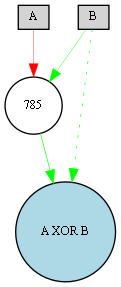

In [58]:
Image('2-input OR' + '.png')

#### single instance of no elitism, 200 generations


 ****** Running generation 0 ****** 

Population's average fitness: 2.23744 stdev: 0.33610
Best fitness: 2.99831 - size: (1, 2) - species 1 - id 116
Average adjusted fitness: 0.516
Mean genetic distance 1.351, standard deviation 0.467
Population of 150 members in 1 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
     1    0   150      3.0    0.516     0
Total extinctions: 0
Generation time: 0.040 sec

 ****** Running generation 1 ****** 

Population's average fitness: 2.30053 stdev: 0.31738
Best fitness: 2.99856 - size: (1, 2) - species 1 - id 166
Average adjusted fitness: 0.567
Mean genetic distance 1.308, standard deviation 0.443
Population of 150 members in 1 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
     1    1   150      3.0    0.567     0
Total extinctions: 0
Generation time: 0.049 sec (0.044 average)

 ****** Running generation 2 ****** 

Population's average fitness: 2.34739 stdev: 

Population's average fitness: 2.58673 stdev: 0.46898
Best fitness: 3.00000 - size: (6, 5) - species 2 - id 2846
Average adjusted fitness: 0.611
Mean genetic distance 1.854, standard deviation 0.240
Population of 150 members in 2 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
     1   18   120      3.0    0.592    13
     2   14    30      3.0    0.629     1
Total extinctions: 0
Generation time: 0.108 sec (0.090 average)

 ****** Running generation 19 ****** 

Population's average fitness: 2.52576 stdev: 0.48904
Best fitness: 3.00000 - size: (5, 5) - species 1 - id 2979
Average adjusted fitness: 0.613
Mean genetic distance 1.833, standard deviation 0.314
Population of 150 members in 2 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
     1   19    75      3.0    0.704    14
     2   15    75      3.0    0.523     2
Total extinctions: 0
Generation time: 0.094 sec (0.095 average)

 ****** Running gen

Mean genetic distance 2.476, standard deviation 0.565
Population of 149 members in 7 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
     2   29    20      3.0    0.643     2
     3   11     8      2.6    0.248     2
     4    6    18      3.0    0.739     2
     5    6    23      3.0    0.700     1
     6    4    57      3.0    0.526     0
     7    2     5      3.0    0.575     0
     8    2    18      3.0    0.527     1
Total extinctions: 0
Generation time: 0.139 sec (0.100 average)

 ****** Running generation 34 ****** 

Population's average fitness: 2.60402 stdev: 0.47900
Best fitness: 3.00000 - size: (8, 6) - species 4 - id 5161
Average adjusted fitness: 0.648
Mean genetic distance 2.539, standard deviation 0.610
Population of 149 members in 7 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
     2   30    23      3.0    0.738     3
     3   12    11      2.7    0.329     3
     4    7    23 

Mean genetic distance 2.636, standard deviation 0.708
Population of 152 members in 9 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
     2   41    16      3.0    0.640    14
     3   23    15      3.0    0.623    14
     4   18    28      3.0    0.604    14
     5   18    14      3.0    0.697    13
     6   16    14      3.0    0.665    12
     7   14    26      3.0    0.705    12
     8   14     9      3.0    0.601     5
     9    7    12      3.0    0.456     1
    10    7    18      3.0    0.789     0
Total extinctions: 0
Generation time: 0.151 sec (0.151 average)

 ****** Running generation 46 ****** 

Population's average fitness: 2.61320 stdev: 0.46012
Best fitness: 3.00000 - size: (4, 5) - species 6 - id 6934
Average adjusted fitness: 0.583
Mean genetic distance 2.652, standard deviation 0.712
Population of 150 members in 9 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
     2   42    22 

Mean genetic distance 2.718, standard deviation 0.820
Population of 151 members in 5 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
     8   25    47      3.0    0.547    16
     9   18    24      3.0    0.257     9
    10   18    45      3.0    0.547    11
    11    4    28      3.0    0.356     1
    12    0     7       --       --     0
Total extinctions: 0
Generation time: 0.216 sec (0.138 average)

 ****** Running generation 57 ****** 

Population's average fitness: 2.57422 stdev: 0.45833
Best fitness: 3.00000 - size: (6, 7) - species 10 - id 8607
Average adjusted fitness: 0.508
Mean genetic distance 2.926, standard deviation 0.810
Population of 150 members in 6 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
     8   26    46      3.0    0.741    17
     9   19    22      3.0    0.432    10
    10   19    34      3.0    0.656    12
    11    5    36      3.0    0.617     0
    12    1     7

Population's average fitness: 2.55182 stdev: 0.44452
Best fitness: 3.00000 - size: (4, 5) - species 16 - id 10487
Average adjusted fitness: 0.486
Mean genetic distance 2.995, standard deviation 0.763
Population of 150 members in 8 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
     9   31    18      3.0    0.583     0
    11   17    29      3.0    0.739     0
    12   13    26      3.0    0.701     7
    13   12    22      3.0    0.438     0
    14   11    11      3.0    0.321     0
    15    9    16      3.0    0.303     3
    16    6    22      3.0    0.764     5
    17    5     6      2.4    0.039     0
Total extinctions: 0
Generation time: 0.146 sec (0.144 average)

 ****** Running generation 70 ****** 

Population's average fitness: 2.54359 stdev: 0.47007
Best fitness: 3.00000 - size: (3, 4) - species 16 - id 10633
Average adjusted fitness: 0.692
Mean genetic distance 2.973, standard deviation 0.770
Population of 149 members in 8 speci

Mean genetic distance 2.968, standard deviation 0.818
Population of 149 members in 8 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
     9   42    27      3.0    0.574     7
    11   28    12      3.0    0.794     7
    12   24    39      3.0    0.665     4
    13   23    10      2.9    0.203     7
    14   22    23      3.0    0.505     1
    15   20    10      2.8    0.181     9
    16   17    10      2.0    0.029    16
    17   16    18      3.0    0.643     7
Total extinctions: 0
Generation time: 0.156 sec (0.161 average)

 ****** Running generation 81 ****** 

Population's average fitness: 2.65511 stdev: 0.45767
Best fitness: 3.00000 - size: (12, 15) - species 14 - id 12232
Average adjusted fitness: 0.759
Mean genetic distance 2.834, standard deviation 0.801
Population of 150 members in 8 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
     9   43    23      3.0    0.819     8
    11   29   

Mean genetic distance 2.864, standard deviation 0.845
Population of 150 members in 8 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
     9   54    15      3.0    0.318    19
    11   40    25      3.0    0.875    19
    12   36    37      3.0    0.668     5
    13   35    15      2.7    0.115     5
    14   34    22      3.0    0.542    13
    17   28    27      3.0    0.609    19
    18    5     7      3.0    0.267     3
    19    1     2      2.0    0.000     0
Total extinctions: 0
Generation time: 0.126 sec (0.149 average)

 ****** Running generation 93 ****** 

Population's average fitness: 2.56197 stdev: 0.47869
Best fitness: 3.00000 - size: (7, 7) - species 12 - id 13980

Species 11 with 25 members is stagnated: removing it

Species 17 with 27 members is stagnated: removing it

Species 9 with 15 members is stagnated: removing it
Average adjusted fitness: 0.397
Mean genetic distance 2.951, standard deviation 0.906
Population of 150 mem

Mean genetic distance 2.920, standard deviation 0.945
Population of 150 members in 9 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
    12   48    20      3.0    0.838    17
    13   47    18      3.0    0.826    17
    18   17    12      3.0    0.630     6
    19   13    14      3.0    0.730     2
    20    9    15      3.0    0.609     3
    21    7    17      3.0    0.663     5
    22    6    15      3.0    0.821     5
    23    6    21      3.0    0.582     4
    24    4    18      3.0    0.667     0
Total extinctions: 0
Generation time: 0.125 sec (0.122 average)

 ****** Running generation 105 ****** 

Population's average fitness: 2.41848 stdev: 0.49927
Best fitness: 3.00000 - size: (2, 4) - species 18 - id 15894
Average adjusted fitness: 0.677
Mean genetic distance 2.945, standard deviation 0.954
Population of 149 members in 9 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
    12   49    

Mean genetic distance 3.088, standard deviation 1.237
Population of 151 members in 9 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
    18   28    16      3.0    0.631     8
    19   24    10      3.0    0.683     2
    20   20     2      3.0    0.704     5
    21   18    16      3.0    0.741    16
    22   17    22      3.0    0.736    16
    23   17    31      3.0    0.620     9
    24   15    17      3.0    0.751     2
    25    9    16      3.2    0.620     0
    26    8    21      3.0    0.684     4
Total extinctions: 0
Generation time: 0.102 sec (0.124 average)

 ****** Running generation 116 ****** 

Population's average fitness: 2.46826 stdev: 0.50586
Best fitness: 3.07998 - size: (2, 3) - species 26 - id 17536
Average adjusted fitness: 0.690
Mean genetic distance 3.046, standard deviation 1.248
Population of 152 members in 9 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
    18   29    

Mean genetic distance 3.086, standard deviation 1.170
Population of 150 members in 8 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
    19   36    36      3.0    0.611     1
    20   32    19      3.0    0.635    17
    24   27    26      3.0    0.763     4
    25   21    23      2.0    0.146    12
    26   20     7      2.5    0.210    11
    27    4     4      3.0    0.229     0
    28    4     9      3.0    0.323     3
    29    4    26      3.0    0.744     3
Total extinctions: 0
Generation time: 0.109 sec (0.116 average)

 ****** Running generation 128 ****** 

Population's average fitness: 2.42972 stdev: 0.46736
Best fitness: 3.00000 - size: (4, 6) - species 28 - id 19314
Average adjusted fitness: 0.500
Mean genetic distance 2.942, standard deviation 1.107
Population of 150 members in 8 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
    19   37    24      3.0    0.511     2
    20   33    

Population's average fitness: 2.42942 stdev: 0.46954
Best fitness: 3.00000 - size: (3, 3) - species 28 - id 20800
Average adjusted fitness: 0.498
Mean genetic distance 3.308, standard deviation 1.485
Population of 150 members in 6 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
    19   47    18      3.0    0.517     0
    24   38    25      3.0    0.664     0
    27   15     7      3.0    0.260     4
    28   15    28      3.0    0.682    14
    29   15    20      3.0    0.648    14
    30    8    52      3.0    0.216     1
Total extinctions: 0
Generation time: 0.103 sec (0.123 average)

 ****** Running generation 139 ****** 

Population's average fitness: 2.44939 stdev: 0.47314
Best fitness: 3.00000 - size: (5, 5) - species 24 - id 20924
Average adjusted fitness: 0.617
Mean genetic distance 3.313, standard deviation 1.397
Population of 150 members in 6 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  

Mean genetic distance 3.214, standard deviation 1.398
Population of 149 members in 7 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
    19   61    27      3.0    0.871    11
    24   52    28      3.0    0.875    13
    27   29    17      3.0    0.587    18
    30   22    15      2.4    0.569    15
    31    3    28      3.0    0.897     2
    32    2    10      3.0    0.630     0
    33    0    24       --       --     0
Total extinctions: 0
Generation time: 0.125 sec (0.106 average)

 ****** Running generation 153 ****** 

Population's average fitness: 2.53496 stdev: 0.49938
Best fitness: 3.00000 - size: (4, 7) - species 33 - id 22996
Average adjusted fitness: 0.739
Mean genetic distance 3.396, standard deviation 1.341
Population of 151 members in 7 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
    19   62    15      3.0    0.833    12
    24   53    16      3.0    0.865    14
    27   30    

Population's average fitness: 2.46025 stdev: 0.49998
Best fitness: 3.00000 - size: (6, 4) - species 31 - id 24464
Average adjusted fitness: 0.598
Mean genetic distance 4.378, standard deviation 1.674
Population of 150 members in 17 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
    31   14     8      3.0    0.805    13
    32   13     4      3.0    0.687    11
    33   11    14      3.0    0.715    10
    34    8    22      3.0    0.690     7
    35    5     4      3.0    0.738     4
    36    5    10      3.0    0.805     2
    37    5    10      3.0    0.727     4
    38    5    20      3.0    0.479     4
    39    4    21      3.0    0.575     2
    40    3     7      3.0    0.496     2
    41    2    10      2.2    0.314     0
    42    2     7      2.0    0.287     1
    43    2     4      3.0    0.451     0
    44    0     6       --       --     0
    45    0     1       --       --     0
    46    0     1       --       --     0
   

Mean genetic distance 3.802, standard deviation 1.469
Population of 146 members in 18 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
    32   21    12      3.0    0.825    19
    33   19     5      2.0    0.127    18
    34   16    10      3.0    0.558    15
    35   13     4      3.0    0.476    12
    36   13     9      3.0    0.389    10
    37   13     7      3.0    0.418    12
    38   13     9      3.0    0.709    12
    39   12     6      3.0    0.709    10
    40   11    11      3.0    0.651    10
    41   10    17      2.4    0.232     6
    42   10    10      3.0    0.782     7
    43   10     9      3.0    0.527     8
    44    8     8      3.0    0.231     0
    45    8     4      2.0    0.127     3
    46    8     1      2.4    0.193     4
    47    8     4      2.3    0.429     4
    48    4     7      2.9    0.325     2
    49    2    13      3.0    0.689     0
Total extinctions: 0
Generation time: 0.207 sec (0.210 average)



Mean genetic distance 3.849, standard deviation 1.183
Population of 146 members in 18 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
    35   20     7      3.0    0.652    19
    36   20    10      3.0    0.826    17
    37   20     9      3.0    0.613    19
    38   20     8      3.0    0.801    19
    39   19     3      2.0    0.292    17
    40   18    11      3.0    0.862    17
    41   17     5      2.5    0.400     4
    42   17    11      3.0    0.633    14
    43   17     9      2.9    0.526    15
    44   15     9      3.0    0.620     7
    45   15     4      2.0    0.303    10
    46   15     9      3.0    0.652     2
    47   15     8      2.9    0.553     1
    48   11    10      2.8    0.699     9
    49    9    10      3.0    0.782     0
    50    3    11      3.0    0.737     1
    51    3     7      3.0    0.517     1
    52    1     5      2.8    0.491     0
Total extinctions: 0
Generation time: 0.206 sec (0.199 average)



Average adjusted fitness: 0.434
Mean genetic distance 3.024, standard deviation 0.859
Population of 148 members in 10 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
    41   26     6      2.5    0.319    13
    44   24    14      3.0    0.372    16
    45   24     8      2.9    0.193     0
    46   24    20      3.0    0.609    11
    47   24    33      3.0    0.420     2
    48   20    10      2.7    0.286    18
    49   18    21      3.0    0.684     1
    50   12     3      3.0    0.430     1
    51   12    17      3.0    0.625     3
    52   10    16      3.0    0.406     0
Total extinctions: 0
Generation time: 0.173 sec (0.196 average)

 ****** Running generation 188 ****** 

Population's average fitness: 2.51665 stdev: 0.43387
Best fitness: 3.00000 - size: (10, 10) - species 46 - id 28283
Average adjusted fitness: 0.489
Mean genetic distance 3.105, standard deviation 0.879
Population of 149 members in 10 species:
   ID   age  size  fi

Mean genetic distance 3.113, standard deviation 0.992
Population of 149 members in 8 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
    41   36    18      3.0    0.683     4
    44   34    18      3.0    0.670     7
    45   34    14      2.7    0.597     5
    47   34    16      3.0    0.559     5
    49   28    17      3.0    0.633     6
    50   22    17      3.0    0.667     0
    51   22    25      3.0    0.752     6
    52   20    24      3.0    0.818     1
Total extinctions: 0
Generation time: 0.126 sec (0.149 average)

 ****** Running generation 198 ****** 

Population's average fitness: 2.47181 stdev: 0.45940
Best fitness: 3.00000 - size: (5, 3) - species 49 - id 29781
Average adjusted fitness: 0.688
Mean genetic distance 2.954, standard deviation 1.031
Population of 150 members in 8 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
    41   37    16      3.0    0.614     5
    44   35    

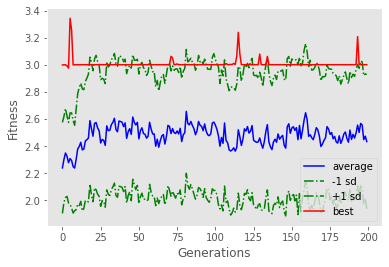

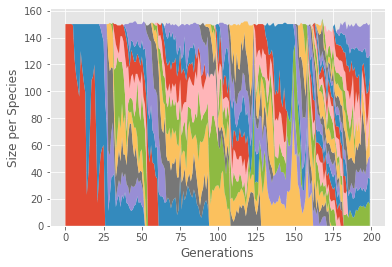

In [61]:
import os
import neat
from utils.utils_08 import visualize
from IPython.display import Image

from pylab import *

# 2-input XOR inputs and expected outputs.
inputs = [(0.0, 0.0), (0.0, 1.0), (1.0, 0.0), (1.0, 1.0)]
outputs = [   (0.0,),     (1.0,),     (1.0,),     (0.0,)]

num_generations = 200
num_runs = 1

config_files = ['config-feedforward-2input-xor-noelitism.txt',
                'config-feedforward-2input-xor-elitism.txt']

def eval_genomes(genomes, config):
    for genome_id, genome in genomes:
        genome.fitness = len(inputs)
        net = neat.nn.FeedForwardNetwork.create(genome, config)
        for xi, xo in zip(inputs, outputs):
            output = net.activate(xi)
            genome.fitness -= (output[0] - xo[0]) ** 2

    
local_dir = os.path.dirname('utils/utils_08/')

if num_runs == 1:
    # Load configuration.
    config_file = os.path.join(local_dir, config_files[0])
    config = neat.Config(neat.DefaultGenome, neat.DefaultReproduction,
                         neat.DefaultSpeciesSet, neat.DefaultStagnation,
                         config_file)

    # Create the population, which is the top-level object for a NEAT run.
    p = neat.Population(config)

    # Add a stdout reporter to show progress in the terminal.
    stats = neat.StatisticsReporter()
    p.add_reporter(neat.StdOutReporter(True))
    p.add_reporter(stats)

    # run NEAT for num_generations
    winner = p.run(eval_genomes, num_generations)

    # Display the winning genome.
    print('\nBest genome:\n{!s}'.format(winner))

    # Show output of the most fit genome against training data.
    print('\nOutput:')
    winner_net = neat.nn.FeedForwardNetwork.create(winner, config)
    for xi, xo in zip(inputs, outputs):
        output = winner_net.activate(xi)
        print("input {!r}, expected output {!r}, got {!r}".format(xi, xo, output))

    node_names = {-1:'A', -2: 'B', 0:'A XOR B'}
    
    
    visualize.plot_stats(stats, ylog=False, view=True)
    visualize.plot_species(stats, view=True)
    
    #if you want to visualize the network architecture uncomment the following line of code
    #having graphviz installed on your device is required in order to visualize the plot  
    #how to install it? see link https://graphviz.org/download/ 
    visualize.draw_net(config, winner, filename='2-input OR_200', view=True, node_names=node_names)
else:
    results = []
    for file in config_files:

        # Load configuration.
        config_file = os.path.join(local_dir, file)
        config = neat.Config(neat.DefaultGenome, neat.DefaultReproduction,
                             neat.DefaultSpeciesSet, neat.DefaultStagnation,
                             config_file)

        best_fitnesses = []
        for i in range(num_runs):
            print('{0}/{1}'.format(i+1,num_runs))
            p = neat.Population(config)
            winner = p.run(eval_genomes, num_generations)
            best_fitnesses.append(winner.fitness)
        results.append(best_fitnesses)

    fig = figure('NEAT')
    ax = fig.gca()
    ax.boxplot(results)
    ax.set_xticklabels(['Without elitism', 'With elitism'])
    #ax.set_yscale('log')
    ax.set_xlabel('Condition')
    ax.set_ylabel('Best fitness')
    show()

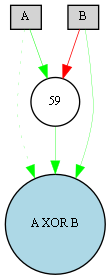

In [62]:
Image('2-input OR_200' + '.png')

#### single instance of elitism, 100 generations


 ****** Running generation 0 ****** 

Population's average fitness: 2.20876 stdev: 0.37276
Best fitness: 2.99814 - size: (1, 2) - species 1 - id 145
Average adjusted fitness: 0.558
Mean genetic distance 1.092, standard deviation 0.421
Population of 150 members in 1 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
     1    0   150      3.0    0.558     0
Total extinctions: 0
Generation time: 0.038 sec

 ****** Running generation 1 ****** 

Population's average fitness: 2.33950 stdev: 0.30891
Best fitness: 2.99814 - size: (1, 2) - species 1 - id 145
Average adjusted fitness: 0.593
Mean genetic distance 1.294, standard deviation 0.392
Population of 150 members in 1 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
     1    1   150      3.0    0.593     1
Total extinctions: 0
Generation time: 0.040 sec (0.039 average)

 ****** Running generation 2 ****** 

Population's average fitness: 2.38933 stdev: 

Mean genetic distance 1.811, standard deviation 0.611
Population of 150 members in 3 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
     1   19    92      3.0    0.755     4
     2   13    32      3.0    0.716     2
     3    8    26      3.0    0.598     3
Total extinctions: 0
Generation time: 0.062 sec (0.056 average)

 ****** Running generation 20 ****** 

Population's average fitness: 2.54245 stdev: 0.46533
Best fitness: 3.00000 - size: (4, 6) - species 1 - id 3026
Average adjusted fitness: 0.494
Mean genetic distance 1.788, standard deviation 0.622
Population of 150 members in 3 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
     1   20    95      3.0    0.626     0
     2   14    30      3.0    0.460     3
     3    9    25      3.0    0.395     4
Total extinctions: 0
Generation time: 0.080 sec (0.058 average)

 ****** Running generation 21 ****** 

Population's average fitness: 2.48943 st

Best fitness: 3.00000 - size: (3, 5) - species 4 - id 4760
Average adjusted fitness: 0.707
Mean genetic distance 2.808, standard deviation 1.149
Population of 150 members in 4 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
     1   34    42      3.0    0.709     8
     2   28    25      3.0    0.654     1
     3   23    37      3.0    0.688     1
     4    4    46      3.0    0.779     2
Total extinctions: 0
Generation time: 0.083 sec (0.074 average)

 ****** Running generation 35 ****** 

Population's average fitness: 2.48199 stdev: 0.51889
Best fitness: 3.00000 - size: (3, 5) - species 4 - id 4760
Average adjusted fitness: 0.736
Mean genetic distance 2.664, standard deviation 1.008
Population of 150 members in 4 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
     1   35    28      3.0    0.738     9
     2   29    77      3.0    0.740     0
     3   24    16      3.0    0.646     0
     4    5

Mean genetic distance 3.126, standard deviation 1.056
Population of 152 members in 10 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
     2   41    15      3.0    0.784    11
     3   36    15      3.0    0.612     4
     4   17     9      3.0    0.762    15
     5   11    18      3.0    0.772    10
     6   11    19      3.0    0.767    10
     7    9    14      3.0    0.603     1
     8    8    16      3.0    0.715     7
     9    3    13      2.0    0.452     0
    10    3    14      3.2    0.624     1
    11    2    19      2.0    0.452     0
Total extinctions: 0
Generation time: 0.203 sec (0.107 average)

 ****** Running generation 48 ****** 

Population's average fitness: 2.55299 stdev: 0.50861
Best fitness: 3.27671 - size: (2, 4) - species 10 - id 6974
Average adjusted fitness: 0.658
Mean genetic distance 3.135, standard deviation 1.102
Population of 152 members in 11 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ==

Mean genetic distance 3.170, standard deviation 1.084
Population of 150 members in 7 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
     3   46    23      3.0    0.611    14
     7   19    18      3.0    0.523     2
     8   18    21      3.0    0.569    17
     9   13    21      3.5    0.583     1
    10   13    24      3.5    0.737     0
    11   12    21      3.0    0.586     9
    12    9    22      3.0    0.547     0
Total extinctions: 0
Generation time: 0.095 sec (0.105 average)

 ****** Running generation 58 ****** 

Population's average fitness: 2.53416 stdev: 0.56387
Best fitness: 3.49905 - size: (4, 5) - species 9 - id 8007
Average adjusted fitness: 0.608
Mean genetic distance 3.165, standard deviation 1.025
Population of 149 members in 7 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
     3   47    21      3.0    0.623    15
     7   20    17      3.0    0.462     0
     8   19    23 

Mean genetic distance 2.676, standard deviation 0.865
Population of 149 members in 5 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
     7   32    27      3.0    0.565     0
     9   26    33      3.5    0.546     0
    10   26    25      3.6    0.574    11
    12   22    34      3.0    0.608     0
    13    2    30      3.0    0.461     0
Total extinctions: 0
Generation time: 0.099 sec (0.087 average)

 ****** Running generation 71 ****** 

Population's average fitness: 2.43432 stdev: 0.59383
Best fitness: 3.63163 - size: (3, 7) - species 13 - id 8403
Average adjusted fitness: 0.545
Mean genetic distance 2.568, standard deviation 0.819
Population of 150 members in 5 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
     7   33    26      3.0    0.443     0
     9   27    31      3.5    0.543     1
    10   27    27      3.5    0.615    12
    12   23    35      3.0    0.573     1
    13    3    31

Mean genetic distance 2.765, standard deviation 0.776
Population of 151 members in 4 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
     7   46    34      3.0    0.492     9
     9   40    40      3.5    0.571    14
    12   36    41      3.0    0.623     7
    13   16    36      3.6    0.504    13
Total extinctions: 0
Generation time: 0.219 sec (0.104 average)

 ****** Running generation 85 ****** 

Population's average fitness: 2.46764 stdev: 0.56138
Best fitness: 3.63163 - size: (3, 7) - species 13 - id 8403
Average adjusted fitness: 0.556
Mean genetic distance 2.843, standard deviation 0.848
Population of 149 members in 4 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
     7   47    35      3.0    0.539    10
     9   41    39      3.5    0.585    15
    12   37    40      3.0    0.573     8
    13   17    35      3.6    0.527    14
Total extinctions: 0
Generation time: 0.097 sec (0.104 aver

Mean genetic distance 3.029, standard deviation 0.913
Population of 150 members in 5 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
     9   53    37      3.5    0.297    27
    13   29    42      3.6    0.363    26
    14   11    40      3.0    0.330     7
    15    5    25      3.0    0.341     3
    16    0     6       --       --     0
Total extinctions: 0
Generation time: 0.071 sec (0.101 average)

 ****** Running generation 98 ****** 

Population's average fitness: 2.50571 stdev: 0.50878
Best fitness: 3.63163 - size: (3, 7) - species 13 - id 8403
Average adjusted fitness: 0.291
Mean genetic distance 2.959, standard deviation 0.867
Population of 150 members in 5 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
     9   54    36      3.5    0.339    28
    13   30    31      3.6    0.202    27
    14   12    38      3.0    0.483     8
    15    6    21      3.0    0.311     4
    16    1    24

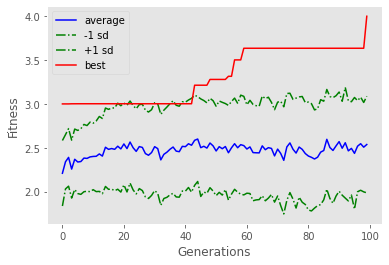

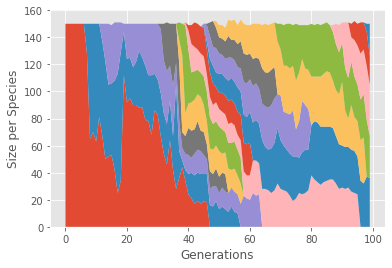

In [66]:

# 2-input XOR inputs and expected outputs.
inputs = [(0.0, 0.0), (0.0, 1.0), (1.0, 0.0), (1.0, 1.0)]
outputs = [   (0.0,),     (1.0,),     (1.0,),     (0.0,)]

num_generations = 100
num_runs = 1

config_files = ['config-feedforward-2input-xor-noelitism.txt',
                'config-feedforward-2input-xor-elitism.txt']

def eval_genomes(genomes, config):
    for genome_id, genome in genomes:
        genome.fitness = len(inputs)
        net = neat.nn.FeedForwardNetwork.create(genome, config)
        for xi, xo in zip(inputs, outputs):
            output = net.activate(xi)
            genome.fitness -= (output[0] - xo[0]) ** 2

    
local_dir = os.path.dirname('utils/utils_08/')

if num_runs == 1:
    # Load configuration.
    config_file = os.path.join(local_dir, config_files[1])
    config = neat.Config(neat.DefaultGenome, neat.DefaultReproduction,
                         neat.DefaultSpeciesSet, neat.DefaultStagnation,
                         config_file)

    # Create the population, which is the top-level object for a NEAT run.
    p = neat.Population(config)

    # Add a stdout reporter to show progress in the terminal.
    stats = neat.StatisticsReporter()
    p.add_reporter(neat.StdOutReporter(True))
    p.add_reporter(stats)

    # run NEAT for num_generations
    winner = p.run(eval_genomes, num_generations)

    # Display the winning genome.
    print('\nBest genome:\n{!s}'.format(winner))

    # Show output of the most fit genome against training data.
    print('\nOutput:')
    winner_net = neat.nn.FeedForwardNetwork.create(winner, config)
    for xi, xo in zip(inputs, outputs):
        output = winner_net.activate(xi)
        print("input {!r}, expected output {!r}, got {!r}".format(xi, xo, output))

    node_names = {-1:'A', -2: 'B', 0:'A XOR B'}
    
    
    visualize.plot_stats(stats, ylog=False, view=True)
    visualize.plot_species(stats, view=True)
    
    #if you want to visualize the network architecture uncomment the following line of code
    #having graphviz installed on your device is required in order to visualize the plot  
    #how to install it? see link https://graphviz.org/download/ 
    visualize.draw_net(config, winner, filename='2-input OR_elitism', view=True, node_names=node_names)
else:
    results = []
    for file in config_files:

        # Load configuration.
        config_file = os.path.join(local_dir, file)
        config = neat.Config(neat.DefaultGenome, neat.DefaultReproduction,
                             neat.DefaultSpeciesSet, neat.DefaultStagnation,
                             config_file)

        best_fitnesses = []
        for i in range(num_runs):
            print('{0}/{1}'.format(i+1,num_runs))
            p = neat.Population(config)
            winner = p.run(eval_genomes, num_generations)
            best_fitnesses.append(winner.fitness)
        results.append(best_fitnesses)

    fig = figure('NEAT')
    ax = fig.gca()
    ax.boxplot(results)
    ax.set_xticklabels(['Without elitism', 'With elitism'])
    #ax.set_yscale('log')
    ax.set_xlabel('Condition')
    ax.set_ylabel('Best fitness')
    show()

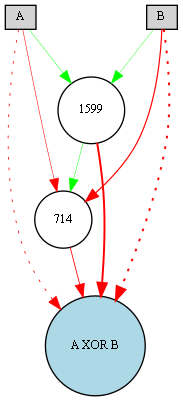

In [67]:
Image('2-input OR_elitism' + '.png')

#### no-elitism vs elitism 10 run

1/10
2/10
3/10
4/10
5/10
6/10
7/10
8/10
9/10
10/10
1/10
2/10
3/10
4/10
5/10
6/10
7/10
8/10
9/10
10/10


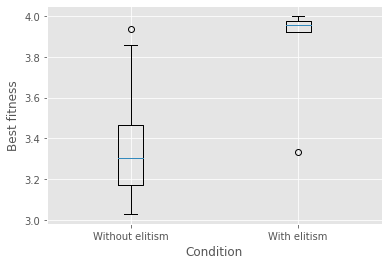

In [77]:
import os
import neat
from utils.utils_08 import visualize
from IPython.display import Image

from pylab import *

# 2-input XOR inputs and expected outputs.
inputs = [(0.0, 0.0), (0.0, 1.0), (1.0, 0.0), (1.0, 1.0)]
outputs = [   (0.0,),     (1.0,),     (1.0,),     (0.0,)]

num_generations = 100
num_runs = 10

config_files = ['config-feedforward-2input-xor-noelitism.txt',
                'config-feedforward-2input-xor-elitism.txt']

def eval_genomes(genomes, config):
    for genome_id, genome in genomes:
        genome.fitness = len(inputs)
        net = neat.nn.FeedForwardNetwork.create(genome, config)
        for xi, xo in zip(inputs, outputs):
            output = net.activate(xi)
            genome.fitness -= (output[0] - xo[0]) ** 2

    
local_dir = os.path.dirname('utils/utils_08/')

if num_runs == 1:
    # Load configuration.
    config_file = os.path.join(local_dir, config_files[0])
    config = neat.Config(neat.DefaultGenome, neat.DefaultReproduction,
                         neat.DefaultSpeciesSet, neat.DefaultStagnation,
                         config_file)

    # Create the population, which is the top-level object for a NEAT run.
    p = neat.Population(config)

    # Add a stdout reporter to show progress in the terminal.
    stats = neat.StatisticsReporter()
    p.add_reporter(neat.StdOutReporter(True))
    p.add_reporter(stats)

    # run NEAT for num_generations
    winner = p.run(eval_genomes, num_generations)

    # Display the winning genome.
    print('\nBest genome:\n{!s}'.format(winner))

    # Show output of the most fit genome against training data.
    print('\nOutput:')
    winner_net = neat.nn.FeedForwardNetwork.create(winner, config)
    for xi, xo in zip(inputs, outputs):
        output = winner_net.activate(xi)
        print("input {!r}, expected output {!r}, got {!r}".format(xi, xo, output))

    node_names = {-1:'A', -2: 'B', 0:'A XOR B'}
    
    
    visualize.plot_stats(stats, ylog=False, view=True)
    visualize.plot_species(stats, view=True)
    
    #if you want to visualize the network architecture uncomment the following line of code
    #having graphviz installed on your device is required in order to visualize the plot  
    #how to install it? see link https://graphviz.org/download/ 
    visualize.draw_net(config, winner, filename='2-input OR_200', view=True, node_names=node_names)
else:
    results = []
    for file in config_files:

        # Load configuration.
        config_file = os.path.join(local_dir, file)
        config = neat.Config(neat.DefaultGenome, neat.DefaultReproduction,
                             neat.DefaultSpeciesSet, neat.DefaultStagnation,
                             config_file)

        best_fitnesses = []
        for i in range(num_runs):
            print('{0}/{1}'.format(i+1,num_runs))
            p = neat.Population(config)
            winner = p.run(eval_genomes, num_generations)
            best_fitnesses.append(winner.fitness)
        results.append(best_fitnesses)

    fig = figure('NEAT')
    ax = fig.gca()
    ax.boxplot(results)
    ax.set_xticklabels(['Without elitism', 'With elitism'])
    #ax.set_yscale('log')
    ax.set_xlabel('Condition')
    ax.set_ylabel('Best fitness')
    show()

## Exercise 4
In this exercise we use again NEAT, this time to **solve a 3-input Boolean function described by the truth table shown in the Table below.** This function returns $1$ if and only if only one input is equal to $1$, otherwise it returns $0$.

| **Input 1** | **Input 2** | **Input 3** | **Output** |
|:-----------:|:-----------:|:-----------:|:----------:|
| 0           | 0           | 0           | 0          |
| 0           | 0           | 1           | 1          |
| 0           | 1           | 0           | 1          |
| 0           | 1           | 1           | 0          |
| 1           | 0           | 0           | 1          |
| 1           | 0           | 1           | 0          |
| 1           | 1           | 0           | 0          |
| 1           | 1           | 1           | 0          |


This script has the same structure that we have seen in the previous exercise. In this exercise two different configuration files will be used, namely:
- **``config-feedforward-3input-function-nohidden.txt``**
- **``config-feedforward-3input-function-hidden.txt``**

In this case the only difference between the two configurations (**which both use elitism**) is the number of hidden nodes to add to each genome in the initial population (**parameter ``num_hidden``**), which is **set respectively to $0$ and $3$** (also, note that **the parameter ``num_inputs`` is set to $3$ to allow the use of $3$ inputs, while in the previous exercise it was set to $2$).** Note that as **in this case the optimal fitness value is $8$** (i.e., the Neural Network output is correct in all 8 input cases), in both configuration files the parameter ``fitness_threshold`` is set to $7.9$.

- **What do you observe in this case when you execute a single run of each configuration? What is the effect of using hidden nodes in the initial population?**
- **What happens when you configure the script to execute multiple runs? Does the boxplot confirm -in statistical terms- what you observed on a single run?** (**NOTE**: it takes 1-2 minutes to execute 10 runs for both configurations.)

### 1 instance without hidden nodes, 100 generations


 ****** Running generation 0 ****** 

Population's average fitness: 4.50873 stdev: 0.98567
Best fitness: 6.69166 - size: (1, 3) - species 1 - id 148
Average adjusted fitness: 0.488
Mean genetic distance 1.648, standard deviation 0.476
Population of 150 members in 2 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
     1    0    74      6.7    0.454     0
     2    0    76      5.8    0.522     0
Total extinctions: 0
Generation time: 0.039 sec

 ****** Running generation 1 ****** 

Population's average fitness: 5.01050 stdev: 0.89261
Best fitness: 6.92046 - size: (1, 3) - species 1 - id 258
Average adjusted fitness: 0.560
Mean genetic distance 1.667, standard deviation 0.484
Population of 150 members in 2 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
     1    1    58      6.9    0.534     0
     2    1    92      6.0    0.587     0
Total extinctions: 0
Generation time: 0.063 sec (0.051 average)


Mean genetic distance 2.130, standard deviation 0.684
Population of 149 members in 3 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
     1   17    48      7.0    0.509     2
     2   17    41      6.1    0.537     1
     3   11    60      6.2    0.477     0
Total extinctions: 0
Generation time: 0.073 sec (0.061 average)

 ****** Running generation 18 ****** 

Population's average fitness: 5.07937 stdev: 0.94438
Best fitness: 6.99845 - size: (1, 3) - species 1 - id 2713
Average adjusted fitness: 0.526
Mean genetic distance 2.162, standard deviation 0.649
Population of 149 members in 3 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
     1   18    46      7.0    0.537     0
     2   18    45      6.3    0.570     0
     3   12    58      6.1    0.473     1
Total extinctions: 0
Generation time: 0.056 sec (0.062 average)

 ****** Running generation 19 ****** 

Population's average fitness: 4.87858 st

Population's average fitness: 5.24497 stdev: 0.82609
Best fitness: 7.00000 - size: (1, 3) - species 1 - id 4295
Average adjusted fitness: 0.567
Mean genetic distance 2.230, standard deviation 0.863
Population of 149 members in 4 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
     1   32    31      7.0    0.569     3
     2   32    16      6.2    0.610    14
     3   26    66      6.2    0.539    12
     4   11    36      6.5    0.550     7
Total extinctions: 0
Generation time: 0.083 sec (0.076 average)

 ****** Running generation 33 ****** 

Population's average fitness: 5.26379 stdev: 0.91997
Best fitness: 7.00000 - size: (1, 3) - species 1 - id 4295
Average adjusted fitness: 0.564
Mean genetic distance 2.226, standard deviation 0.905
Population of 150 members in 4 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
     1   33    35      7.0    0.638     4
     2   33    19      6.2    0.507    15


  ====  ===  ====  =======  =======  ====
     1   48    66      7.0    0.557     1
     4   27    84      6.9    0.582     5
Total extinctions: 0
Generation time: 0.074 sec (0.073 average)

 ****** Running generation 49 ****** 

Population's average fitness: 5.33138 stdev: 0.90674
Best fitness: 7.00000 - size: (2, 4) - species 1 - id 6890
Average adjusted fitness: 0.584
Mean genetic distance 2.209, standard deviation 0.798
Population of 150 members in 2 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
     1   49    62      7.0    0.593     2
     4   28    88      6.9    0.575     6
Total extinctions: 0
Generation time: 0.078 sec (0.072 average)

 ****** Running generation 50 ****** 

Population's average fitness: 5.24033 stdev: 0.98323
Best fitness: 7.00000 - size: (2, 4) - species 1 - id 6890
Average adjusted fitness: 0.555
Mean genetic distance 2.141, standard deviation 0.889
Population of 150 members in 2 species:
   ID   age  size  fit

Mean genetic distance 2.068, standard deviation 0.880
Population of 150 members in 2 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
     1   65    65      7.0    0.487     2
     4   44    85      6.9    0.556    22
Total extinctions: 0
Generation time: 0.205 sec (0.085 average)

 ****** Running generation 66 ****** 

Population's average fitness: 5.23343 stdev: 0.92417
Best fitness: 7.00000 - size: (1, 3) - species 1 - id 9212
Average adjusted fitness: 0.559
Mean genetic distance 2.127, standard deviation 0.848
Population of 150 members in 2 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
     1   66    61      7.0    0.563     3
     4   45    89      6.9    0.555     0
Total extinctions: 0
Generation time: 0.091 sec (0.088 average)

 ****** Running generation 67 ****** 

Population's average fitness: 5.23007 stdev: 1.06360
Best fitness: 7.00000 - size: (1, 3) - species 1 - id 9212
Average adju

Mean genetic distance 2.199, standard deviation 0.917
Population of 150 members in 3 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
     1   81    47      7.0    0.504     4
     4   60    19      7.1    0.552     1
     5    3    84      7.0    0.397     2
Total extinctions: 0
Generation time: 0.107 sec (0.090 average)

 ****** Running generation 82 ****** 

Population's average fitness: 5.29516 stdev: 1.10275
Best fitness: 7.16877 - size: (4, 9) - species 5 - id 12005
Average adjusted fitness: 0.546
Mean genetic distance 2.184, standard deviation 0.928
Population of 150 members in 3 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
     1   82    46      7.0    0.630     5
     4   61    40      6.3    0.488     2
     5    4    64      7.2    0.520     0
Total extinctions: 0
Generation time: 0.097 sec (0.093 average)

 ****** Running generation 83 ****** 

Population's average fitness: 5.13819 s

Population's average fitness: 5.29541 stdev: 1.07218
Best fitness: 7.17500 - size: (4, 8) - species 5 - id 13573
Average adjusted fitness: 0.582
Mean genetic distance 2.580, standard deviation 1.314
Population of 150 members in 3 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
     1   97    43      7.0    0.630    11
     4   76    46      6.5    0.595    17
     5   19    61      7.2    0.520     4
Total extinctions: 0
Generation time: 0.063 sec (0.086 average)

 ****** Running generation 98 ****** 

Population's average fitness: 5.34033 stdev: 1.02841
Best fitness: 7.17500 - size: (4, 8) - species 5 - id 13573
Average adjusted fitness: 0.565
Mean genetic distance 2.412, standard deviation 1.119
Population of 150 members in 3 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
     1   98    39      7.0    0.601     0
     4   77    49      6.5    0.560    18
     5   20    62      7.2    0.532     

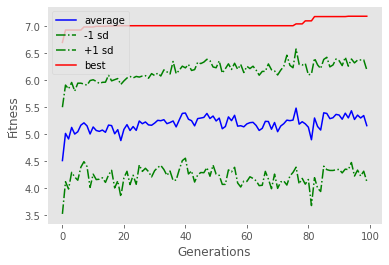

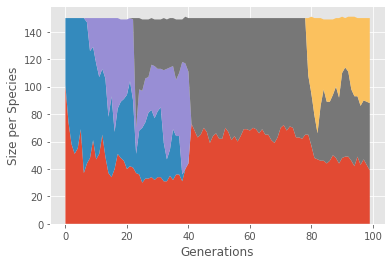

In [78]:
"""
3-input Boolean function
"""

from __future__ import print_function
import os
import neat
from utils.utils_08 import visualize

from pylab import *

# 3-input Boolean function inputs and expected outputs.
inputs = [(0.0, 0.0, 0.0),
          (0.0, 0.0, 1.0),
          (0.0, 1.0, 0.0),
          (0.0, 1.0, 1.0),
          (1.0, 0.0, 0.0),
          (1.0, 0.0, 1.0),
          (1.0, 1.0, 0.0),
          (1.0, 1.0, 1.0)]
outputs = [(0.0,),(1.0,),(1.0,),(0.0,),(1.0,),(0.0,),(0.0,),(0.0,)]

num_generations = 100
num_runs = 1 #2

config_files = ['config-feedforward-3input-function-nohidden.txt',
                'config-feedforward-3input-function-hidden.txt']

def eval_genomes(genomes, config):
    for genome_id, genome in genomes:
        genome.fitness = len(inputs)
        net = neat.nn.FeedForwardNetwork.create(genome, config)
        for xi, xo in zip(inputs, outputs):
            output = net.activate(xi)
            genome.fitness -= (output[0] - xo[0]) ** 2


    
local_dir = os.path.dirname('utils/utils_08/')

if num_runs == 1:

    # Load configuration.
    config_file = os.path.join(local_dir, config_files[0])
    config = neat.Config(neat.DefaultGenome, neat.DefaultReproduction,
                         neat.DefaultSpeciesSet, neat.DefaultStagnation,
                         config_file)

    # Create the population, which is the top-level object for a NEAT run.
    p = neat.Population(config)

    # Add a stdout reporter to show progress in the terminal.
    stats = neat.StatisticsReporter()
    p.add_reporter(neat.StdOutReporter(True))
    p.add_reporter(stats)

    # run NEAT for num_generations
    winner = p.run(eval_genomes, num_generations)

    # Display the winning genome.
    print('\nBest genome:\n{!s}'.format(winner))

    # Show output of the most fit genome against training data.
    print('\nOutput:')
    winner_net = neat.nn.FeedForwardNetwork.create(winner, config)
    for xi, xo in zip(inputs, outputs):
        output = winner_net.activate(xi)
        print("input {!r}, expected output {!r}, got {!r}".format(xi, xo, output))

    node_names = {-1:'A', -2: 'B', -3: 'C', 0:'f(A,B,C)'}
    
    #if you want to visualize the network architecture uncomment the following line of code
    #having graphviz installed on your device is required in order to visualize the plot  
    #how to install it? see link https://graphviz.org/download/ 
    visualize.draw_net(config, winner, filename='3-input Bool function_no_hidden_100', view=True, node_names=node_names)
    
    visualize.plot_stats(stats, ylog=False, view=True)
    visualize.plot_species(stats, view=True)

else:

    results = []
    for file in config_files:

        # Load configuration.
        config_file = os.path.join(local_dir, file)
        config = neat.Config(neat.DefaultGenome, neat.DefaultReproduction,
                             neat.DefaultSpeciesSet, neat.DefaultStagnation,
                             config_file)

        best_fitnesses = []
        for i in range(num_runs):
            print('{0}/{1}'.format(i+1,num_runs))
            p = neat.Population(config)
            winner = p.run(eval_genomes, num_generations)
            best_fitnesses.append(winner.fitness)
        results.append(best_fitnesses)

    fig = figure('NEAT')
    ax = fig.gca()
    ax.boxplot(results)
    ax.set_xticklabels(['Without hidden nodes', 'With hidden nodes'])
    #ax.set_yscale('log')
    ax.set_xlabel('Condition')
    ax.set_ylabel('Best fitness')
    show()

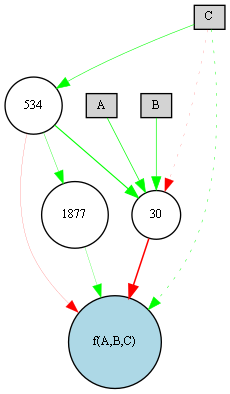

In [80]:
Image('3-input Bool function_no_hidden_100' + '.png')

### 1 instance without hidden nodes, 200 generations


 ****** Running generation 0 ****** 

Population's average fitness: 4.41592 stdev: 1.01190
Best fitness: 6.61774 - size: (1, 3) - species 1 - id 91
Average adjusted fitness: 0.417
Mean genetic distance 1.645, standard deviation 0.468
Population of 150 members in 2 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
     1    0   145      6.6    0.417     0
     2    0     5       --       --     0
Total extinctions: 0
Generation time: 0.073 sec

 ****** Running generation 1 ****** 

Population's average fitness: 5.06158 stdev: 0.79860
Best fitness: 6.75512 - size: (1, 3) - species 2 - id 293
Average adjusted fitness: 0.610
Mean genetic distance 1.778, standard deviation 0.532
Population of 150 members in 2 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
     1    1    54      6.6    0.544     1
     2    1    96      6.8    0.676     0
Total extinctions: 0
Generation time: 0.063 sec (0.068 average)



Population's average fitness: 4.97939 stdev: 0.90375
Best fitness: 6.98442 - size: (1, 3) - species 2 - id 1597
Average adjusted fitness: 0.495
Mean genetic distance 1.924, standard deviation 0.615
Population of 149 members in 3 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
     1   16    44      6.2    0.513    16
     2   16    43      7.0    0.488     6
     3    6    62      5.9    0.485     2
Total extinctions: 0
Generation time: 0.089 sec (0.081 average)

 ****** Running generation 17 ****** 

Population's average fitness: 5.08567 stdev: 0.84877
Best fitness: 6.99839 - size: (3, 6) - species 2 - id 2600
Average adjusted fitness: 0.518
Mean genetic distance 1.982, standard deviation 0.578
Population of 150 members in 4 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
     1   17    12      6.2    0.509    17
     2   17    35      7.0    0.501     0
     3    7    91      6.2    0.545     0


Mean genetic distance 2.245, standard deviation 0.584
Population of 149 members in 5 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
     1   32    11      6.2    0.290     4
     2   32    44      6.0    0.529    15
     3   22    45      6.2    0.563    10
     4   15    17      6.1    0.550     5
     5    4    32      7.0    0.713     1
Total extinctions: 0
Generation time: 0.115 sec (0.125 average)

 ****** Running generation 33 ****** 

Population's average fitness: 5.18198 stdev: 0.92351
Best fitness: 6.99998 - size: (3, 6) - species 5 - id 4852
Average adjusted fitness: 0.501
Mean genetic distance 2.246, standard deviation 0.575
Population of 150 members in 5 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
     1   33    23      5.1    0.202     5
     2   33    27      6.2    0.528    16
     3   23    48      6.2    0.520    11
     4   16    17      6.0    0.524     6
     5    5    35 

Population's average fitness: 5.14593 stdev: 1.08870
Best fitness: 7.00000 - size: (2, 4) - species 5 - id 7017

Species 1 with 72 members is stagnated: removing it
Average adjusted fitness: 0.484
Mean genetic distance 2.204, standard deviation 1.048
Population of 150 members in 2 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
     3   38    64      6.6    0.409     6
     5   20    86      7.0    0.559     0
Total extinctions: 0
Generation time: 0.072 sec (0.109 average)

 ****** Running generation 49 ****** 

Population's average fitness: 5.40860 stdev: 1.24480
Best fitness: 7.00000 - size: (2, 4) - species 5 - id 7130
Average adjusted fitness: 0.591
Mean genetic distance 2.176, standard deviation 0.992
Population of 150 members in 2 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
     3   39    72      6.9    0.516     0
     5   21    78      7.0    0.667     0
Total extinctions: 0
Generation

Population's average fitness: 5.46097 stdev: 1.07840
Best fitness: 7.00000 - size: (4, 5) - species 5 - id 8022
Average adjusted fitness: 0.608
Mean genetic distance 2.389, standard deviation 0.678
Population of 149 members in 3 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
     3   55    62      7.0    0.528     3
     5   37    52      7.0    0.760    10
     6   12    35      6.2    0.537     1
Total extinctions: 0
Generation time: 0.082 sec (0.079 average)

 ****** Running generation 66 ****** 

Population's average fitness: 5.32701 stdev: 1.13132
Best fitness: 7.00000 - size: (4, 5) - species 5 - id 8022
Average adjusted fitness: 0.579
Mean genetic distance 2.684, standard deviation 0.710
Population of 149 members in 4 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
     3   56     5      7.0    0.502     4
     5   38    49      7.0    0.727    11
     6   13    74      6.2    0.507     2


Mean genetic distance 3.136, standard deviation 1.038
Population of 150 members in 7 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
     3   69    20      6.2    0.535    17
     5   51    19      7.0    0.689     5
     6   26    21      6.2    0.598    15
     7   13    22      7.0    0.626     1
     8    8    21      7.0    0.677     6
     9    8    23      6.0    0.606     7
    10    6    24      6.2    0.549     0
Total extinctions: 0
Generation time: 0.138 sec (0.140 average)

 ****** Running generation 80 ****** 

Population's average fitness: 5.54304 stdev: 1.18828
Best fitness: 7.00000 - size: (4, 7) - species 5 - id 11551
Average adjusted fitness: 0.639
Mean genetic distance 3.180, standard deviation 1.062
Population of 151 members in 7 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
     3   70    19      6.2    0.564    18
     5   52    18      7.0    0.716     0
     6   27    18

Mean genetic distance 3.045, standard deviation 1.100
Population of 150 members in 6 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
     5   64    28      7.0    0.724     1
     7   26    23      7.0    0.706     3
     8   21    29      7.0    0.695     0
    10   19    24      6.2    0.405     1
    11    6    27      6.2    0.508     2
    12    3    19      5.1    0.501     0
Total extinctions: 0
Generation time: 0.114 sec (0.137 average)

 ****** Running generation 93 ****** 

Population's average fitness: 5.37706 stdev: 1.19895
Best fitness: 7.00000 - size: (4, 7) - species 8 - id 13177
Average adjusted fitness: 0.587
Mean genetic distance 3.129, standard deviation 1.125
Population of 152 members in 6 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
     5   65    29      7.0    0.661     0
     7   27    26      7.0    0.720     0
     8   22    27      7.0    0.690     1
    10   20    23

Mean genetic distance 3.122, standard deviation 1.221
Population of 151 members in 6 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
     5   77    23      7.0    0.718     7
     7   39    34      7.0    0.714     6
     8   34    19      7.0    0.675     0
    10   32    26      6.2    0.467    14
    11   19    25      6.2    0.585    15
    12   16    24      6.2    0.635     2
Total extinctions: 0
Generation time: 0.145 sec (0.113 average)

 ****** Running generation 106 ****** 

Population's average fitness: 5.43887 stdev: 1.11601
Best fitness: 7.00000 - size: (4, 5) - species 7 - id 14979
Average adjusted fitness: 0.599
Mean genetic distance 3.069, standard deviation 1.195
Population of 149 members in 6 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
     5   78    25      7.0    0.652     8
     7   40    26      7.0    0.794     7
     8   35    24      7.0    0.610     1
    10   33    2

Population's average fitness: 5.62072 stdev: 0.94306
Best fitness: 7.00000 - size: (3, 4) - species 7 - id 16480
Average adjusted fitness: 0.658
Mean genetic distance 3.130, standard deviation 1.185
Population of 153 members in 8 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
     5   89    20      7.0    0.747    19
     7   51    14      7.0    0.711    18
     8   46    26      7.0    0.685    12
    12   28    22      6.2    0.615    14
    13    8    17      7.0    0.739     6
    14    6    31      6.0    0.557     0
    15    3    20      6.0    0.553     2
    16    0     3       --       --     0
Total extinctions: 0
Generation time: 0.156 sec (0.161 average)

 ****** Running generation 118 ****** 

Population's average fitness: 5.44408 stdev: 1.03999
Best fitness: 7.00000 - size: (3, 4) - species 7 - id 16480
Average adjusted fitness: 0.602
Mean genetic distance 3.187, standard deviation 1.174
Population of 151 members in 8 specie

Average adjusted fitness: 0.616
Mean genetic distance 3.388, standard deviation 1.147
Population of 150 members in 9 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
     5  100    20      7.0    0.647    30
     8   57    20      7.0    0.744    23
    13   19    23      7.0    0.667     4
    14   17     4      6.0    0.632     0
    15   14    12      6.0    0.686    13
    16   11    18      6.2    0.566     0
    17    5    22      6.0    0.583     3
    18    2    26      6.0    0.542     0
    19    2     5      5.0    0.472     0
Total extinctions: 0
Generation time: 0.136 sec (0.133 average)

 ****** Running generation 129 ****** 

Population's average fitness: 5.56465 stdev: 0.91668
Best fitness: 7.00000 - size: (5, 11) - species 13 - id 17995
Average adjusted fitness: 0.624
Mean genetic distance 3.354, standard deviation 1.122
Population of 151 members in 9 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =====

Mean genetic distance 3.438, standard deviation 1.321
Population of 151 members in 11 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
     5  110    14      7.0    0.727    40
     8   67    10      7.0    0.769    33
    13   29    31      7.0    0.853    14
    14   27    27      6.0    0.534     6
    15   24     7      6.2    0.608     0
    16   21    17      6.2    0.607     3
    17   15    10      6.0    0.564     2
    18   12    15      6.0    0.647     0
    19   12     7      7.0    0.747     3
    20    7     3      3.0    0.000     2
    21    1    10      5.5    0.634     0
Total extinctions: 0
Generation time: 0.160 sec (0.129 average)

 ****** Running generation 139 ****** 

Population's average fitness: 5.38884 stdev: 1.05541
Best fitness: 7.00000 - size: (6, 13) - species 13 - id 19573
Average adjusted fitness: 0.542
Mean genetic distance 3.471, standard deviation 1.343
Population of 150 members in 11 species:
   ID   age 

Mean genetic distance 3.410, standard deviation 1.203
Population of 150 members in 13 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
     5  120    12      7.0    0.837    50
     8   77    14      7.0    0.810    43
    14   37     9      6.1    0.505     9
    15   34    15      5.9    0.525     7
    16   31    13      6.2    0.574     1
    17   25    11      5.0    0.500     3
    18   22    11      6.0    0.682     0
    19   22    13      7.0    0.688    13
    20   17    11      7.0    0.800     6
    21   11    11      6.0    0.515     3
    22    7     2      3.0    0.000     4
    23    5    13      6.2    0.622     4
    24    5    15      6.0    0.658     2
Total extinctions: 0
Generation time: 0.141 sec (0.134 average)

 ****** Running generation 149 ****** 

Population's average fitness: 5.41132 stdev: 1.01739
Best fitness: 7.00000 - size: (2, 4) - species 20 - id 19088
Average adjusted fitness: 0.558
Mean genetic distance 3.

Mean genetic distance 3.440, standard deviation 1.209
Population of 152 members in 12 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
     5  130    13      7.0    0.642    60
     8   87    15      7.0    0.769    53
    14   47    11      6.1    0.454    19
    15   44    13      6.2    0.592    17
    16   41    18      6.2    0.490    11
    17   35    10      6.0    0.534    13
    18   32    15      6.0    0.642     9
    20   27    12      7.0    0.616    16
    21   21    13      6.1    0.562     3
    22   17     7      5.0    0.313     0
    23   15    13      6.2    0.674     0
    24   15    12      6.0    0.519     2
Total extinctions: 0
Generation time: 0.141 sec (0.142 average)

 ****** Running generation 159 ****** 

Population's average fitness: 5.26951 stdev: 1.10751
Best fitness: 7.00000 - size: (2, 4) - species 20 - id 19088

Species 14 with 11 members is stagnated: removing it
Average adjusted fitness: 0.561
Mean genetic

Mean genetic distance 3.506, standard deviation 1.298
Population of 151 members in 10 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
     5  140    19      7.0    0.662    70
     8   97    16      7.0    0.648    63
    17   45    13      6.3    0.506     0
    18   42    16      6.0    0.618    19
    21   31    13      6.1    0.488     8
    22   27    10      7.0    0.646     8
    23   25    19      6.2    0.630     0
    24   25    15      6.0    0.568     0
    25    9    12      5.0    0.389     0
    26    5    18      6.0    0.592     1
Total extinctions: 0
Generation time: 0.098 sec (0.111 average)

 ****** Running generation 169 ****** 

Population's average fitness: 5.38307 stdev: 0.94027
Best fitness: 7.00000 - size: (2, 4) - species 22 - id 22231

Species 18 with 16 members is stagnated: removing it
Average adjusted fitness: 0.589
Mean genetic distance 3.438, standard deviation 1.192
Population of 150 members in 9 species:
  

Mean genetic distance 3.544, standard deviation 1.084
Population of 150 members in 13 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
     5  150    15      7.0    0.727    80
     8  107    13      7.0    0.500    73
    17   55    15      6.3    0.671     0
    21   41    13      6.2    0.531     8
    22   37    10      7.0    0.750    18
    23   35    13      6.2    0.588     9
    24   35    13      6.0    0.587     1
    25   19     2      5.3    0.347     1
    26   15    13      6.2    0.517     6
    27    7    14      5.0    0.400     0
    28    7    16      6.2    0.577     1
    29    6     2      3.0    0.000     1
    30    1    11      5.0    0.333     0
Total extinctions: 0
Generation time: 0.135 sec (0.134 average)

 ****** Running generation 179 ****** 

Population's average fitness: 5.27960 stdev: 1.01981
Best fitness: 7.00000 - size: (2, 4) - species 22 - id 22231
Average adjusted fitness: 0.530
Mean genetic distance 3.

Population's average fitness: 5.16771 stdev: 1.13588
Best fitness: 7.00000 - size: (1, 3) - species 27 - id 24807

Species 23 with 12 members is stagnated: removing it
Average adjusted fitness: 0.516
Mean genetic distance 3.440, standard deviation 1.047
Population of 146 members in 13 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
     5  161    13      7.0    0.590    91
     8  118    13      7.0    0.634    84
    17   66    14      6.3    0.550     2
    21   52    12      6.2    0.525    19
    24   46    12      6.0    0.519     3
    25   30     8      5.8    0.287     4
    26   26    13      6.3    0.529     2
    27   18    14      7.0    0.778    10
    28   18    13      6.2    0.552     1
    29   17     7      5.5    0.268     0
    30   12    14      6.0    0.564     3
    31    8    10      6.0    0.400     0
    32    0     3       --       --     0
Total extinctions: 0
Generation time: 0.238 sec (0.139 average)

 ****** Ru

Mean genetic distance 3.354, standard deviation 1.371
Population of 147 members in 14 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
     5  170    11      7.0    0.637   100
     8  127    10      7.0    0.833    93
    17   75    10      6.3    0.576    11
    24   55    13      6.0    0.708     6
    25   39     9      5.8    0.526    13
    26   35    11      6.4    0.581     6
    27   27    13      7.0    0.750    19
    28   27    13      5.7    0.496    10
    29   26     5      5.5    0.288     9
    30   21    12      6.1    0.609     0
    31   17     7      6.1    0.419     3
    32    9    11      5.9    0.560     1
    33    5     6      5.7    0.547     0
    34    2    16      6.2    0.591     1
Total extinctions: 0
Generation time: 0.110 sec (0.142 average)

 ****** Running generation 199 ****** 

Population's average fitness: 5.23105 stdev: 1.05994
Best fitness: 7.00000 - size: (1, 3) - species 27 - id 24807

Species 27 wi

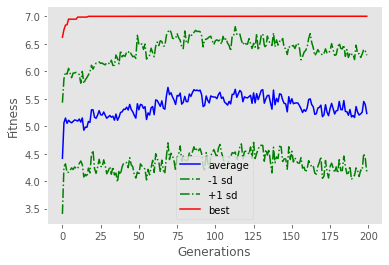

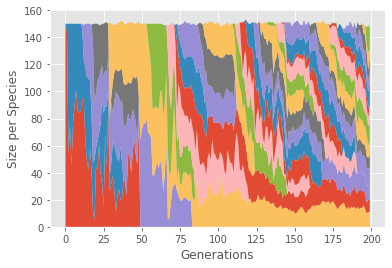

In [83]:
"""
3-input Boolean function
"""

from __future__ import print_function
import os
import neat
from utils.utils_08 import visualize

from pylab import *

# 3-input Boolean function inputs and expected outputs.
inputs = [(0.0, 0.0, 0.0),
          (0.0, 0.0, 1.0),
          (0.0, 1.0, 0.0),
          (0.0, 1.0, 1.0),
          (1.0, 0.0, 0.0),
          (1.0, 0.0, 1.0),
          (1.0, 1.0, 0.0),
          (1.0, 1.0, 1.0)]
outputs = [(0.0,),(1.0,),(1.0,),(0.0,),(1.0,),(0.0,),(0.0,),(0.0,)]

num_generations = 200
num_runs = 1 #2

config_files = ['config-feedforward-3input-function-nohidden.txt',
                'config-feedforward-3input-function-hidden.txt']

def eval_genomes(genomes, config):
    for genome_id, genome in genomes:
        genome.fitness = len(inputs)
        net = neat.nn.FeedForwardNetwork.create(genome, config)
        for xi, xo in zip(inputs, outputs):
            output = net.activate(xi)
            genome.fitness -= (output[0] - xo[0]) ** 2


    
local_dir = os.path.dirname('utils/utils_08/')

if num_runs == 1:

    # Load configuration.
    config_file = os.path.join(local_dir, config_files[0])
    config = neat.Config(neat.DefaultGenome, neat.DefaultReproduction,
                         neat.DefaultSpeciesSet, neat.DefaultStagnation,
                         config_file)

    # Create the population, which is the top-level object for a NEAT run.
    p = neat.Population(config)

    # Add a stdout reporter to show progress in the terminal.
    stats = neat.StatisticsReporter()
    p.add_reporter(neat.StdOutReporter(True))
    p.add_reporter(stats)

    # run NEAT for num_generations
    winner = p.run(eval_genomes, num_generations)

    # Display the winning genome.
    print('\nBest genome:\n{!s}'.format(winner))

    # Show output of the most fit genome against training data.
    print('\nOutput:')
    winner_net = neat.nn.FeedForwardNetwork.create(winner, config)
    for xi, xo in zip(inputs, outputs):
        output = winner_net.activate(xi)
        print("input {!r}, expected output {!r}, got {!r}".format(xi, xo, output))

    node_names = {-1:'A', -2: 'B', -3: 'C', 0:'f(A,B,C)'}
    
    #if you want to visualize the network architecture uncomment the following line of code
    #having graphviz installed on your device is required in order to visualize the plot  
    #how to install it? see link https://graphviz.org/download/ 
    visualize.draw_net(config, winner, filename='3-input Bool function_no_hidden_200', view=True, node_names=node_names)
    
    visualize.plot_stats(stats, ylog=False, view=True)
    visualize.plot_species(stats, view=True)

else:

    results = []
    for file in config_files:

        # Load configuration.
        config_file = os.path.join(local_dir, file)
        config = neat.Config(neat.DefaultGenome, neat.DefaultReproduction,
                             neat.DefaultSpeciesSet, neat.DefaultStagnation,
                             config_file)

        best_fitnesses = []
        for i in range(num_runs):
            print('{0}/{1}'.format(i+1,num_runs))
            p = neat.Population(config)
            winner = p.run(eval_genomes, num_generations)
            best_fitnesses.append(winner.fitness)
        results.append(best_fitnesses)

    fig = figure('NEAT')
    ax = fig.gca()
    ax.boxplot(results)
    ax.set_xticklabels(['Without hidden nodes', 'With hidden nodes'])
    #ax.set_yscale('log')
    ax.set_xlabel('Condition')
    ax.set_ylabel('Best fitness')
    show()

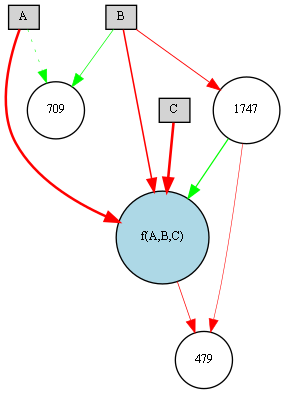

In [84]:
Image('3-input Bool function_no_hidden_200' + '.png')

### 1 instance with hidden nodes, 100 generations


 ****** Running generation 0 ****** 

Population's average fitness: 4.31834 stdev: 1.11950
Best fitness: 6.36760 - size: (4, 12) - species 118 - id 118
Average adjusted fitness: 0.513
Mean genetic distance 3.516, standard deviation 0.331
Population of 300 members in 150 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
     1    0     2      4.6    0.585     0
     2    0     2      5.1    0.706     0
     3    0     2      5.4    0.777     0
     4    0     2      4.3    0.516     0
     5    0     2      5.0    0.675     0
     6    0     2      3.5    0.312     0
     7    0     2      5.5    0.783     0
     8    0     2      4.6    0.570     0
     9    0     2      5.8    0.858     0
    10    0     2      5.0    0.678     0
    11    0     2      5.5    0.802     0
    12    0     2      2.9    0.170     0
    13    0     2      5.0    0.675     0
    14    0     2      3.0    0.200     0
    15    0     2      3.1    0.212     0
    1

Mean genetic distance 3.516, standard deviation 0.331
Population of 300 members in 150 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
     1    2     2      5.4    0.676     1
     2    2     2      5.2    0.712     1
     3    2     2      5.4    0.586     2
     4    2     2      6.0    0.716     1
     5    2     2      5.0    0.674     1
     6    2     2      3.5    0.220     2
     7    2     2      5.5    0.617     2
     8    2     2      5.5    0.678     1
     9    2     2      5.8    0.765     2
    10    2     2      5.0    0.443     2
    11    2     2      5.7    0.826     1
    12    2     2      3.2    0.206     1
    13    2     2      5.0    0.674     1
    14    2     2      3.0    0.200     2
    15    2     2      3.4    0.258     1
    16    2     2      5.0    0.675     1
    17    2     2      4.1    0.356     2
    18    2     2      5.0    0.674     2
    19    2     2      6.2    0.817     1
    20    2     2     

Mean genetic distance 3.516, standard deviation 0.331
Population of 300 members in 150 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
     1    4     2      5.4    0.676     3
     2    4     2      5.2    0.712     3
     3    4     2      5.4    0.586     4
     4    4     2      6.0    0.716     3
     5    4     2      5.0    0.674     3
     6    4     2      3.5    0.220     4
     7    4     2      5.5    0.617     4
     8    4     2      5.5    0.678     3
     9    4     2      5.8    0.765     4
    10    4     2      5.0    0.443     4
    11    4     2      5.7    0.826     3
    12    4     2      3.2    0.206     3
    13    4     2      5.0    0.674     3
    14    4     2      3.0    0.200     4
    15    4     2      3.4    0.258     3
    16    4     2      5.0    0.675     3
    17    4     2      4.1    0.356     4
    18    4     2      5.0    0.674     4
    19    4     2      6.2    0.817     3
    20    4     2     

Mean genetic distance 3.516, standard deviation 0.331
Population of 300 members in 150 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
     1    6     2      5.4    0.676     5
     2    6     2      5.2    0.712     5
     3    6     2      5.4    0.586     6
     4    6     2      6.0    0.716     5
     5    6     2      5.0    0.674     5
     6    6     2      3.5    0.220     6
     7    6     2      5.5    0.617     6
     8    6     2      5.5    0.678     5
     9    6     2      5.8    0.765     6
    10    6     2      5.0    0.443     6
    11    6     2      5.7    0.826     5
    12    6     2      3.2    0.206     5
    13    6     2      5.0    0.674     5
    14    6     2      3.0    0.200     6
    15    6     2      3.4    0.258     5
    16    6     2      5.0    0.675     5
    17    6     2      4.1    0.356     6
    18    6     2      5.0    0.674     6
    19    6     2      6.2    0.817     5
    20    6     2     

Mean genetic distance 3.516, standard deviation 0.331
Population of 300 members in 150 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
     1    8     2      5.4    0.676     7
     2    8     2      5.2    0.712     7
     3    8     2      5.4    0.586     8
     4    8     2      6.0    0.716     7
     5    8     2      5.0    0.674     7
     6    8     2      3.5    0.220     8
     7    8     2      5.5    0.617     8
     8    8     2      5.5    0.678     7
     9    8     2      5.8    0.765     8
    10    8     2      5.0    0.443     8
    11    8     2      5.7    0.826     7
    12    8     2      3.2    0.206     7
    13    8     2      5.0    0.674     7
    14    8     2      3.0    0.200     8
    15    8     2      3.4    0.258     7
    16    8     2      5.0    0.675     7
    17    8     2      4.1    0.356     8
    18    8     2      5.0    0.674     8
    19    8     2      6.2    0.817     7
    20    8     2     

Mean genetic distance 3.516, standard deviation 0.331
Population of 300 members in 150 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
     1   10     2      5.4    0.676     9
     2   10     2      5.2    0.712     9
     3   10     2      5.4    0.586    10
     4   10     2      6.0    0.716     9
     5   10     2      5.0    0.674     9
     6   10     2      3.5    0.220    10
     7   10     2      5.5    0.617    10
     8   10     2      5.5    0.678     9
     9   10     2      5.8    0.765    10
    10   10     2      5.0    0.443    10
    11   10     2      5.7    0.826     9
    12   10     2      3.2    0.206     9
    13   10     2      5.0    0.674     9
    14   10     2      3.0    0.200    10
    15   10     2      3.4    0.258     9
    16   10     2      5.0    0.675     9
    17   10     2      4.1    0.356    10
    18   10     2      5.0    0.674    10
    19   10     2      6.2    0.817     9
    20   10     2     

Mean genetic distance 3.516, standard deviation 0.331
Population of 300 members in 150 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
     1   12     2      5.4    0.676    11
     2   12     2      5.2    0.712    11
     3   12     2      5.4    0.586    12
     4   12     2      6.0    0.716    11
     5   12     2      5.0    0.674    11
     6   12     2      3.5    0.220    12
     7   12     2      5.5    0.617    12
     8   12     2      5.5    0.678    11
     9   12     2      5.8    0.765    12
    10   12     2      5.0    0.443    12
    11   12     2      5.7    0.826    11
    12   12     2      3.2    0.206    11
    13   12     2      5.0    0.674    11
    14   12     2      3.0    0.200    12
    15   12     2      3.4    0.258    11
    16   12     2      5.0    0.675    11
    17   12     2      4.1    0.356    12
    18   12     2      5.0    0.674    12
    19   12     2      6.2    0.817    11
    20   12     2     

Mean genetic distance 3.516, standard deviation 0.331
Population of 300 members in 150 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
     1   14     2      5.4    0.676    13
     2   14     2      5.2    0.712    13
     3   14     2      5.4    0.586    14
     4   14     2      6.0    0.716    13
     5   14     2      5.0    0.674    13
     6   14     2      3.5    0.220    14
     7   14     2      5.5    0.617    14
     8   14     2      5.5    0.678    13
     9   14     2      5.8    0.765    14
    10   14     2      5.0    0.443    14
    11   14     2      5.7    0.826    13
    12   14     2      3.2    0.206    13
    13   14     2      5.0    0.674    13
    14   14     2      3.0    0.200    14
    15   14     2      3.4    0.258    13
    16   14     2      5.0    0.675    13
    17   14     2      4.1    0.356    14
    18   14     2      5.0    0.674    14
    19   14     2      6.2    0.817    13
    20   14     2     

Mean genetic distance 3.516, standard deviation 0.331
Population of 300 members in 150 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
     1   16     2      5.4    0.676    15
     2   16     2      5.2    0.712    15
     3   16     2      5.4    0.586    16
     4   16     2      6.0    0.716    15
     5   16     2      5.0    0.674    15
     6   16     2      3.5    0.220    16
     7   16     2      5.5    0.617    16
     8   16     2      5.5    0.678    15
     9   16     2      5.8    0.765    16
    10   16     2      5.0    0.443    16
    11   16     2      5.7    0.826    15
    12   16     2      3.2    0.206    15
    13   16     2      5.0    0.674    15
    14   16     2      3.0    0.200    16
    15   16     2      3.4    0.258    15
    16   16     2      5.0    0.675    15
    17   16     2      4.1    0.356    16
    18   16     2      5.0    0.674    16
    19   16     2      6.2    0.817    15
    20   16     2     

Mean genetic distance 3.516, standard deviation 0.331
Population of 300 members in 150 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
     1   18     2      5.4    0.676    17
     2   18     2      5.2    0.712    17
     3   18     2      5.4    0.586    18
     4   18     2      6.0    0.716    17
     5   18     2      5.0    0.674    17
     6   18     2      3.5    0.220    18
     7   18     2      5.5    0.617    18
     8   18     2      5.5    0.678    17
     9   18     2      5.8    0.765    18
    10   18     2      5.0    0.443    18
    11   18     2      5.7    0.826    17
    12   18     2      3.2    0.206    17
    13   18     2      5.0    0.674    17
    14   18     2      3.0    0.200    18
    15   18     2      3.4    0.258    17
    16   18     2      5.0    0.675    17
    17   18     2      4.1    0.356    18
    18   18     2      5.0    0.674    18
    19   18     2      6.2    0.817    17
    20   18     2     

Mean genetic distance 3.450, standard deviation 0.428
Population of 175 members in 67 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
     1   20     3      5.4    0.676    19
     2   20     3      5.2    0.712    19
     4   20     3      6.0    0.716    19
     5   20     3      5.0    0.674    19
     8   20     3      5.5    0.678    19
    11   20     3      5.7    0.826    19
    12   20     2      3.2    0.206    19
    13   20     3      5.0    0.674    19
    15   20     2      3.4    0.258    19
    16   20     3      5.0    0.675    19
    19   20     3      6.2    0.817    19
    21   20     2      3.1    0.208    19
    22   20     3      6.0    0.771    19
    23   20     3      5.4    0.746    19
    26   20     2      3.8    0.294    19
    27   20     2      5.0    0.458    19
    29   20     3      5.4    0.760    19
    34   20     3      5.0    0.674    19
    47   20     3      5.0    0.498    19
    48   20     2      

Population's average fitness: 5.00239 stdev: 0.96587
Best fitness: 6.38093 - size: (4, 10) - species 23 - id 524
Average adjusted fitness: 0.611
Mean genetic distance 2.910, standard deviation 0.686
Population of 151 members in 9 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
    16   25    18      6.2    0.650     1
    23   25    18      6.4    0.626     2
    34   25    17      6.1    0.636     0
    47   25    16      6.4    0.559     1
    67   25    18      6.3    0.643     1
    83   25    19      6.3    0.665     1
   100   25    14      6.4    0.535    24
   102   25    16      6.1    0.578     1
   115   25    15      5.9    0.607     1
Total extinctions: 0
Generation time: 0.175 sec (0.627 average)

 ****** Running generation 26 ****** 

Population's average fitness: 5.01656 stdev: 1.01336
Best fitness: 6.38093 - size: (4, 10) - species 23 - id 524
Average adjusted fitness: 0.593
Mean genetic distance 2.860, standard deviation 0.

Mean genetic distance 2.926, standard deviation 0.773
Population of 151 members in 9 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
    16   36    18      6.6    0.497     2
    23   36    15      6.5    0.406     4
    34   36    17      6.7    0.491     2
    47   36    16      6.4    0.410    12
    67   36    23      7.1    0.591     1
    83   36    21      7.0    0.622     1
   102   36     8      6.5    0.561     0
   115   36     2      4.3    0.185     1
   151    1    31      6.2    0.618     0
Total extinctions: 0
Generation time: 0.262 sec (0.149 average)

 ****** Running generation 37 ****** 

Population's average fitness: 5.16354 stdev: 1.09790
Best fitness: 7.17042 - size: (4, 10) - species 67 - id 2461
Average adjusted fitness: 0.489
Mean genetic distance 2.953, standard deviation 0.770
Population of 150 members in 9 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
    16   37    1

Mean genetic distance 2.850, standard deviation 0.774
Population of 152 members in 9 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
    16   47    16      6.6    0.697    13
    23   47    16      6.5    0.597     5
    34   47    16      7.1    0.652     3
    47   47    16      6.4    0.630     2
    67   47    19      7.2    0.765     2
    83   47    17      7.0    0.552    10
   102   47    17      6.2    0.662    11
   115   47    17      7.1    0.664     2
   151   12    18      6.5    0.647     8
Total extinctions: 0
Generation time: 0.141 sec (0.141 average)

 ****** Running generation 48 ****** 

Population's average fitness: 5.25085 stdev: 1.09846
Best fitness: 7.20378 - size: (5, 10) - species 67 - id 3503
Average adjusted fitness: 0.532
Mean genetic distance 2.831, standard deviation 0.775
Population of 151 members in 9 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
    16   48    1

Mean genetic distance 2.562, standard deviation 0.813
Population of 149 members in 6 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
    23   59    21      6.6    0.470     0
    34   59    25      7.2    0.622     2
    47   59    19      6.4    0.450    14
    67   59     9      7.2    0.619     3
   115   59    44      7.1    0.566     6
   151   24    31      7.2    0.572     4
Total extinctions: 0
Generation time: 0.251 sec (0.144 average)

 ****** Running generation 60 ****** 

Population's average fitness: 5.34091 stdev: 1.02119
Best fitness: 7.23896 - size: (4, 8) - species 115 - id 4578
Average adjusted fitness: 0.535
Mean genetic distance 2.550, standard deviation 0.812
Population of 150 members in 6 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
    23   60    22      6.6    0.501     1
    34   60    26      7.2    0.540     3
    47   60    22      6.4    0.539    15
    67   60    2

Mean genetic distance 2.603, standard deviation 0.672
Population of 150 members in 6 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
    23   72    18      6.8    0.401     0
    34   72    20      7.2    0.507     9
    47   72    49      7.0    0.451     1
    67   72    22      5.7    0.547     1
   115   72    10      7.2    0.634     0
   151   37    31      7.2    0.560     7
Total extinctions: 0
Generation time: 0.109 sec (0.116 average)

 ****** Running generation 73 ****** 

Population's average fitness: 5.25983 stdev: 1.00537
Best fitness: 7.24919 - size: (5, 7) - species 115 - id 7070
Average adjusted fitness: 0.551
Mean genetic distance 2.566, standard deviation 0.678
Population of 150 members in 6 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
    23   73    21      6.8    0.489     1
    34   73    20      7.2    0.573    10
    47   73    37      7.2    0.473     0
    67   73    3

Best fitness: 7.30991 - size: (2, 5) - species 34 - id 8003
Average adjusted fitness: 0.567
Mean genetic distance 2.354, standard deviation 0.769
Population of 149 members in 5 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
    23   86    30      6.8    0.480    14
    34   86    50      7.3    0.603     8
    47   86     9      6.8    0.570     9
    67   86    29      7.2    0.583     8
   115   86    31      7.1    0.599    14
Total extinctions: 0
Generation time: 0.110 sec (0.107 average)

 ****** Running generation 87 ****** 

Population's average fitness: 5.34668 stdev: 0.91832
Best fitness: 7.30991 - size: (2, 5) - species 34 - id 8003
Average adjusted fitness: 0.543
Mean genetic distance 2.349, standard deviation 0.770
Population of 149 members in 5 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
    23   87    28      6.8    0.477    15
    34   87    39      7.3    0.538     9
    47   

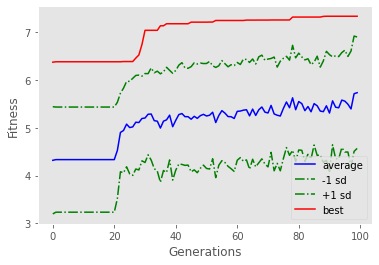

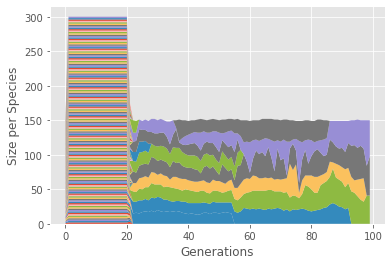

In [85]:
"""
3-input Boolean function
"""

from __future__ import print_function
import os
import neat
from utils.utils_08 import visualize

from pylab import *

# 3-input Boolean function inputs and expected outputs.
inputs = [(0.0, 0.0, 0.0),
          (0.0, 0.0, 1.0),
          (0.0, 1.0, 0.0),
          (0.0, 1.0, 1.0),
          (1.0, 0.0, 0.0),
          (1.0, 0.0, 1.0),
          (1.0, 1.0, 0.0),
          (1.0, 1.0, 1.0)]
outputs = [(0.0,),(1.0,),(1.0,),(0.0,),(1.0,),(0.0,),(0.0,),(0.0,)]

num_generations = 100
num_runs = 1 #2

config_files = ['config-feedforward-3input-function-nohidden.txt',
                'config-feedforward-3input-function-hidden.txt']

def eval_genomes(genomes, config):
    for genome_id, genome in genomes:
        genome.fitness = len(inputs)
        net = neat.nn.FeedForwardNetwork.create(genome, config)
        for xi, xo in zip(inputs, outputs):
            output = net.activate(xi)
            genome.fitness -= (output[0] - xo[0]) ** 2


    
local_dir = os.path.dirname('utils/utils_08/')

if num_runs == 1:

    # Load configuration.
    config_file = os.path.join(local_dir, config_files[1])
    config = neat.Config(neat.DefaultGenome, neat.DefaultReproduction,
                         neat.DefaultSpeciesSet, neat.DefaultStagnation,
                         config_file)

    # Create the population, which is the top-level object for a NEAT run.
    p = neat.Population(config)

    # Add a stdout reporter to show progress in the terminal.
    stats = neat.StatisticsReporter()
    p.add_reporter(neat.StdOutReporter(True))
    p.add_reporter(stats)

    # run NEAT for num_generations
    winner = p.run(eval_genomes, num_generations)

    # Display the winning genome.
    print('\nBest genome:\n{!s}'.format(winner))

    # Show output of the most fit genome against training data.
    print('\nOutput:')
    winner_net = neat.nn.FeedForwardNetwork.create(winner, config)
    for xi, xo in zip(inputs, outputs):
        output = winner_net.activate(xi)
        print("input {!r}, expected output {!r}, got {!r}".format(xi, xo, output))

    node_names = {-1:'A', -2: 'B', -3: 'C', 0:'f(A,B,C)'}
    
    #if you want to visualize the network architecture uncomment the following line of code
    #having graphviz installed on your device is required in order to visualize the plot  
    #how to install it? see link https://graphviz.org/download/ 
    visualize.draw_net(config, winner, filename='3-input Bool function_hidden_100', view=True, node_names=node_names)
    
    visualize.plot_stats(stats, ylog=False, view=True)
    visualize.plot_species(stats, view=True)

else:

    results = []
    for file in config_files:

        # Load configuration.
        config_file = os.path.join(local_dir, file)
        config = neat.Config(neat.DefaultGenome, neat.DefaultReproduction,
                             neat.DefaultSpeciesSet, neat.DefaultStagnation,
                             config_file)

        best_fitnesses = []
        for i in range(num_runs):
            print('{0}/{1}'.format(i+1,num_runs))
            p = neat.Population(config)
            winner = p.run(eval_genomes, num_generations)
            best_fitnesses.append(winner.fitness)
        results.append(best_fitnesses)

    fig = figure('NEAT')
    ax = fig.gca()
    ax.boxplot(results)
    ax.set_xticklabels(['Without hidden nodes', 'With hidden nodes'])
    #ax.set_yscale('log')
    ax.set_xlabel('Condition')
    ax.set_ylabel('Best fitness')
    show()

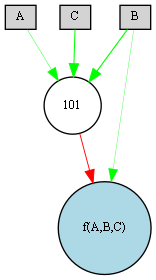

In [87]:
Image('3-input Bool function_hidden_100' + '.png')

#### 10 runs comparison

1/10
2/10
3/10
4/10
5/10
6/10
7/10
8/10
9/10
10/10
1/10
2/10
3/10
4/10
5/10
6/10
7/10
8/10
9/10
10/10


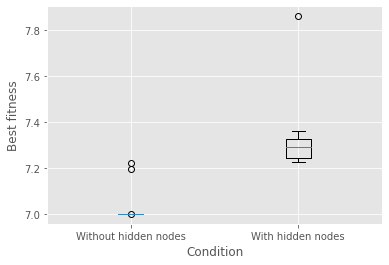

In [86]:
"""
3-input Boolean function
"""

from __future__ import print_function
import os
import neat
from utils.utils_08 import visualize

from pylab import *

# 3-input Boolean function inputs and expected outputs.
inputs = [(0.0, 0.0, 0.0),
          (0.0, 0.0, 1.0),
          (0.0, 1.0, 0.0),
          (0.0, 1.0, 1.0),
          (1.0, 0.0, 0.0),
          (1.0, 0.0, 1.0),
          (1.0, 1.0, 0.0),
          (1.0, 1.0, 1.0)]
outputs = [(0.0,),(1.0,),(1.0,),(0.0,),(1.0,),(0.0,),(0.0,),(0.0,)]

num_generations = 100
num_runs = 10

config_files = ['config-feedforward-3input-function-nohidden.txt',
                'config-feedforward-3input-function-hidden.txt']

def eval_genomes(genomes, config):
    for genome_id, genome in genomes:
        genome.fitness = len(inputs)
        net = neat.nn.FeedForwardNetwork.create(genome, config)
        for xi, xo in zip(inputs, outputs):
            output = net.activate(xi)
            genome.fitness -= (output[0] - xo[0]) ** 2


    
local_dir = os.path.dirname('utils/utils_08/')

if num_runs == 1:

    # Load configuration.
    config_file = os.path.join(local_dir, config_files[1])
    config = neat.Config(neat.DefaultGenome, neat.DefaultReproduction,
                         neat.DefaultSpeciesSet, neat.DefaultStagnation,
                         config_file)

    # Create the population, which is the top-level object for a NEAT run.
    p = neat.Population(config)

    # Add a stdout reporter to show progress in the terminal.
    stats = neat.StatisticsReporter()
    p.add_reporter(neat.StdOutReporter(True))
    p.add_reporter(stats)

    # run NEAT for num_generations
    winner = p.run(eval_genomes, num_generations)

    # Display the winning genome.
    print('\nBest genome:\n{!s}'.format(winner))

    # Show output of the most fit genome against training data.
    print('\nOutput:')
    winner_net = neat.nn.FeedForwardNetwork.create(winner, config)
    for xi, xo in zip(inputs, outputs):
        output = winner_net.activate(xi)
        print("input {!r}, expected output {!r}, got {!r}".format(xi, xo, output))

    node_names = {-1:'A', -2: 'B', -3: 'C', 0:'f(A,B,C)'}
    
    #if you want to visualize the network architecture uncomment the following line of code
    #having graphviz installed on your device is required in order to visualize the plot  
    #how to install it? see link https://graphviz.org/download/ 
    visualize.draw_net(config, winner, filename='3-input Bool function_hidden_100', view=True, node_names=node_names)
    
    visualize.plot_stats(stats, ylog=False, view=True)
    visualize.plot_species(stats, view=True)

else:

    results = []
    for file in config_files:

        # Load configuration.
        config_file = os.path.join(local_dir, file)
        config = neat.Config(neat.DefaultGenome, neat.DefaultReproduction,
                             neat.DefaultSpeciesSet, neat.DefaultStagnation,
                             config_file)

        best_fitnesses = []
        for i in range(num_runs):
            print('{0}/{1}'.format(i+1,num_runs))
            p = neat.Population(config)
            winner = p.run(eval_genomes, num_generations)
            best_fitnesses.append(winner.fitness)
        results.append(best_fitnesses)

    fig = figure('NEAT')
    ax = fig.gca()
    ax.boxplot(results)
    ax.set_xticklabels(['Without hidden nodes', 'With hidden nodes'])
    #ax.set_yscale('log')
    ax.set_xlabel('Condition')
    ax.set_ylabel('Best fitness')
    show()

## Instruction and questions
Concisely note down your observations from the previous exercises (follow the bullet points) and think about the following questions. 
- **What is the genotype and what is the phenotype in the problems considered in this lab?** <br>
in the lab where you evolved a neural network architecture using NEAT to solve Boolean functions, the genotype represents the genetic encoding of the neural network structure (using a DAG representation), while the phenotype represents the actual constructed neural network that processes inputs and produces outputs.
- **Why are hidden nodes sometimes needed for a Neural Network to solve a given task? What is the defining feature of problems that networks without hidden nodes are unable to solve?** <br>
Hidden nodes, also known as hidden units or hidden neurons, play a crucial role in neural networks as they enable the network to learn and solve complex tasks. Here's why hidden nodes are sometimes needed:

1. **Non-linearity:** Hidden nodes introduce non-linear transformations in the network, which allow the neural network to model non-linear relationships between inputs and outputs. Many real-world problems, such as image recognition or natural language processing, involve complex patterns and relationships that cannot be captured by simple linear models. Hidden nodes enable neural networks to represent and learn these non-linear patterns, making them more powerful and flexible in solving a wide range of tasks.

2. **Representation of intermediate abstractions:** Hidden nodes help in learning and representing intermediate abstractions or features in the data. In complex tasks, the inputs may have intricate dependencies and interactions that are not apparent in the raw input space. Hidden nodes allow the network to learn and extract relevant features or abstractions from the input data, which are then used to make accurate predictions or decisions. These intermediate representations can capture higher-level concepts or structures that are important for solving the task.

3. **Handling complex decision boundaries:** Problems that require non-linear decision boundaries to separate different classes or categories typically require hidden nodes. Linear models or networks without hidden nodes can only learn linear decision boundaries, which may not be sufficient for tasks where the decision boundary is complex or curved. Hidden nodes enable neural networks to learn and represent complex decision boundaries, making them capable of handling more challenging classification or regression tasks.

In summary, problems that networks without hidden nodes are unable to solve are typically those that involve non-linear relationships, complex patterns, or intricate dependencies in the data. Hidden nodes enable neural networks to capture these aspects by introducing non-linear transformations, representing intermediate abstractions, and handling complex decision boundaries, thereby enhancing the network's ability to learn and solve a given task effectively.
- **Why are recurrent connections needed to solve certain problems? What is the defining feature of problems that networks without recurrent connections are unable to solve? Are there problems that require recurrent connections and multiple hidden nodes?** <br>
Recurrent connections in neural networks allow information to be propagated and stored over time, enabling the network to process sequential or temporal data. These connections enable the network to have memory and retain information about previous inputs, which is crucial for solving certain problems.
The defining feature of problems that require recurrent connections is the presence of sequential or temporal dependencies in the data. In such problems, the current output or prediction depends not only on the current input but also on the previous inputs and their corresponding outputs. Examples of such problems include language modeling, speech recognition, machine translation, and time series forecasting.
Networks without recurrent connections, such as feedforward neural networks, are unable to effectively capture and utilize the temporal relationships in the data. Feedforward networks process each input independently and do not retain any memory of past inputs. Therefore, they are limited in their ability to handle sequential or time-varying data.
In problems that require recurrent connections, a single hidden node might not be sufficient to capture the complexity of the temporal dependencies. Multiple hidden nodes or layers can provide the network with increased capacity and the ability to learn more intricate patterns in the data. The additional hidden nodes allow for more expressive representations, making it easier for the network to capture and process the temporal dynamics of the problem.
